# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [5]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type         train         val        test
n_observations      319150       33482       33309
relative_size      0.82694   0.0867542   0.0863059
n_cols                  71          71          71
positives            42697        4555        4507
negatives           276453       28927       28802
positive_prop     0.133783    0.136043    0.135309
negative_prop     0.866217    0.863957    0.864691
min_date        2017-01-01  2018-11-11  2018-11-11
max_date        2018-11-10  2019-11-11  2019-11-11

In [8]:
sequence_features = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [9]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [10]:
text_features  = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types',
 'administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [11]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [12]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### Text only

In [13]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features,
               # 'sequence_features':sequence_features
               }

In [14]:
lgbm_text_features = Model(**model_params)
lgbm_text_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming

In [15]:
%%time
lgbm_text_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.750151	validation_set's auc: 0.736575
[20]	training_set's auc: 0.76011	validation_set's auc: 0.744342
[30]	training_set's auc: 0.770285	validation_set's auc: 0.751245
[40]	training_set's auc: 0.775831	validation_set's auc: 0.754104
[50]	training_set's auc: 0.781144	validation_set's auc: 0.757496
[60]	training_set's auc: 0.785311	validation_set's auc: 0.761389
[70]	training_set's auc: 0.789248	validation_set's auc: 0.764115
[80]	training_set's auc: 0.792503	validation_set's auc: 0.765079
[90]	training_set's auc: 0.795518	validation_set's auc: 0.766383
[100]	training_set's auc: 0.798064	validation_set's auc: 0.767428
CPU times: user 1min 2s, sys: 933 ms, total: 1min 3s
Wall time: 18.9 s


In [16]:
lgbm_text_features.classifier.get_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 7,
 'learning_rate': 0.1,
 'num_iterations': 100,
 'feature_names': ['labos_studies_names_12',
  'labos_studies_names_12_acido',
  'labos_studies_names_12_colesterol',
  'labos_studies_names_12_creatinina',
  'labos_studies_names_12_fan',
  'labos_studies_names_12_ferritina',
  'labos_studies_names_12_gases',
  'labos_studies_names_12_glucosa',
  'labos_studies_names_12_haptoglobina',
  'labos_studies_names_12_hepatitis',
  'labos_studies_names_12_homocisteina',
  'labos_studies_names_12_t4',
  'labos_studies_names_12_vitamina',
  'labos_studies_names_125',
  'labos_studies_names_125_ca',
  'labos_studies_names_14',
  'labos_studies_names_14_lcr',
  'labos_studies_names_15',
  'labos_studies_names_16',
  'labos_studies_names_16_hs',
  'labos_studies_names_17',
  'labos_studies_names_17_beta',
  'labos_studies_names_17_hidroxiprogesterona',
  'labos_studies_names_17p',
  'labos_studies_names_17p_citometria',


In [17]:
lgbm_text_features.get_performance_metrics()

training AUC ROC score:  0.7980297969935325
validation AUC ROC score:  0.7674278570262242
relative over-fitting:  0.03834686384217345


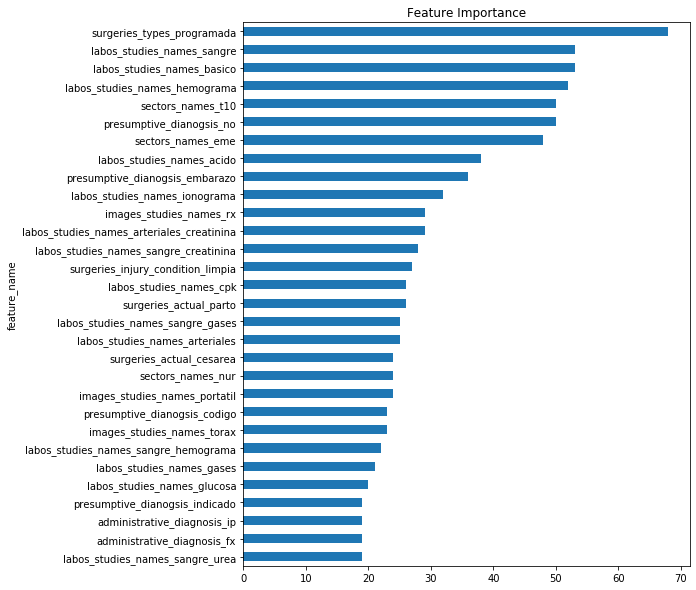

In [18]:
lgbm_text_features.plot_feature_importance()

In [24]:
lgbm_text_features.pipeline.named_steps['feature_engineering'].transformer_list

[('text_labos_studies_names',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
                   features_list=['labos_studies_names'], scale_numerical=False)),
 ('text_sectors_names',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
                   features_list=['sectors_names'], scale_numerical=False)),
 ('text_images_study_types',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
                   features_list=['images_study_types'], scale_numerical=False)),
 ('text_surgeries_types',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
                   features_list=['surgeries_types'], scale_numerical=False)),
 ('text_surgeries_injury_condition',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
                   features_list=['surgeries_injury_condition'],
                   scale_numerical=False)),
 ('text_surgeries_post_surgery_condition',
  FeatureProcessor(accepts_sparse=True, feature_type='text',
               

In [32]:
lgbm_text_features.pipeline.named_steps['feature_engineering'].transformer_list[7][1].transformer.vocabulary_

{'celulitis': 1213,
 'absceso': 172,
 'cuello': 1806,
 'celulitis absceso': 1217,
 'absceso cuello': 177,
 'embolia': 2453,
 'trombosis': 7123,
 'arterial': 622,
 'embolia trombosis': 2456,
 'trombosis arterial': 7124,
 'post': 5599,
 'qx': 5922,
 'cesarea': 1283,
 'post qx': 5615,
 'nefrectomia': 4792,
 'parcial': 5255,
 'laparoscopica': 4197,
 'nefrectomia parcial': 4794,
 'parcial laparoscopica': 5258,
 'hepatico': 3443,
 'absceso hepatico': 184,
 'cambio': 1070,
 'sonda': 6675,
 'yeyunostomia': 7511,
 'cambio sonda': 1075,
 'int': 3994,
 'med': 4523,
 'int med': 3997,
 'convulsiones': 1681,
 'estudio': 2758,
 'hidrocefalia': 3508,
 'hipertension': 3557,
 'cia': 1307,
 'asma': 691,
 'infeccion': 3844,
 'herida': 3457,
 'infeccion herida': 3854,
 'herida qx': 3477,
 'hematuria': 3376,
 'insuf': 3974,
 'resp': 6118,
 'insuf resp': 3980,
 'itu': 4135,
 'icc': 3729,
 'dolor': 2247,
 'abdominal': 131,
 'dolor abdominal': 2250,
 'tiroidectomia': 6916,
 'acv': 240,
 'sme': 6601,
 'ascitico

In [66]:
for i in data.train.X['administrative_diagnosis']:
    print(i)

CELULITIS/ABSCESO DEL CUELLO
EMBOLIA Y TROMBOSIS ARTERIAL
POST QX CESAREA
NEFRECTOMIA PARCIAL LAPAROSCOPICA
ABSCESO HEPATICO
CAMBIO DE SONDA YEYUNOSTOMIA
INT MED
CONVULSIONES EN ESTUDIO
HIDROCEFALIA /HIPERTENSION
CIA C
ASMA
INFECCION HERIDA QX
HEMATURIA
INSUF RESP
ITU
ICC
DOLOR ABDOMINAL
TIROIDECTOMIA
ACV
SME ASCITICO EDEMATOSO
EPOC
DOLOR ABDOMINAL
CA DE UTERO EN ESTUDIO
CA DE PULMON , PUNSION PLEURAL
NAC + DET DEL SENSORIO
SDR  RNPT BPEG
COLESISTITIS GANGRENOSA
FX DE CADERA
SME CONFUSIONAL
DESHIDRATACION
SUB OCLUSION INTESTINAL
NAC
DIF RESP
SME  ANEMICO
FX DE CADERA
NEUMONIA
MANEJO DEL DOLOR
SCA
LEUCEMIA AGUDA
SDR
CIRUGIA PULMONAR
SME FEBRIL
FIEBRE  POSTOPERATORIA
INSUF. RESP. + NEUMOPATIA
INSUFICIENCIA CARDIACA
PANCREATITIS
MIELITIS TRANSVERSA
SBO
GASTROENTERITIS INFECCIOSA
FASCITIS HEMORRAGICA
DESCOMPENSACION
ACV
LUXACION DE MANDIBULA
CEFALEA
DOLOR ABDOMINAL
PAEG
HIPOGLUCEMIA - MEG
BY PASS
INS RESP
CODIGO NO COINCIDE
FX DE CADERA
QMT
SINDROME DE IMPREGNACION
SEPSIS PIEL Y PARTES BLA

SUB OCLUSION INTESTINAL
NACIDO VIVO NEOM
DOLOR ABDOMINAL
POLITX
REEMPLAZO PROTESIS CADERA
MANEJO DEL DOLOR
NACIDO VIVO NEOM
TBC SIBDROME CONSTITUCIONAL
SBO CON HIPOXEMIA
CESAREA
T DE PARTO
ROTURA PREMATURA DE MEMBRANAS
HIPOTENSION
HIPOGLUCEMIA - MEG
SME ASCITICO EDEMATOSO
ACV
LAPAROTIMIA EXPLORADORA
COLICO RENAL
PIE DIAEETICO
DETERIORO DEL SENSORIO
ESCISION LESION  TM INTRACANEANA
ANGINA INESTABLE ANGOR PROGRESIVO
NEUMONIA
TVP
HEMATOMA INTRAPARENQUITAMOSO
INFECCION RESPIRATORIA
FIEBRE
INSF CARDIACA
DERIVA POR MEDICA DE CABECERA
BRONQUILITIS
MEG
DESHIDRATACION
INSUF CARDIACA
ABDOMEN AGUDO
ACV
DOLOR ABDOMINAL
EPOC
TROMBOSIS DE MMSS
DOLOR
NACIDO VIVO NEOM
DOLOR PRECORDIAL
DOLOR M INF
SUBOCLUSION INTESTINAL
CRISIS ASMATICA
CIERRE ILEOSTOMIA
DISNEA Y ALTERACIONES RESPIRATORIAS
DIF RESP
IAM
ESCARA SACRA FIEBRE
DIF RESP
DHS
CESAREA
DOLOR ABDOMINAL
QMT
BIOPSIA ANAL
PREPARTO
TDP
T DE PARTO
TEC SIMPLE SME FEBRIL
CONVULSIONES
(IP) NMN
MOCOSITIS
TUMOR RENAL
EPOC REAGUDIZADO
LUMBALGIA
NACIDO VIVO N

TVP
INFECCION URINARIA
ACV
SDME CONF.
HIPOXEMIA
ACV
ESCISION LESION  TM INTRACANEANA
INSUFICIENCIA CARDIACA
NACIDO VIVO NEOM
LUMBALGIA
ACV ISQUEMICO
DOLOR PECHO
SINDROME CONFUSIONAL
HERNIA EPIGASTRICA ATASCADA
HERIDA TORACICA
FX DE CADERA
SME CONFUSIONAL
DESCOMPENSACION
REEMPLAZO PROTESIS CADERA
EPOC REAGUDIZADO * ARM
DIF RESP
DISTENSION ABDOMINAL
INFECCION URINARIA
RNT/PAEG
COLECISTECTOMIA CON COLANGIOGRAFIA, LAPA
NACIDO VIVO NEOM
ACV
SME UREMICO HEMOLITICO
CELULITIS
FX DE PELVIS
IAM
SOI
EVENTROPLASTIA
SOSPECHA DE BACTERIEMIA
DIFICULTAD RESPIRATORIA
EMB 41 SEM
HEMATOMA INTRAPARENQUITAMOSO
NEUMONIA
TEC GRAVE
FX MEDIAL DE CADERA
TEC S/ PERDIDA
TAQUIARRITMIA
ACV
ACV
DOLOR ABDOMINAL
DOLOR POSTOPERATORIO
INTERNACION POR CAUSA MATERNA
INSF CARDIACA
DIF RESP
INSUFICIENCIA CARDIACA
TEC SPC
RNT PAEG
QMT
HTA
NACIDO VIVO NEOM
EPOC REAGUDIZADO
NEUMONIA
FX DE CADERA
SME FEBRIL
CODIGO NO COINCIDE
HEMORRAGIA SUB ARACNOIDEA
INFECCION EN HERIDA QX
PRECORDALGIA
TEC
DESCARTAR CA RENAL
HEMORRAGIA INTRAEN

ANEMIA
QMT
ACV
PROSTATECTOMIA RADICAL LAPAROSCOPICA
DISTENSION ABDOMINAL
DHS
QMT
HERIDA ARMA BLANCA
HERNIOPLASTIA INGUINAL CONVENCION.UNILAT
INFECCION DE HERIDA
INFECCION URINARIA
FX DE CADERA
ULCERA EN MIEMBRO INFERIOR
ANEMIA NO ESPECIFICADA
SUB OCLUSION INTESTINAL
HEMATURIA
NACIDO VIVO NEOM
DIFICULTAD RESPIRATORIA
HEMATOMA ASOCIADO A HERIDA QUIRURGICA
DIFICULTAD RESPIRATORIA
RNT
NACIDO VIVO NEOM
DOLOR ABDOMINAL
INFECCION URINARIA
EMBOLIA
PANCITOPENIA
PRECORDALGIA
CONTRACCIONES UTERINAS
NMN GRAVE EN ARM
SME FEBRIL LEUCEMIA
NEUMOPATIA
HIPOSMOLARIDAD Y/O HIPONATREMIA
INSF CARDIACA
DETERIORO DEL SENSORIO
HEMATURIA
APENDICITIS AGUDA
SOI
CA DE PULMON DIF RESP
SINDROME FEBRIL REFRACTARIO
INF. URINARIA * HIPOPOTOCEMIA *
INSUFICIENCIA CARDIACA
ACV
EPOC REAGUDIZADO
CRISIS DE HTA
TAQUIPNEA
ACV IQMC
ACV
QMT
INFECCION RESPIRATORIA
ACV
DERRAME PLEURAL
TB PULMONAR
TDP
HTA
APE
NACIDO VIVO NEOM
QMT
ACV
FX DE CADERA
TEP
NACIDO VIVO NEOM
FX DE CADERA
ISQUEMIA PERIFERICA
SINDROME CONFUSIONAL
NACIDO VIVO

HDA /  PARA   ARTERIOGRAFIA -  EMBOLIZAC
TM HIPOFISIS
FX DE CADERA
NEURITIS OPTICA
RUPTURA PREMATURA DE MEMBRANAS
TEC S/ PERD
ACV HEMORRAGICO
ACV
SEPSIS GRAVE
COLE LAP
FX  DE HUESO TEMPORAL  DERECHO
COLECISTITIS AGUDA
NAC
INSF RESPIRATORIA
FX DE CADERA
HIPOSMOLARIDAD Y/O HIPONATREMIA
ESPONDILOPATIA
LEUCEMIA
BRONCOPATIA
FX DE PELVIS
CESAREA
TETRALOGIA DE FALLOTT RNPT+ PAEG
ACV
SME GENETICO
TVP
IRA
LUXACION DE ROTULA
CEFALEA
EPOC
DBT GESTACIONAL
PUENTE AORTO CORONARIO
DISFAGIA
SME CONFUSIONAL
RPM
NAC
DSH HIPERBILIRRUBINEMIA
LUMBAGO
CEFALEA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
PSEUDOARTROSIS
LEUCEMIA MIELOIDE AGUDA
CODIGO NO COINCIDE
TX COLUMNA
LUMBALGIA
CSA PROG
NACIDO VIVO NEOM
ITU
CELULITIS
TVP
TVP
HERNIOPLASTIA INGUINAL LAPAROSCOPICA UNILATER
TVP
GASTROENTERITIS -DHS
TEC S/P + FX DE HOMBRO
DISNEA
ABDOMEN AGUDO
DIF RESP
FX MEDIAL DE CADERA
ACV
ARTERIOPATIA EN MM II PIPLITIO TIBIAL
IAM  PO  ANGIO EN ARM
DLR ABDOMINAL
HTA
NACIDO VIVO NEOM
DIFICULTAD RESPIRATORIA
DISNEA
ACV
HDA
ACV
NACIDO VI

SDME IMPREGNACION
NEUMOTORAX X HAF
DOLOR ABDOMINAL
COLICO RENAL
RECONSTRUCCION BIOLOGICA
GUILLAIN BARRE
ANEMIA
LINFOMA INTESTINAL
POSIBLE ACV
INF. URINARIA * HIPOPOTOCEMIA *
SME EMETICO
FX MEDIAL DE CADERA
OTRA COMPLIC HERIDAS QUIRURG OBSTETR EPI
DSH
IRC
SOI
EPOC REAGUDIZADO
TM DE HUESO
ESTUDIO Y TTO MIELOMA MULTIPLE
HEMICOLECTOMIA
CESAREA
INSUF RESPIRATORIA
TX CADERA
NACIDO VIVO NEOM
DLR ABD
DT NEUROLOGICO / SME FEBRIL
FX DE CADERA
ACV ISQUEMICO
FEMUR,RESEC.EXPLOR.BIOP.EXTRAC.OSTEOSINT
BIOP OST FEMUR
ORBITA, REPARACION PLASTICA DE LA
COLESTASIS EN ESTUDIO
TENDONES, TENORRAFIA DE OTROS
ACV
SME FEBRIL  - CA DE MAMA
ACV
DSH
FX EXPUESTA DE PIE
MOV.INVOL MI+PROBABLE MASA OCUP, CER,(CA
ESTENOSIS AORTICA SEVERA+SINCOPE
ABSCESO DE PSOAS
HEMORRAGIA SUB ARACNOIDEA
FX DE CADERA
RNT CADIOPATIA CONGENITA
NACIDO VIVO NEOM
NEUMOPATIA
LITROTRICIA URETRAL ENDOSCOPICA
TROMBOSIS VENOSA
DISNEA
HEMATURIA
TEC SPC
(IP)  POLITX GRAVE
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
ICC
TEC GRAVE
BIOP RENAL
DIFICULTAD

INSF RESP
DSH/ANOREXIA
COLOCACION COOK
INTOXICACION CON VENENO
CA MAMA - TROMBOLISMO PULMONAR
DISFAGIA
NMN
INSF RESP
TRASTORNOS HEPATICOS ESTADO O COMPLICACION ANTEPARTO
EXPOSICION DE CATETER
DIF.RESPIRATORIO
NEFRECTOMIA PARCIAL LAPAROSCOPICA
ACV
GUILLAN BARRE
AIT
DLR ABD
PLAQUETOPENIA
EVISERACION
EPI
BACTEREMIA
EMBARAZO ECTOPICO
DESCARTAR CA RENAL
HERPEZ ZOZTER MAS CELULITIS ORBITARIA
SME CONFUSIONAL
SME FEBRIL
INFECCION PARTES BLANDAS
(IP)  POLITX GRAVE
CONTRACCIONES SUTERINAS
NACIDO VIVO NEOM
NACIDO VIVO NEOM
SINDROME CONFUSIONAL
DISNEA
QUEMADURA 60%
ABSCESO DE PSOAS
PT/PAEG SDR/
SME CONVULSIV
CONVULSIONES
CONVULION REFRACTARIA
NACIDO VIVO NEOM
SME VENA CAVA
DSH / HIPERGLUCEMIA
DETERIORO DEL SENSORIO
TVP
RUPTURA PREMATURA DE MEMBRANAS
DISNEA
ACV
BRONCOPATIA
HDA
NEUMONIA
TVP
FX DE CADERA
NTOXICACION CON SICOFARMACO
ACV ISQ
HEMORRAGIA INTRAENCEFALICA
ACV
ANEMIA NO ESPECIFICADA
INTOXICACION CON VENENO
ABSCESO PARED ABDOMINAL
IN R+ ITU
ICC DESCOMPENSADA- EPOC
ANEMIA
SME FEBRIL
CONTROL D

DIF RESPIRATORIA
CELULITIS
HIPERGLUCEMIA
NEURITIS OPTICA
VOMITOS-POP NEUROCX
ILEOSTOMIA
INSUFICIENCIA CARDIACA
DISFAGIA
MAREOS
DHT
POLITRAUMATISMO
INFECCION DE HERIDA
SINCOPE
HIPERGLUCEMIA
HTA
COLECISTOSTOMIA, LAPAROSCOPICA
MIOMECTOMIA
DISNEA
NEUMOPATIA
NEUMOTORAX GRADO 3
DISNEA
INFECCION HERIDA QX
HERIDA INFECTADA
RNT PAEG
ACV
QMT
CODIGO NO COINCIDE
BIOPSIA RENAL
NEUMONIA
DISNEA
LEUCEMIA
INFECCION PARTES BLANDAS
NACIDO VIVO NEOM
IAM  PO  ANGIO EN ARM
NACIDO VIVO NEOM
ACV
TVP
FX CADERA
FX DE CADERA
DETERIORO DEL SENSORIO
RPM 2 HS EVOLUCION
SUPERVISION DE EMBARAZO/ HTA/ EMB
FX DE RODILLA
SINDROME DE IMPREGNACION
TVP
POSTIOPLASTIA FIMOSIS C/ FRENULOTOMIA
BRONQUIOLITIS AGUDA
INSUF CARDIACA
ESOFAGUECTOMIA TOTAL Y RECONSTRUC.,LAPAROSC.
ACV
ACV
LEUCEMIA MIELOIDE AGUDA
FX CADERA
HIPOXEMIA
FX DE CADERA
DSINEA
DEFIC. LONGIT.FEMUR COMPLETA O PARCIAL
CA MAMA - TROMBOLISMO PULMONAR
POLITX
FX DE CADERA
QUEMADURA 60%
INFECCION DE HERIDA QUIRURGICA
DSH
NACIDO VIVO NEOM
ANEMIA
CELULITIS EN MMII
TUMOR 

COLANGITIS AGUDA
ACV
NACIDO VIVO NEOM
EVENTROPLASTIA
NMN
HDB
HERNIOPLASTIA INGUINAL LAPAROSCOPICA BILATER
DOLOR ABD
ITU COMPLICADA
BACTEREMIA
QMT
SME FEBRIL
ESTENOSIS AORTICA SEVERA
ISQUEMIA ARTERIAL
DERRAME PLEURAL
INSF CARDIACA
HEMATURIA
PIELONEFRITIS EN IRC
FISTULA ENTERO CUTANEA
DOLOR ABDOMINAL
NACIDO VIVO NEOM
HEMORRAGIA INTRAENCEFALICA
DETERIORO DEL SENSORIO
RNT / PAEG
DOLOR
PRURITO GENERALIZADO
TVP
HTA
NEUMONIA
NACIDO VIVO NEOM
HDA
CBIO DE SONDAS Y BOLSA COLECTORA
CONVULSIONES
TEC
SDME COLEDOCIANO
EHP
EAP
DOLOR ABD
HDA
TVP
ACV ISQ
GUILLAN BARRE
NEUMONIA
TVP
NACIDO VIVO NEOM
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
(IP) NMN
HEPATITIS AGUDA
SME CONFUSIONAL
PRECORDIALGIA
TUMOR RENAL
INF. URINARIA * HIPOPOTOCEMIA *
IRAB CON HIPOXEMIA
PLAQUETOPENIA
QMT
SINCOPE
SME CONFUSIONAL
ERIZIPELA
PIELONEFRITIS
DERRAME PERICARDIO
FX DE CADERA
QMT
INSUF RESPIRATORIA
RNT
EMB 38 SEM PP TROMBOFILIA
FX DE CADERA
TROMBOSIS VENOSA PROFUNDA
STATUS CONVULSIVO
INFECCION DE HERIDA QX
NACIDO VIVO NEOM
NEUMONIA

INTRACRANEANA, ESCISION DE LESION TUMORAL
ESTENOSIS TRAQUEAL
LEUCEMIA MIELOIDE AGUDA
CARDIOPATIA CONGENITA + INSUF CARDIO
FX DE CADERA
INSUF CARDIACA/ NEUMONIA
IRC REAGUDIZADA
DOLOR ABDOMINAL
FX DE CADERA
IR
CODIGO NO COINCIDE
ACV
SME CONFUSIONAL
TEC S/ PERD
QMT
COLECTOMIA SEGMENTARIA LAPAROSCOPICA
NACIDO VIVO NEOM
ACV
SME GENETICO
LUXACION DE CADERA
MELENA
NACIDO VIVO NEOM
CEFALEA
NEUMOPATIA
HIPERGLUCEMIA +PIE DBT
NEUMONIA +ITU
CLAVICULA, OSTEOSINTESIS DE FRACTURA DE
POLITX
HDA VARICES ESOFAGICAS DET SENSORIO
ORQUIEPIDIDIMITIS
TVP
DOLOR ABDOMINAL
ACV
IRA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
DSH MODERADA
INSUF, RENAL
LIPOTIMIA
ACV
TUMOR COLON
NEFROPATIA SOBRECARGA DE VOLUMEN
CA DE PENE
TEC GRAVE
DSH
NACIDO VIVO NEOM
NACIDO VIVO NEOM
PARAPLEJIA-ESCARAS INFECTADAS
ACV
HEMATURIA
ADENOMECTOMIA DE PROSTATA
SME. CONFUSIONAL
BRONCOESPASMO
NACIDO VIVO NEOM
CSA PROG
LUXACION PROTESICA DE CADERA DERECHA
ACV
LUMBOCIATALGIA INVALIDANTE
BICITOPENIA + INFEC RESP PTE CON HIV
CONTROL DE OTRO E

TEC C/ PERD
BQL
ARRITMIA
DERRAME PLEURAL
COLICO RENAL
NEUMONIA
NACIDO VIVO NEOM / RNPT
FRACTURA DE DIAFISIS DEL FEMUR CERRADA
ABSCESO PARED ABDOMINAL
BRONCOESPASMO
TRABAJO DE PARTO
MEG
ESTENOSIS ESOFAGICA
AP
NAC + SME FEBRIL
NAC
QMT
CONVULSIONES
CRISIS HIPERTENSIVA
HDA
CIDA PPA ALTURA FX CADERA
INSUF CARD
EAP
DOLOR TORACICO
ISQUEMIA ARTERIAL PERIFERICA
SME CONFUSIONAL
DIF RESP
ACV
ABDOMEN AGUDO
DIF RESP
TBC
OTRAS NEUMONIAS BACTERIANAS
SME FEBRIL EN PTE ONCOLOGICA
TRABAJO DE PARTO
TEC
DLR DE PECHO
DOLOR
FX CADERA
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
DSH + SME FEBRIL
POLITRAUMATISMO
FX DE CADERA
INSUF RESP
ACV
CESAREA CLASICA ABDOMINAL
FM
BRONCOPATIA
MIASTENIA GRAVIS
EPOC REAG
DOLOR ABDOMINAL
INSF CARDIACA - INSF RENAL
DERRAME PERICARDIO
LUXACION DE MANDIBULA
PRURITO GENERALIZADO
FX DE CADERA
NEUMONIA
TEC GRAVE
FIEBRE POSTOPERATORIA
POLITRAUMATISMO
INS. CARD DER
SME CONSTITUCIONAL
LX DE CADERA
BRONQUIOLITIS AGUDA
ARTRODESIS LUMBAR
PT/PAEG SDR/
HD
IC
DIFICULTAD RESPIRATORIA
INFECCION H

HIPERNATREMIA
EPLIGOTITIS
FX CADERA - ENF. PULMONAR CRONICA - 32 K
TRABAJO DE PARTO
CODIGO NO COINCIDE
PUENTE AORTO CORONARIO C/INJ. DE ART. MAMARIA
QMT
FRACTURA PERIPROTESICA RODILLA DERECHA
IAM
DISNEA
INFECCION URINARIA
NMN HIP SME MIELOPROLIFERATIVO
SEPSIS A FOCO URINARIO
DUODENOPANCREATECTOMIA
INFECCION POST QUIMIO * LINFOMA DE HOPKI
DISNEA
INFECCION Y CAPTURA MARCAPASOS
OTROS TRASTORNOS SENSORIOMOTORES
PIE DIABETICO MALERFORANTE PLANTAE
CA DE PULMON NEUMONIA
TAQUICARDIA
POLITX
HIPERGLUCEMIA
TUMOR RENAL
SCA
INSUF RESP
SME FEBRIL  C/ FOCO RESPIRATORIO
HD
BRONESPASMO
SME COLEDOCIANO
IRC
EPOC
EPOC REAG
POLITX
ESCITIS
DESHIDATACION
ENCEFALOPATIA CRONICA NO EVIOLUTIVO ARM
DERRAME PLEURAL NO ESPECIFICADO
NEUMOPATIA
TUMOR COLON
MALESTAR GENERAL
NACIDO VIVO NEOM
EMB DE 36.2 SEMANAS PREECLAMPSIA
CARDIOPATIA CONGENITA + INSUF CARDIO
NEURO SIFILIS
AV EN CURSO
TVP
RESECCION ANTERIOR OP. DIXON O MAUSEN, LAPAR
POLITRAUMATISMO
DIF RESP
CA DE RECTO
HTA  / 35 SEM
INS. CARD DER
SME VENA CAVA
COLICO 

EXTR PROTESIS RODILLA/ + ESPACIADOR
BRONCOESPASMO AGUDO
DIF RESP / NAC
EMBARAZO DE TERMINO R.P.M
ENDOCARDITIS
CEFALEA INTENSA
ABSCESO PARED ABDOMINAL
NAC
CALCULO EN VEJIGA
CRISIS HIPERTENSIVA
PLAQUETOPENIA-SME. DOWN
TAQUICARDIA
FX DE CADERA
FIEBRE DE ORIGEN DESCONOCIDA
CONVULSIONES
AB INCOMPLETO
ABD AGUDO
RESECCION ENDOSCOPICA DE CICATRIZ DE VEJIGA
SCA
NEFRECTOMIA TOTAL LAPAROSCOPICA
DLORES OSEOS , CA DE HUESOS
CODROSARCOMA TIBIA/DESHICENCIA HERIDA QX
ACV
PIE DIABETICO
CAMBIO DE SEXO
BRADICARDIA
NACIDO VIVO NEOM
RUPTURA PREMATURA DE MEMBRANAS
TVP
INSUF CARDIACA CONGESTIVA
S INTESTINAL
QMT
DERRAME PLEURAL
POLITX
INF. URINARIA * HIPOPOTOCEMIA *
DOLOR ABDOMINAL
NACIDO VIVO NEOM
RNT/PAEG
DISCOPATIA
RECONST BIOLOGICA
ACV
DERRAME PLEURAL
HDB
NEUMONIA
HEMORRAGIA DIGESTIVA
FRACTURA PERIPROTESICA RODILLA DERECHA
GUILLAIN BARRE
NACIDO VIVO NEOM
MIASTENIA GRAVIS
ITU
ESCITIS
CEFALEA EN HIV PARA PROCEDIMIENTO PUNCION LUM
FX DE CADERA
ACV
NACIDO VIVO NEOM
NACIDO VIVO NEOM
MELENA
RNPT-2GEMELAR
DOLOR 

IRC
NACIDO VIVO NEOM
HDB
DERRAME PLEURAL
TRABAJO DE PARTO
RPM
ACV SUBAGUDO
COLANGENOPÀTIA
FX DE CADERA
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
SUBOCLUSION INTESTINAL
SME FEBRIL
HD
DHS  + SME FEBRIL
SOI
DISNEA
INF. URINARIA * HIPOPOTOCEMIA *
DISTENCION ABD
IRC REAGUDIZADA
NEUMONIA /EPOC REAGUDIZADA
NEUMONIA BACTERIANA NO ESPECIFICADA
HTA
DIF RESP
IAM
ASCITIS
TETRALOGIA DE FALLOTT RNPT+ PAEG
CA DE PANCREAS
NEUMOPATIA
ABSCESO CEREBRAL HIDROCEFALIA
HEMATORIA RET DE LIQUIDO
SME VENA CAVA
CALCULO EN VEJIGA
SBO
ACV
DORSALGIA
NMN EPOC
INTOX ALCOHOLICA
CELULITIS
CEFALEA
MIELOFIBROSIS - SME FEBRIL
DOLOR ABOMINAL - INSUFICIENCIA RENAL
INFECCION PIEL Y PARTES BLANDAS
SCA
TDP
FX DE CADERA
PLAQUETOPENIA-SME. DOWN
E ECTOPICO
PIE DIABETICO
SME. IMPREGNACION
LINFOMA INTESTINAL
SME CONFUSIONAL
MIASTENIA GRAVIS
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
ASCITIS
SME FEBRIL
CODIGO NO COINCIDE
CIANOSIS  + HIPOTENSION
NACIDO VIVO NEOM
RN
OCLUSION INTESTINAL
DHS
ACV ISQUEMICO
BRONCOESPASMO
NACIDO VIVO NEOM
COLE

EPOC REAGUDIZADO
TVP + PUNCION
VERTIGO
CADERA, ARTROPLASTIA TOTAL COMPLEJA
DSH +NEUMOPATIA
DOLOR ABDOMINAL
FIEBRE SIN FOCO
PRECORDIALGIA
DOLOR ABDOMINAL
SDME FEBRIL
NEUMONIA
SME CONFUSIONAL
TVP
SME COMPRESION MEDULAR
DESCOMPENSACION
SOI
NACIDO VIVO NEOM
CARDIOPATIA CONGENITA + INSUF CARDIO
NEUMOPATIA  + ERICIPELA
FX MANDIBULAR
POSIBLE ACV
(IP)HERIDA DE ARMA DE FUEGO EN ABDOMEN/ ARM
PARAPLEJIA-ESCARAS INFECTADAS
TAQUIARRITMIA
CELULITIS EN ROSTRO
NAC
TEC CON PERDIDA
IAM
DLR PRECORDIAL
ACV
NEUMONIA
INSF RESPIRATORIA
FATIGA DE ESPACIADOR
INSUF CARDIACA
SOMNOLENCIA
TRABAJO DE PARTO
LUXACION DE CADERA
CONVULSIONES
FX DE CADERA
BRONESPASMO
BRONCOESPASMO AGUDO
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
HIPOTENSION
NEUMOPATIA
FX CADERA
NMN
DIF RESP
INSUFICIENCIA RENAL CRONICA REAGUDIZADA
NMN
IRAB CON HIPOXEMIA
DISCOPATIA
PULMON,ESCISION LOCAL DE LESION DE
DOLOR ABOMINAL - INSUFICIENCIA RENAL
SEPSIS
ACV SUBAGUDO
MEG
NEUMONIA
FIEBRE
HEMORRAGIA DIGESTIVA
CODIGO NO COINCIDE
PIE DBT
ADBOMEN AGUDO
INSF

TEC ( EN IP)
NEUMONIA CON HIPOXEMIA
HIPOXEMIA
IRA
CONSTIPACION
VOMITOS
SEPSIS
FX CADERA
RNT/PAEG
EPOC
ACV
SME REPERCUSION GRAL
ACV
TEC GRAVE (IP)
TM HEPATICO
HERNIOPLASTIA INGUINAL CONVENCION.UNILAT
LINFOMA INTESTINAL
(IP)  POLITX GRAVE
FX DE CADERA
HIDROCEFALO OBSTRUCTIVO
TVP
MAMA, ESCISION LOCAL DE LESION DE
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
DISARTRIA
FLUXION HEMORROIDAL
FX DE CADERA IZQ
SME HEMETICO
LEUCEMIA AGUDA
NEUMONIA
SEPSIS
SME FEBRIL
ACV
ABD AGUDO
IRC COLCOLACION  CATETER  HEMODIALISIS
SME CONFUSIONAL
BIOPSIA
LINFOMA
GEA
OLIGOHIDRAMNIOS
DSH NEG A LA INGESTA
NEUMOPATIA
INF URINARIA +HIPONATREMIA
EDEMA DE PULMON
FOCO MOTOR
SEPSIS  EN PARTES BLANDAS
INT. ALCOHOLICA
MIASTENIA GRAVIS
IAM
FX FEMUR
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
INSF CARDIACA
RNT/PAEG
CELULITIS
INSUF RESP
NACIDO VIVO NEOM
CODIGO NO COINCIDE
HEMATOMA SUBDURAL
TM TIROIDES - MTS COLUMNA
FARMACODERMIA
CA PULMON
SBO
NAC
DOLOR PRECORDIAL
EPLIGOTITIS
RNT/PAEG
HIPOXEMIA
EPOC REAGUDIZADO
ITU COMPLICADA
NAC
QMT
P

NACIDO VIVO NEOM
BRADICARDIA SINTOMATICA
HIPERGLUCEMIA / SEPSIS
CARDIOPATIA CONGENITA + INSUF CARDIO
NACIDO VIVO NEOM
DOLOR EN EPIGASTRIO
CRISIS ASMATICA
TAQUICARDIA
CARDIOPATIA CONGENITA
DOLOR ABDOMINAL
IAM
EPOC
EMB 36.1 HTA
EPOC
SME GENETICO
FX MUÑECA
DESCOMPENSACION - HIV +
DSH
NACIDO VIVO NEOM
NAC
NEUMONIA
ANGOR
PARO RESPIRATORIO
CODIGO NO COINCIDE
RECONST BIOLOGICA HUMERO
PASAJE GAMAGOBULINA
PT/PAEG SDR/
REEMPLAZO TOTAL DE CADERA
HSA (INTERV POLICIAL)
R T C
POLITX
CSA PROG. + LT
BQL
INSUFICIENCIA RENAL CRONICA REAGUDIZADA
NACIDO VIVO NEOM
DOLOR EN EPIGASTRIO
RECONTRUCCION DEL TRANSITO COLONICO
TEC GRAVE (IP)
FX DE CADERA
EMB 30.4 SEM / EMERGENCIA HTA
DOLOR ABDOMINAL
BRONCONEUMONIA ORGANISMO SIN ESPECIFICAR
NEUMONIA
TX COSTAL
CODROSARCOMA TIBIA/DESHICENCIA HERIDA QX
DIF RESP
DSH
SME CONFUSIONAL
TDP
ACV
TM MAXILAR
NEUMONIA
BRONCOESPASMO
DSH
BACTEREMIA
RPM
QMT
ADENOMEGALIA DIFUSA
COLELITIASIS- SME COLEDOCIANO
QMT
FX DE CADERA
CODIGO NO COINCIDE
ACV ISQ
TVP
NEURITIS OPTICA
INFECCION D

ACV
HIPONATREMIA
DESCOMPENSACION - HIV +
DET DEL SENSORIO
NEUMONIA
TUMOR DE TIROIDES
TRABAJO DE PARTO
DESCARTAR NMN
SME FEBRIL// PANCITOPENIA
INFECCION DE VIAS URINARIAS SITIO NEOM
POST CESAREA INF RENAL
CUADRO COMICIAL POSIBLE EPILEPSIA
CODIGO NO COINCIDE
IAM
SME CONFUSIONAL
AFLOJAMIENTO PROTESICO CADERA DERECHA
NACIDO VIVO NEOM
INSUF, RENAL
SME CONFUSIONAL
NACIDO VIVO NEOM
BRONQUITIS
PECTUS EXCAVATUM
SEPSIS
POSIBLE ACV
HIPERGLUCEMIA
COLELITIASIS- SME COLEDOCIANO
HEMATOMA EN MMII NECROSIS
ICD
NACIDO VIVO NEOM
INFECCION DE HERIDA QX
HIDROCEFALO OBSTRUCTIVO
ACV
EMB 41 SEM
HDA
SUBOCLUSION INTESTINAL / EN ARM
POLITX
ESTRIDOR LARINGEO
IRA
SME HEMETICO
ISQUEMIA PIE DERECHO
FX CADERA - ENF. PULMONAR CRONICA - 32 K
HIPERGLUCEMIA
RNT/PAEG
HEMORRAGIA INTRAENCEFALICA
HDA
RNT/PAEG
PIELONEFRITIS
DSH SEC. A GASTROENTEROCOLITIS
INFECCION HERIDA QUIRURGICA
CELULITIS
QMT
HIPOTERMIA
IMPLANTE DE VALVULA CARDIACA P/VIA PERCU
FX DE CADERA
CONVULSION FEBRIL
TEC / FX DE PISO ORBITA IZQ
GUILLAIN BARRE
NACIDO

INFECCION EN PROTESIS
ABDOMEN AGUDO, APENDICITIS
NMN + HIPOTENSION
NEUMONIA+HIPOXEMIA
INSUF. RESPIRATORIA
ACV
OTRA DISFAGIA
HIPERGLUCEMIA
HERPES ZOSTER
NACIDO VIVO NEOM
FX ACETABULO
TVP
INFECCION DE HERIDA QX RODILLA IZQUIERDA
TVP
TUMORACION ABDOMINAL
MIASTENIA GRAVIS
HDA
HIPOXEMIA
COLECISTECTOMIA LAPAROSCOPICA
POLITRAUMATISMO
RN
HIDROCEFALO OBSTRUCTIVO
HEMIPARESIA  GLASGOW 15/15
ADENOMECTOMIA DE PROSTATA
SEPSIS
ASMA
HEMATOMA SUBDURAL
FX EXPUESTA DE RODILLA
DHT
QMT
RN
SINUSITIS CRONICA
TX DORSAL
DERRAME PLEURAL NO ESPECIFICADO
DISCOPATIA
SUPERVISION DE EMBARAZO DE ALTO RIESGO
ESTADO DE EMBARAZO NORMAL
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
NACIDO VIVO NEOM
CELULITIS EN MMII IZQ
EPOC
IRC PARA DIALISIS
QMT
MELENA
NEUMONIA
GUILLAIN BARRE
ITU
RETENCION AGUDA DE ORINA
ANEMIA
NEUMONIA
ALTE
CODIGO NO COINCIDE
ANEMIA
TUMOR DE PANCREAS
GANGLIO LINFATICO, BIOPSIA DE
POSIBLE ACV
ACV
ACV
INF. URINARIA * HIPOPOTOCEMIA *
FX DE MUÑECA  TEC
HEMATURIA
NEUMONIA
ICC
ACV
EPLIGOTITIS
ATAXIA
TEC C/ PERD
HEM

ACV
DISNEA
FIEBRE
RNPT
SIN 1906237 KC
FX DE CADERA
NACIDO VIVO NEOM
TAQUICARDIA
LITIASIS RENAL
ABDOMEN AGUDO
D.M
INSUF CARDIACA DESCOMPENSADA
DHT
RECAMBIO DE CANULA
ACV
NEUMONIA
DOLOR ABDOMINAL
ULCERA EN MMII
LX DE CADERA
POST OP INFEC PARTES BLANDAS
ILEOSTOMIA
FX DE PELVIS
BRONCOESPASMO
TRANSFUSION
QUEMADURA DE MS Y TORSO
RECAMBIO DE SONDA
CESAREA
PIE DBT INFECTADO
ABSSCESO PERIANAL
HEMORRAGIA GASTROINTESTIANAL
FX CADERA
EPOC REAGUDIZADO
IC ( EN CARPETA IP)
PLASMOCITOMA
DSH
NACIDO VIVO NEOM
CONVULSIONES / AUSENCIAS
REEMPLAZO VALVULAR
DOLOR DE PECHO
TUMOR ABDOMINAL
FX DE CADERA
HDB
HSA (INTERV POLICIAL)
HIPERGLUCEMIA
SINDROME FEBRIL
ACV
NEG A LA INGESTA / EXCITACION PSICOMOTRI
HMYR
CELULITIS
POLINEUROPATIA
HEMATURIA
NMN
TM HIPOFISIS
GASTROENTERITIS
ABDOMEN AGUDO
FX CADERA
CELULITIS
HIPOGLUCEMIA
ABDOMEN AGUDO
NO ESPECIFICA CODIGO
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
INFECCION DE HERIDA QUIRURGICA
DIARREA
FX EXPUESTA DE TOBILLO
BRONCOESPASMO AGUDO
INFECCION POST OP
HERICIPELA + DISNEA

POLITX (I.P)
FX DE CADERA
PUENTE AORTO CORONARIO
AMPOLLA EN PIE/DEDO(S) PIE INFECTADA
DETERIORO DEL SENSORIO
ENCEFALOPATIA CRONICA NO EVIOLUTIVO ARM
HIPERGLUCEMIA
SME GENETICO
CA HIGADO MET PULMON
NAC
TEC CPR / HEMATOMA
ABORTO INCOMPLETO
DSH + HTA
NACIDO VIVO NEOM
ANEMIA SEVERA
NAC
ACV
(IP) QUEMADURAS Y CORROSIONES EN CUERPO
DSH
ACV
HEMATOMA SUB DURAL
DOLOR ABDOMINAL
NEUMONIA
TUMOR ABDOMINAL
FRACTURA DE CADERA
DISENTERIA
HTA + DIABETES DESCOMPENSADA
HEMATOMA SUBDURAL
EMBARAZO ECTOPICO
HEMIPARESIA
BRONQUIOLITIS
INFECCIO DE PARTES BLANDAS
FX DE CADERA
CRANEOPLASTIA
TRASTORNO DEGLUTORIO
HIPERGLUCEMIA
FX DE CADERA
PROSTATA, ADENOMECTOMIA DE
COLECISTECTOMIA CON COLANGIOGRAFIA, LAPAROSC.
RNPT/SDR
NACIDO VIVO NEOM
ITU
CELULITIS
TEC S/P
IC DESCOMP.
NEURISMAS, TRATAMIENTO QUIRURGICO DE LOS
HIPOTENSION
ARTRITIS + ULCERAS EN MMII
RPM 27 SEM
SUBOCLUSION INTESTINAL / EN ARM
LEUCEMIA AGUDA
SDR  RNPT BPEG
ENCEFALITIS AUTOINMUNE
SOI
HEMORRAGIA DIGESTIVA
PROCTORRAGIA
COLECISTITIS AGUDA
DSH SEVERA
POLIT

ACV HEMORRAGICO
CUERPO EXTRAÑO EN ESOFAGO
DESCOMPENSACIÓN
OTRA DISFAGIA
PIE DBT
NACIDO VIVO NEOM
NACIDO VIVO NEOM
FX CADERA
DIF RESP
DHT
TEC
NACIDO VIVO NEOM
HEMICOLECTOMIA(DERECHA/IZQUIERDA)LAPAROSCOPIC
ACV ISQUEMICO
TX DORSAL
TEC S/ PERD
DERIVACION  AORTO ILIACO
DOLOR ABDOMINAL GINECOLOGICO
BQL
DIF. RESPIRATORIA
ICD
BQL
DIVERTICULITIS AGUDA COMPLICADA
CELULITIS EN MMII IZQ
NEUMONIA
HIPOTERMIA
TUMORACION ABDOMINAL
QUEMADURA AUTOINFLINGIDA (INTERV POL)
INFECCION DE HERIDA
DOLOR ABDOMINAL  ABDOMEN  AGUDO
NACIDO VIVO NEOM
FX FEMUR EXP
CRISIS HTA
DEBILIDAD NO ESPECIFICADA
ACV
PREECLAMPSIA
NEUMOTORAX
ACV
FRACTURA DE CADERA
INTOXICACION ( EN CARPETA IP)
INFECCIONES DE PIEL Y TEJIDOS BLANDOS
PASAJE DE MEDICACION
HERNIA ATASCADA
TX DE CRANEO DET SENSORIO
ACV
ACV
BQL
ACV ISQUEMICO
INFECCION HERIDA QX
INFECCION EN PROTESIS
CA HIGADO MET PULMON
EPOC
INTOXICACION
HIPOTENSION ORTOSTATICA
FX DE CADERA
BY PASS GASTRICO
ANAFILAXIA
DESHIDRATACION
DOLOR ABDOMINAL
LAPAROSCOPIA OPERAC.DE NISSEN (HERNIA 

POST OP INFEC PARTES BLANDAS
NACIDO VIVO NEOM
CELULITIS/ABSCESO DE LA CARA
INFECCION EN PROTESIS
NACIDO VIVO NEOM
ANEMIA
QMT
DSH NEG A LA INGESTA
SME ANEMICO +FIEBRE +SDME INPREGNACION
VOMITOS
DISNEA
TX DE CRANEO DET SENSORIO
POLITX LEVE
SME CONFUSIONAL
TAQUICARDIA VENTRICULAR
14%QUEMADURA ROSTRO CUELLO MANO
SECUNDARISMO
NEFRECTOMIA
NEUMONIA
BLOQUE AV COMPLETO
PIELONEFRITIS
SINDROME ICTERICO
CRISIS HIPERTENSIVA
BRONCOESPASMO
LAPAROSCOPIA OPERAC.DE NISSEN (HERNIA HIATAL)
INFECCION HERIDA QX
CA HIGADO MET PULMON
FIEBRE POSTOPERATORIA
FX CADERA
ITU
FX MAXILAR Y PISO DE ORBITA
CONVULSIONES
CELULITIS
INFECCION DE HERIDA QUIRUGICA (CADERA)
TEP
NAC
EPOC REAGUDIZADO
DIF. RESPIRATORIA
SME CONSTITUCIONAL
BRONQUIOLITIS AGUDA
NAC BILATERAL
COLANGITIS
EPOC REAGUDIZADO
ETG
CA PULMON
ACV
SOI
APNEA
CPRE
SME CONFUSIONAL
HEPATITIS COLESTASICA
DIF RESPIRATORIA
NEURITIS OPTICA
CELULITIS EN MMII IZQ
INESTABILIDAD EN LA MARCHA
HEMICOLECTOMIA(DERECHA/IZQUIERDA)LAPAROSCOPIC
NEUMONIA
CESAREA PROGRAMADA
DIF. R

SME. VERTIGINOSO
ANEMIA
TVP
ACV HEMORRAGICO
CADERA, ARTROPLASTIA TOTAL COMPLEJA
SCA
PANCREATITIS AGUDA
ANEMIA
MIASTENIA GRAVIS
LUXACION DE RODILLA
INFECCION HERIDA QUIRURGICA
MALFORMACION ANO RECTAL -RIÑON ECTOPICO-
ACV
HIPERTENSION ESENCIAL BENIGNA EN EMBARAZ
NACIDO VIVO NEOM
FX CADERA
TUMOR RENAL
ENCEFALOPATIA
INFEC URINARIA + DIF RESPIRATORIA
SINCOPE
TUMOR INTYESTINO GRUESO
FX DE CADERA
HTA + DISNEA + TAQUICARDIA
CELULITIS/ABSCESO DE LA PIERNA, SALVO PIE
ABL RF+ EEF
FALLO RENAL AGUDO, NO ESPECIFICADO
INFARTO
TRASTORNO DEGLUTORIO
NEUMOTORAX
TX DE CRANEO
COLOCACION PARA DIALISIS PERITONEAL
BQL
DIF. RESPIRATORIA / ARM
HIPERTENSION PULMONAR
DETERIORO DEL SENSORIO
TX CADERA
DSH
PJE DE MEDICACION
CARDIOPATIA CONGENITA
RNT PAEG
INSUF RENAL
DEHISCENCIA DE HERIDA QUIRURGICA
ACV
INFECCION DE HERIDA QX RODILLA IZQUIERDA
FX EXP. MUÑECA DER. (CON IP)
NMN BRONCOASPIRACION
ACV
DIABETES TPO II
COLOCACION DE CATETER
IRC
NACIDO VIVO NEOM
TX LUMBAR
SUB OCLUSION INTESTINAL
HIPOTENSION
HEMODINAMIA +ESTU

DESCOMPENSACION
COLICO RENAL + ITU
NEFRECTOMIA
OTRA DISFAGIA
FX DE CADERA
UÑA ENCARNADA
FA ALTA RTA
TEC CPC
LX FX EXPUESTA TOBILLO
DESPLAZAMIENTO DE CADERA
INFECCION TEJIDOS BLANDOS MII
ICTERICIA
ACV
SME CONFUSIONAL
INSUF CARDIACA
BIOP PLEURAL  / POR VIDEOTORACOSCOPIA
DOLOR PRECORDIAL
AMNESIA + DESHIDRATACION
ATRESIA ESTENOSIS VALVULA TRICUSPIDE
SME CONFUSIONAL
ENCEFALOPATIA
DSH
37 O MAS SEMANAS COMPLETAS DE GESTACION, RECIEN NACIDO
HIPERGLUCEMIA
ICC
SME. CONVULSIVO
SOI
NACIDO VIVO NEOM
VASECTOMIA,LIGADURA DE CONDUCTO DEFERENTE
CONVULSIONES
PANCREATITIS  CRONICA COMPLICADA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
TVP
ITU
DISNEA + ORTOPNEA
IVU
TX. DE TORAX LEVE
NACIDO VIVO NEOM
TUMOR FARINGEO
RECONSTRUCCION BIOLOGICA
HIDROCEFALIA/DIF RESPIRATORIA
EMBOLIA Y TROMBOSIS ARTERIALES
CELULITIS
DERRAME PLEURAL
TIROIDECTOMIA
INFECCION CADERA
IRA
DOLOR ABDOMINAL
NEUTROPENIA
DETERIORO DEL SENSORIO MIELOMA MULTIPLE+
RNT-PAEG
INFECCION DE HERIDA QUIRUGICA (CADERA)
DSH
LINFOMA
DHT
SME HEMETICO
DOLOR ABDOMIN

RET AGUDA DE ORINA
EPOC
ACV
FX CADERA
INSUF CARDIACA
INSF. RENAL
ATRESIA ESTENOSIS VALVULA TRICUSPIDE
NACIDO VIVO NEOM
EAP
ENFISEMA DESCOMPENSADO NO RESPONDE A MANEJO
ACV
PROSTATA, ADENOMECTOMIA DE
NMN
DHT * GASTROENTERITIS *
HIPOFAGIA / DHT
SINDROME COLEDOCIANO
NAC GRAVE
SME CORONARIO AGUDO
HEMATURIA
HIPOXEMIA
INFECCION EN HERIDA QX
HDA
CARDIOPATIA CONGENITA + INSUF CARDIO
AMPUTACION DE MIEMBRO INFERIOR
TEC
FX DE CADERA
TRABAJO DE PARTO
ACV HEMORRAGICO
DET. SENSORIO
LINFOMA NO HODKIN
INFECCION HERIDA QX
EPOC REAGUDIZADO
NEUMONIA
HTA + VERTIGO
FALLO RENAL AGUDO
FX CADERA
TEC
APP 32 SEM
PIELONEFRITIS /  EMB 28 SEM
ANGOR
SHOCK SEPTICO
DISNEA
TAQUICARDIA * PARALISIS
IRA * ANEMIA
NACIDO VIVO NEOM
VEJIGA, RESECCION ENDOSCOPICA DE CICATRIZ DE
HIPERGLUCEMIA
HIPERGLUCEMIA
DERRAME PLEURAL
ACV
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
PIELONEFRITIS
NEUTROPENIA
POST OP FX CADERA
EAP
SINCOPE VIENE CON TAC
IRC
ACV
DIFICULTAD EN LA INGESTA
TEC
NAGIOGRAFIA DIGITAL MMII
SME. CONVULSIVO
NEUMONIA
SME CONFUS

DIFICULTAD EN LA INGESTA
OBSTRUCCION PARCIAL DE LARINGE
TEC
HIV + CONVULSIONES IRA
EPOC
REEMPLAZO DE CADERA / FX
DESHIDRATACION IC
ICTERICIA
IRC
VOMITOS
INFECCION URINARIA
SME CONFUSIONAL
SAFENECTOMIA UNILATERAL DE MIEMBRO INFERIOR
OSTEOMIELITIS
SINDROME CONFUSIONAL
DOLOR ABDOMINAL
ACV HEMORRAGICO
NACIDO VIVO NEOM
DSH NEG A LA INGESTA
HIPOTERMIA
FALLO RENAL AGUDO, NO ESPECIFICADO
DET. SENSORIO (IP?)
MAL ESDTADO GRAL.
FX CADERA
NACIDO VIVO NEOM
ACV
CUERPO EXTRAÑO EN ESOFAGO
INFECCION DE HERIDA QUIRUGICA (CADERA)
LOBECTOMIA
SME CONFUSIONAL
NAC GRAVE
TUMOR DE PANCREAS
FIEBRE
ANEMIA
PLAQUETOPENIA
EEF + ABLACION
INFECCION HERIDA QX
DISNEA
FX EXPUESTA TOBILLO
PANCITOPENIA
NAGIOGRAFIA DIGITAL MMII
LUMBOCRURALGIA INVALIDANTE
INTOXICACION MEDICAMENTOSA
QMT
ANGINAS , SEPSIA
SOI
SIND. COLEDOCIANO
EPOC REAGUDIZADO
NEUMONIA
HEMATURIA
RNT PAEG
CADERA,EXTRAC.PROTESIS+COLOCAC.DE ESPACI
FX DE CADERA
DSH
SME. CONVULSIVO
APP
NAC
IC
GEC + DSH + TRASTORNO DE PANICO
TEC S/ PERDIDA
DISECCION DE AORTA
ANGOR
F

CELULITIS EN MMII IZQ
AIT
CELULITIS Y ABSCESO EN DEDO DE MANO
ICD
INSUF CARDIACA
GASTROENTERITIS
ABD AGUDO
INSUF RENAL
HEMATOMA PARIETOOCCIPITAL IZ
SME GENETICO
CESAREA CLASICA
BRONQUITIS
POSIBLE ACV
MAL MANEJO DEL DOLOR
IC ( EN CARPETA IP)
EAP
RNT/PAEG
EVENTROLPLASTIA
ACV
DHT * GASTROENTERITIS *
DOLOR ABDOMINAL
LUXACION DE CADERA
ANEURISMA DE AORTA TORACICA
INSUF, RENAL
NAC
SINDROME CONFUSIONAL
OSTEOPLASTIA  DE FEMUR
SEPSIS
NACIDO VIVO NEOM
DERRAME PLEURAL
DOLOR ABDOMINAL/DIARREA CRONICA
SINDROME DE IMPREGNACION
REALIZACION DE PUNCION BIOPSIA RENAL
QMT
DOLOR ABDOMINAL
FX CADERA
FX CADERA
FX PERIMPLANTE CADERA IZQ
HIPERBILIRRUBINEMIA
ACV
RECONSTRUCC.DEL TRANSITO INTEST.O COLONICO
QUEMADURA CUERO CABELLUDO
INFECCION EN PROTESIS
CAMBIO DE SONDA VESICAL
ADENOMECTOMIA DE PROSTATA
DIFICULTAD EN LA INGESTA
HIPOXIA
LEUCEMIA / PANCITOPENIA
DIF. RESPIRATORIA
TX DE CRANEO DET SENSORIO
NACIDO VIVO NEOM
MASTOIDECTOMIA
ESCARA SACRA INFECTADA
ACV
DIABETES
CONVULSIONES
SME CONFUSIONAL
NACIDO VIVO NE

IC ( EN CARPETA IP)
EMERGENCIA  HTA EMB DE 36 SEM
NACIDO VIVO NEOM
HERICIPELA + DISNEA
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
ACV
DOLOR ABDOMINAL
SME NEFROTICO
SME FEBRIL
ENDOCARDITIS INFECCIOSA
NACIDO VIVO NEOM
DIF RESP
HEMORRAGIA INTRAENCEFALICA
DEBUT ONCOLOGICO
METASTASIS OSEAS + DOLOR ONCOLOGICO
PARO RESPIRATORIO
SINDROME FEBRIL
HEPATECTOMIA RADICAL
NEUMONIA
OBSTRUCCION PARCIAL DE LARINGE
NACIDO VIVO NEOM
ABDOMEN AGUDO
NEUTROPENIA FEBRIL
TEC
CIERRE DE ESOFAGOSTOMIA  CON TORRE DE LAPAROSCOPIA
PROB. FX CADERA
TX CADERA
TEC ( EN IP)
SME FEBRIL
DIF RESP+ HTA
LEUCEMIA
T DE PARTO
IVU
NACIDO VIVO NEOM
TEC GRAVE
DETERIORO DE CONCIENCIA
TUMORACION ABDOMINAL
DSH
HEMATOMA SUBDURAL
NACIDO VIVO NEOM
NEUTROPENIA FEBRIL
DOLOR ABDOMINAL
IC
CELULITIS DEDO MANO
TRABAJO DE PARTO
ABDOMEN AGUDO
DEBILIDAD DE MMII INESTABILIDAD
FX CADERA
FX DE CADERA
NMN  DE LA COMUNIDAD
CARDIOPATIA CONGENITA
IAM
DIFICULTAD RESPIRATORIA
INESTABILIDAD EN LA MARCHA
ACV
SINDROME DE IMPREGNACION
CELULITIS
NACIDO VIVO NEOM


HIPERGLUCEMIA
HERNIA UNBILICAL OBSTRUCTIVA
NEUTROPENIA FEBRIL
EPOC
NACIDO VIVO NEOM
LUXACION DE MANDIBULA
COLECISTITIS
BRONQUIOLITIS CON HIPOXEMIA
FX CADERA
INTOX. MEDICAMENTOSA
ITU
METASTASIS OSEAS + DOLOR ONCOLOGICO
NACIDO VIVO NEOM
DIFICULTAD EN LA INGESTA
EDEMA EN MIEMBROS INF.
INFECCION HERIDA QUIRURGICA
SME CONFUSIONAL
DISECCION DE AORTA
DETERIORO DEL SENSORIO
CELULITIS EN HOMBRO
NEUMONIA
DIARREA
TDP
PIE DBT
PIELONEFRITIS
EMBOLIZACION CEREBRAL
TX DE TORAX
DESCOMPENSACION
TVP
DOLOR PRECORDIAL
HEMANGIOBLASTOMA
LINFOMA
OBSTRUCCION PARCIAL DE LARINGE
LUPUS ERITEMATOSO
RPM
POSIBLE ACV
MASA PALPABLE REGION INGUINAL
ACV
ACV
FX LATERAL DE CADERA
ACV
ANEURISMA DE AORTA DISECADO
NEUMONIA
QMT
PANCITOPENIA
CESAREA ANTERIOR + TDP
DOLOR ABDOMINAL
NAUSEAS VOMITOS
TUMOR PARA CX
LEUCEMIA
FX CADERA
PARESTESIA
DOLOR ABDOMINAL
DERRAME PLEURAL
HIPERGLUCEMIA
DHT
POSIBLE ITU
LUMBALGIA INVALIDANTE
NACIDO VIVO NEOM
NACIDO VIVO NEOM
QMT
TEP
PUERÈRIO
DETERIORO DEL SENSORIO
TUMOR FARINGEO
ACV
TUMORACION ABD

NEUMONIA
INTENTO AUTOLITICO
CELULITIS MI IZQ
TVP
ABCESO DE SITIO VENOSO
INFECCION HERIDA QX
LUPUS
FX DE FEMUR Y PIE EXPUESTA / VASCULAR
HERICIPELA + DISNEA
IC SIN CAPTURA DE MCP
INFECCION DE PARTES BLANDAS HEMOFILIA
INSUF CARDIACA
DSH
ACALASIA
ACV
EPOC REAGUDIZADO / DERRAME PLEURAL
ESTENOSIS TRAQUEAL
TSV
PROFILAXIS ATB
ANEMIA
DIF RESPIRTORIA
PSEUDOCRISIS
LECHO O REPLIEGUE UNGUEAL, ESCISION DE
IC ( EN CARPETA IP)
BRONCOESPASMO CON HIPOXEMIA
IAM
CA DE LARINGE
SINCOPE
INESTABILIDAD EN LA MARCHA
FIEBRE
ARTERIOPATIA BILATERAL SEVERA / DIABETES
FIBRILACION AURICULAR
ANEURISMA DE AORTA TORACICA
H D B
SDME CONFUSIONAL
INFECCION CADERA
DERRAME PLEURAL
REV RTC
BRONCOESPASMO AGUDO PREMATURO
DISNEA
RNT/ PAEG/ CARDIOPATIA CONGENITA
CAIDA DE PROPIA ALTURA DOLOR DE CADERA
NACIDO VIVO NEOM
CONVULSION
ICD
DISFAGIA
TUMOR DE PANCREAS
ACV
ABDOMEN AGUDO
ACV ISQUEMICO
SINDROME FEBRIL
NACIDO VIVO NEOM
RUPTURA PREMATURA DE MEMBRANAS
REVISION DE REEMPLAZO DE CADERA
DEHISCENCIA DE HERIDA EN TOBILLO IZQ
POSTIOPL

ACV
CRISIS HIPERTENSIVA
SEPSIS PIEL Y PARTES BLANDAS
ABLACION SEPTAL
ENDOCARDITIS INFECCIOSA
SME CORONARIO AGUDO
TVP MMI
DIF. RESP
FX DE CADERA
ANGIOGRAFIA DIGITAL
ASTENIA
NEUMOPATIA
R T R
LUMBALGIA
NACIDO VIVO NEOM GEMELAR 2
SME FEBRIL
INSUF RENAL AGUDA
PIE DBT
FX PERIMPLANTE CADERA IZQ
NEUMONIA
QMT
DOLOR AGUDO
NACIDO VIVO NEOM
NACIDO VIVO NEOM
NACIDO VIVO NEOM
HEMORRAGIA INTRAENCEFALICA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
EMBOLIZACION CEREBRAL
VALVULAS CARDIACAS, REEMPLAZO POR PROTESIS
ENDOCARDITIS
ESTENOSIS TRAQUEAL / FIBROENDOSCOPIA
FX DE CADERA
NACIDO VIVO NEOM
NEFRECTOMIA PARCIAL LAPAROSCOPICA
FX CADERA
SAFENECTOMIA UNILATERAL DE MIEMBRO INFERIOR
NEUMONIA
FX CADERA
ACV
CELULITIS ABSCEDADA
INTOX. MEDICAMENTOSA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
SINCOPE
CRISIS HTA
TX DE CRANEO DET SENSORIO
DETERIORO DEL SENSORIO MIELOMA MULTIPLE+
APP
TRAST DEGLUCION
ABSCESO EN MMSS
DOLOR PRECORDIAL
NST INSATISFACTORIO
ITU+ IRA
ANEMIA/HD
T DE P
CA DE COLON
MIASTENIA GRAVIS
DSH
FALLO RENAL AGUDO
NACIDO 

SME.CONVULSIVO
IC
CODIGO NO COINCIDE
ISQUEMIA ARTERIAL AGUDA
NEGATIVISMO ITU DETERIORO DEL SENSORIO
RPM
QMT
FX DE CADERA
ENDOFTALMITIS
TRAUMA DORSO LUMBAR
HIPERGLUCEMIA
NACIDO VIVO NEOM
DSH
REPARATORIA BY PASS PIERNA DER
NACIDO VIVO NEOM
CELULITIS EN MMII IZQ
INFECCION DE HERIDA QUIRUGICA (CADERA)
CONVULSIONES EN ARM
ABSESO
FX CADERA +HUMERO
TX FACIL DESCARTAR FX DE TABIQUE
ACV
NACIDO VIVO NEOM
AIT
NACIDO VIVO NEOM
NEUMONIA
SME VENA CAVA SUPERIOR
DSH
HTA
ABCESO DE SITIO VENOSO
TM HIPOFISIS
INSUFICIENCIA CARDIACA
NAC
CIERRE DE ESOFAGOSTOMIA  CON TORRE DE LAPAROSCOPIA
ANEMIA/HD
CRISIS HTA
NEFRECTOMIA PARCIAL LAPAROSCOPICA
PIE DBT
PIELONEFRITIS
FX CADERA
ESTENOSIS TRAQUEAL / FIBROENDOSCOPIA
NACIDO VIVO NEOM
INSUFICIENCIA RENAL
NEFROLOGIA DIABETICA
SEPSIS PIEL Y PARTES BLANDAS
NMN
FX PERIMPLANTE CADERA IZQ
DUPUYTREN
TVP OP DE CADERA EN SG
HEMORRAGIA INTRAENCEFALICA
FISTULA C/SANGRADO
BRONCOESPASMO CON HIPOXEMIA
TRABAJO DE PARTO
CA DE COLON
DETERIORO DEL SENSORIO /PTE ONCOLOGICO
LINFOMA
HT

LUXACION DE CADERA
ABDOMEN AGUDO
ACV
NACIDO VIVO NEOM
DETERIORO DEL SENSORIO
DSH
ANEURISMA CEREBRAL
EPOC
ACV
INSUF RESP
BLOQUEO COMPLETO
DETERIORO GENERAL
TVP
TEC CPR
NACIDO VIVO NEOM
FX COSTAL
INSUFICIENCIA CARDIACA
FX DE CADERA
CIERRE DE FISTULA ANAL
DOLOR AGUDO
ABDOMEN AGUDO
BRONCOESPASMO
COLEDOCOLITIASIS
HIPOGLUCEMIA / HIPERNATREMIA
EPOC REAGUDIZADO
TTO DEL DOLOR
ACV ISQUEMICO
ABDOMEN AGUDO
PARESIA EN MMII
ANEMIA
HIPOTENSION
CONVULSIONES
DIF. RESPIRATORIA
FX CADERA
LX DE CADERA
PARESTESIAS
DESHIDRATACION + SINDROME FEBRIL
SME CONFUSIONAL
TVP
NMN BILATERAL
ACV
CAIDA DE PROPIA ALTURA DOLOR DE CADERA
DOLOR DE PECHO
NEUMONIA
TM CEREBRAL
DOLOR ABDOMINAL / CA ESOFAGO
AMPUTACION MMII
EPISTAXIS
BRONCOASPIRACION
NACIDO VIVO NEOM
FIBRILACION AURICULAR
LEUCEMIA
NACIDO VIVO NEOM
FISTULA C/SANGRADO
DLR ABD
HEMATURIA
SME FEBRIL
HEMATURIA
SOI POST OP
LINFADENECTOMIA
NACIDO VIVO NEOM
AIT
TRAUMA DORSO LUMBAR
DUPUYTREN
BRONQUIOLITIS AG
SOI
FX DE MUÑECA  TEC
PROB. OBSTRUCCION DE STEN
FX DE CADERA
DER

ACV  IZQ
ACV
RPM
FX CADERA
COLITIS SINENOFILICA / ENTEROCOLITIS
ACV
DERRAME PLEURAL
FALLA RENAL AGUDA
DERRAME PLEURAL
IC
OTITIS
DUPUYTREN
PARESIA BRAQUIAL
NAC
NACIDO VIVO NEOM
OBSTRUCCION PARCIAL DE LARINGE
RNPT
NACIDO VIVO NEOM
DETERIORO DEL SENSORIO MIELOMA MULTIPLE+
ATAXIA DISARTRIA
HDA
NACIDO VIVO NEOM
DOLOR TORACICO
EMB 40 SEM / T DE PARTO
SME FEBRIL
SME COLECOCIANO
CELULITIS
DERRAME PLEURAL
HTA
CA DE CABEZA DE PANCREAS
TUMOR DE TIMO
CCG
DSH - IRC
FIEBRE
INSUFICIENCIA RENAL
NAC
INFECCION CADERA
FX DE CADERA
ITU
SEPSIS PIEL Y PARTES BLANDAS
NEUMONIA
NACIDO VIVO NEOM
IRAB CON HIPOXEMIA
PIELONEFRITIS
IC ( EN CARPETA IP)
ANEMIA LINFOPROLIFERATIVA / PLAQUETOPENI
DETERIORO DEL SENSORIO
TEC S/ PERDIDA
ARTERIOGRAFIA
FIEBRE
NEUMONIA
HEMATOMA SUBDURAL
CESAREA CLASICA ABDOMINAL
DESCARTAR MIELOMA MULTIPLE
MALESTAR GENERAL
CARDIOPATIA CONGENITA
EPOC REAGUDIZADO
RPM
RNT PAEG
NMN BILATERAL
ALTERACION DEL SENSORIO
NACIDO VIVO NEOM
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
COLICO RENAL
TEC GRAVE. POLI

ASCITIS A TENSION
HIPONATREMIA SINTOMATICA
ACV
DISECCION DE AORTA
TX DE CRANEO DET SENSORIO
COLECISTITIS
DIARREA
TIROIDECTOMIA
SME FEBRIL
TUMORACION ABDOMINAL
ESCARA SACRA
DOLOR ABD
HEMATURIA
NACIDO VIVO NEOM
HIPERTENSION
RNT / PAEG / OBSTRUCCION INTESTINAL
QMT
DSH
COLITIS INFECCIOSA VS INFLAMATORIO
CONVULSIONES
SME DE IMPREGNACION
ITU
PARAPARESIA
FX DE CADERA
SINDROME CONVULSIVO
DOLOR ABDOMINAL
RPM
ACV
HIDROCEFALIA/DIF RESPIRATORIA
DOLOR ABDOMINAL
NEUMOPATIA
NACIDO VIVO NEOM
NEUMONIA
TEC
ITU
ANEMIA //CA DE COLON
CRISIS HTA
MIASTENIA GRAVIS
DESCOMPENSACION
NEUMOPATIA
FX DE CADERA
ANEMIA
TX MMII
ACV
POLITRAUMA
DSH
COLECISTITIS AGUDA
ANEMIA
LITIASIS RENAL E IRA
QUEMADURA CUERO CABELLUDO
RPM
CRISIS HIPERTENSIVA
PIELONEFRITIS
HIPOXEMIA
INFECCION HERIDA QX
SOSPECHA DE CARDIOPATIA CONGENITA
ESTENOSIS TRAQUEAL
NEURITIS OPTICA
APP
DSH
ACV
FX CADERA
ACV HEMORRAGICO
BRONCOESPASMO CON HIPOXEMIA
ICC
INSUFICIENCIA CARDIACA
ACV HEMORRAGICO
DIARREA + FIEBRE
NAC
EMBOLIA Y TROMBOSIS
DESHIDRATACION
PSEU

DOLOR PRECORDIAL
LUXACION DE MANDIBULA
DESCOMPENSACION / HIV
SENOS PARANASALES
ANGOR
NEUMONIA  DE LA COMUNIDAD
TEC
EDEMA DE MMI
PREMATUREZ
DETERIORO DEL SENSORIO
CELULITIS
QMT
DESCOMPENSACION
DISNEA
OSTEOMELITIS /ESPONDILODISTIS LUMBAR
LINFADENECTOMIA
TRABAJO DE PARTO
PLASTICA DE PENE
CELULITIS  EN DEDO  DE MANO
FIEBRE
HD
COLOCACION PARA DIALISIS PERITONEAL
ACV
COLECCION PERIRRENAL
HEMATOMA SUBDURAL
SOI
HIPERGLUCEMIA
TVP
QMT
ACV
HIPOSMOLARIDAD HIPONATREMIA NEUMONIA
POSIBLE ACV
CONVULSION
MEG
DSH
QUEMADURA CUERO CABELLUDO
LUMBALGIA
CAIDA PROPIA ALTURA
ACV CEREBELOSO
DET DEL SENSORIO
DOLOR PRECORDIAL
PTE ONCO- SME FEBRIL
DIF. RESPIRASTORIA
COLELAP
IC
NACIDO VIVO NEOM
DIF RESPIRATORIA
ITU + ARTRITIS EN RODILLA DERECHA+CONJUN
HEMATESIS
NEUMOPATIA
FX COSTAL
HEMIPARESIA FBC
PANCREATITIS AGUDA
ARTERIOGRAFIA
NEG. A LA INGESTA
ITU +
NACIDO VIVO NEOM
ITU
TX MMII
DETERMINACION DEL ESTADO MENTAL PSIQUIAT
NEGATIVISMO A LA INGESTA
DISNEA
RVAO
INFECCION EN HERIDA QX
EMB 36 SEM / DOLOR HIPOGASTRICO
ES

HIPERGLUCEMIA
DIF. RESPIRASTORIA
HDA
INFECCION EN HERIDA QX
DIF. RESPIRATORIA
NACIDO VIVO NEOM
PROBABLE ACV
SINDROME ANEMICO
HIPOTENSION
SME CONFUSIONAL
HDB
TUMOR RENAL
QMT
CELULITIS EN GLUTEO
NACIDO VIVO NEOM
NEUTROPENIA
DESCOMPENSACION / HIV
FETO MUERTO EMB TERMINO
HTA / 33 SEM
DERRAME PLEURAL DERECHO / ICC
HEMATOMA SUBDURAL
DESMAYO RECUP  /  TAQUICARDIA
HEMATOMA SUBDURAL
IC ( EN CARPETA IP)
SOI
ININCIO DE TRABAJO DE PARTO
TVP
NACIDO VIVO NEOM
DIFICULTAD RESP
ABDOMEN AGUDO
BIOPSIA OSEA
POLITRAUMA
FX DE MUÑECA  TEC
DESHIDRATACION Y FIEBRE
IAM
ZOSTER CEFALITICO
SCA
TROMBO EMBOLISMO PULMONAR PARA HEMODINAM
DISARTRIA
LITIASIS RENAL
DETERIORO DEL SENSORIO
DENGUE
ITU
COLECISTITIS AGUDA- CA RIÑON
NACIDO VIVO NEOM
RECOLOCACION DE CATETER DE NEFROSTOMIA
INSUF CARDIACA
IC
HEMORRAGIA DIGESTIVA
HTA
POLITX
ULCERA INFECTADA EN PIERNA IZQ
DOLOR ABDOMINAL / PTE ONCOLOGICO
ESTUDIOS
DETERIORO DEL SENSORIO
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
DSH
ANEMIA
DERRAME PERICARDICO
EPOC
ANEMIA
RTN/PAEG
OSTE

LX DE CADERA
CRISIS DE AHOGO
IC
NEUTROPENIA FEBRIL
TDP
GASTROPLASTIA VERTICAL (CGIA.BARIATRICA)
INSUFICIENCIA CARDIACA
CESAREA CLASICA ABDOMINAL
ERC
NACIDO VIVO NEOM
DOLOR ABDOMINAL
ESTENOSIS TRAQUEAL
RUPTURA PREMATURA DE MEMBRANAS
INFECCION URINARIA DETERIORADA
FX DE CADERA
FIEBRE
ITU
CA DE LARINGE
RNT/PAEG
HDA
DIF RESP
NACIDO VIVO NEOM
IRC
PARTO PRECIPITADO
TDP
PIE DBT
NACIDO VIVO NEOM
EPOC
DIARREA
ULCERA
PREMATUREZ
ACV
ITU
DOLOR PRECORDIAL
AMPUTACION MMII
EPOC
HIPERPLASIA (BENIGNA) DE PROSTATA CON OBSTRUCCION
SCA
TALLA VESICAL OBSTRUIDA
ANEMIA LINFOPROLIFERATIVA / PLAQUETOPENI
CEFALEA
RNT PAEG
SME COLEDOCIANO + SEPSIS URINARIA
NACIDO VIVO NEOM
DIARREA
DISNEA
QMT
OSTEOMELITIS /ESPONDILODISTIS LUMBAR
SEPSIS
LUMBOCIATALGIA
NEGATIVISMO A LA INGESTA
TVP
CARDIOPATIA CONGENITA
SME COLECOCIANO
EMB 37 SEM OLIGOHIDRAMIOS
TX LUMBAR
FIEBRE
CA OSE MANEJO DEL DOLOR
R T C
DERRAME PERICARDICO
INGESTA ACIDO MURIATICO
RNT/PAEG
FX CADERA
ANOMALIA CARDIACAS CONGENITAS NO ESPECIF
NACIDO VIVO NEOM
COLELI

CESAREA CLASICA ABDOMINAL
CALCULO DEL RIÑON
BLOQUEO  AV
HIPOSMOLARIDAD HIPONATREMIA NEUMONIA
EPOC
FX DE CADERA
NEUTROPENIA
INSUF CARDIACA
OBST DE MII
ESTENOSIS TRAQUEAL
ITU
ULCERA EN MII
MANEJO DEL DOLOR
ITU
DESHIDRATACION
ABDOMEN AGUDO/DSH
CONVULSIONES
TIROIDECTOMIA
INFEC URINARIA + DIF RESPIRATORIA
REEMPLAZO VAO
LUMBALGIA INVALIDANTE
HIV + CONVULSIONES IRA
HEMATOMA SUBDURAL
RNPT
VULVULAS CARDIACAS
RNT/PAEG
CRANEOPLASTIA C/INJERTO PROTESICO
TROMBOSIS DE EXTREMIDAD INF
HIPERNATREMIA BRONQUITIS
CESAREA ABDOMINAL
PANCITOPENIA / SOSPECHA DE SME PROLIFERA
INTOLERACIA A LA VIA ORAL
LUXACION DE CADERA
GASTRITIS VS PANCREATITIS
OSTEOMELITIS /ESPONDILODISTIS LUMBAR
CISTOFIBROSCOPIA
DISECCION DE AORTA
VEJIGA, RESECCION
COLECICTITIS AGUDA
ABDOMEN AGUDO
PROBABLE ACV
SOSPECHA DE CARDIOPATIA CONGENITA
HEMORRAGIA GIS
CANGRENA EN PIE
TVP
ACV
HEMANGIOBLASTOMA
TEC
DOLOR PRECORDIAL
HEMATEMESIS
ITU
EMB 37 SEM OLIGOHIDRAMIOS
FX DE CADERA
DETERIORO DEL SENSORIO
FX CADERA
DERRAME PLEURAL CA DE COLON
INFECCI

PROBABLE LLC
SME COLEDOCIANO + SEPSIS URINARIA
BY PASS GASTRICO (CIRUGIA BARIATRICA)
FX DE FEMUR CERRADA FX DE RADIO CERRADA
CUBITO,RADIO TERCIO INFERIOR OSTEOSINTESIS DE
OBSTRUCCION PARCIAL DE LARINGE
NACIDO VIVO NEOM
ACV
38.1 SEMANAS HIE TIPO II
CX DE CADERA + INJERTO OSEO
TEP
LUMBALGIA INVALIDANTE
DIABETES
SINDROME MEDULAR INCOMPLETO
PROBABLE LLC
IAM
N. MALIGNA DE CABEZA DE PANCREAS
NEUMONIA
FX DE CADERA
DIF. RESPIRATORIA
ITU
PROSTATA, RESECCION ENDOSCOPICA TRANSURETRAL
HIPOSMOLARIDAD HIPONATREMIA NEUMONIA
TEC
POLITRAUMA
IMPLANTE DE CDI
CODIGO NO COINCIDE
RECONSTRUCCION BIOLOGICA
MASTOIDECTOMIA
HTA
PLAQUETOPENIA
INGESTA ACIDO MURIATICO
SINDROME FEBRIL
NACIDO VIVO NEOM
INS CARDIACA
VASCULOPATIA ARTERIAL
SME. FEBRIL
NAUSEAS VOMITOS
TEC S/ PERDIDA
FX CADERA Y MUÑECA
NACIDO VIVO NEOM
ITU COMPLICADA + HIPERTROFIA PROSTATICA
HEMATEMESIS
NAC
IAM
SEPSIS A FOCO RESPÍRATORIO
DETERIORO DEL SENSORIO
HPB
ITU
SME IMPREGNACION
DIF RESPIRATORIA
REEMPLAZO DE VALVULAS CARDIACAS
FX CERRADA  DE DIAFISI

RECONSTRUCCION BIOLOGICA
HIPONATREMIA DIARREA HIPOTENSION
DHS
NACIDO VIVO NEOM
HIPERGLUCEMIA
ABDOMEN AGUDO
POLITRAUMA
ESTENOSIS TRAQUEAL
COLECISTITIS
PERFORACION CORNEAL/ENDOFTALMITIS ENDOGE
DOLOR ABDOMINAL
ACV
NEFRECTOMIA TOTAL LAPAROSCOPICA
RNT/PAEG
EMB GEMELAR
NMN
FX DE PISO DE ORBITA POR CAIDA DE SU PRO
ACV
FX PIERNA IZQ EXP
DIF RESP
INSERCION  O SUSTITUCION  DE ESPACIADOR
COLESTASIS
SME. IMPREGNACION
QMT
NEUMOPATIA
LITOTRICIA
POLITRAUMATISMO
ITU
ACV
PANCREATITIS AGUDA
INFUS CARD
SME CONFUSIONAL
COLECTOMIA SEGMENTARIA
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
SEPSIS A FOCO URINARIO
NMN ASPIRATIVA
FX CADERA
INTOXICACION MEDICAMENTOSA
ITU
FX DE FEMUR CERRADA FX DE RADIO CERRADA
DOLOR ARTICULAR
DESHIDRATACION
ANEURISMAS, TRATAMIENTO QUIRURGICO DE LOS
RECOLOCACION DE CATETER DE NEFROSTOMIA
EPOC/ DISNEA
CONTUSION DE CADERA
COLITIS X CITOMEGALOVIRUS
HTA + PREECLAMPSIA
RNT/PAEG
SMER FEBRIL
IAM
NACIDO VIVO NEOM
SME CONFUSIONAL
NACIDO VIVO NEOM
NACIDO VIVO NEOM
FX CADERA
NEUMONIA
PREMATUREZ


NEUMONIA
DISNEA
SM COLEDOCIANO
DISNEA
QMT
QMT
NEUTROPENIA
ESTENOSIS ARTERIAL
CX COLUMNA
LX DE CADERA
PIE DIABETICO
DESCOMPENSACION
DESCOMPENSACION
TEC S/ PERDIDA
RN / SDRT
NACIDO VIVO NEOM
COLELITIASIS
ANEMIA NO ESPECIFICADA
POSIBLE ACV
COLECISTOSTOMIA, LAPAROSCOPICA
DERRAME PLEURAL DERECHO
ITU
SMER FEBRIL
DSH
NEGATIVISMO A LA INGESTA
INTOX.MEDICAMENTOSA
DOLOR ABDOMINAL
NACIDO VIVO NEOM
COLELITIASIS
NACIDO VIVO NEOM
MEG
LOBECTOMIA SEGMENTADA
OBSTRUCCION DE SNG
DSH
T. DE PARTO
DETERIORO DEL SENSORIO
DEFECTOS DE COAGULACION
NACIDO VIVO NEOM
N. MALIGNA DE CABEZA DE PANCREAS
RNPT/ PAEG
BLOQUEO AV
DESCOMPENSACION
NEGATIVISMO A LA INGESTA
TEC
ACV HEMORRAGICO
SME COLEDOCIANO + SEPSIS URINARIA
MAL ESTADO GENERAL
ALTE
ABDOMEN AGUDO
NEFROSTOMIA
HTA
TEC
SEPSIS FOCO RESPIRATORIO
POSIBLE FX DE CADERA
VOMITO PERDIDA DE MEMORIA * HTA
DIF. RESPIRATORIA
TRASTORNO DE EXCITACION
ACV
NEUMONIA
SOSPECHA DE SEPSIS
DISNEA
HTA + PREECLAMPSIA
NEUMOPATIA
TEC
POST CONVULSIVO
ABDOMEN AGUDO
EAP
APP
PANCITOPENIA GRA

ESTADO CONFUSIONAL
DSH
C ASMATICA
DOLOR ABDOMINAL
FX MUÑECA
FX DE FEMUR EN PTE CON POLIO
FX FEMUR
DHS
BRONCOESPASMO AGUDO
FX  FATIGA DE MATERIAL
TUMOR PUBIS
FX DE CADERA
ARTERIO VENOSA PERIF., FISTULA P/HEMODIALISIS
PIELONEFRITIS AGUDA
PCR REANIMADO EN ARM
HTA 34 SEM
HTA CONVULSION IRC
REEMPLAZO POR PROTESIS VALVULAS CARDIACAS
MEG
ITU
DSH
PROB. ACV
DECORTICACION DE PULMON
HIPOSMOLARIDAD HIPONATREMIA NEUMONIA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
INSUF. RESP. BRONCONMN AGUDA
INFECCION DE HERIDA QUIRURGICA
INFECCION DE CATETER
SME FEBRIL
ANEMIA
ANEMIA / ESTUDIO DE LES
DOLOR DE PECHO
IRC /SHOCK HIPOVOLEMICO
ANGOR
COLECISTITIS AGUDA
NMN ASPIRATIVA
FX CADERA
HEMATOMA SUBDURAL
ANEMIA AGUDA
CELULITIS  SUBMENTONEANA
SINDROME DE IMPREGNACION
PARESIA EN MMII
DISNEA CF 4
HTA+PRECLAMCIA 35 SEM
ATAQUE DE PANICO
ANEMIA NO ESPECIFICADA
DISNEA- SOSPECHA DE TEPŸ
FX DE CADERA
FIEBRE
NACIDO VIVO NEOM
TVP
TEC
CX MAXILO FACIAL
DSH
ANEMIA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
DLR CRONICO
BRADICARDIA / MAL FUNCIONAM

POLITX
LITIASIS RENAL
ACV EN CURSO
HDB
OSTEOGENESIS IMPERFECTA
SME ANEMICO
CONTROL DE OTRO EMBARAZO NORMAL
DOLOR DE PECHO
CARDIOPATIA CONGENITA + INSUF CARDIO
HIV + CONVULSIONES IRA
RNT/PAEG
INFEC POSTOPERATORIAS
ACV
SINCOPE BRADICARDIA
FX DE DIAFISIS Y CUBITO
FX. DE CADERA
ASMA
NACIDO VIVO NEOM
HTA
RODILLA, REEMPLAZO POR PROTESIS TOTAL
NAC
ESTENOSIS TRAQUEAL
EMBOLIZACION MAV
FX DE CADERA
PROCEDIMIENTO : BIOPSIA
PREMATUREZ EXTREMA  / SDR / S. SEPSIS
CEFALEA
PJE DE MEDICACION
GASTROPLASTIA VERTICAL (CGIA.BARIATRICA)
CESAREA
OSTEOSINTESIS TIBIA -PERONE
FX DE CADERA
PIELONEFRITIS AGUDA
HIPOTENSION
NEFRECTOMIA
OSTEOPLASTIA TIBIA
ESCLEROSIS MULTIPLE
INYECCION DE ANTIBIOTICO
ASCITIS
FA ALTA RESPUESTA
ACV
NACIDO VIVO NEOM
NACIDO VIVO NEOM
APENDICITIS AGUDA
IC
HEMORRAGIA INTRAENCEFALICA
INSUF CARDIACA
SUB OCLUSION INTESTINAL
FX DE FEMUR CERRADA FX DE RADIO CERRADA
PROB. FX CADERA
QMT
PARESIA FACIAL
ACV
ACV
POLIARTRITIS
FX DE MUÑECA  TEC
ITU
ENFERMEDAD CORONARIA
DIF RESPIRATORIA
DUODENOPANCREAT

SINCOPE BRADICARDIA
NEUTROPENIA FEBRIL
LOBECTOMIA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
HIPONATREMIA
QMT
ACV
HEMATURIA FRANCA
DOLOR DE PECHO
DISNEA
TBC
ACV
FX PIERNA
DIF. RESPIRATORIA
DUODENOPANCREATECTOMIA
ICTERICIA
LAPAROSCOPIA HISTERECTOMIA
CODIGO NO COINCIDE
ABDOMEN AGUDO
ESTADO CONFUSIONAL
COLECISTITIS AGUDA
TEC SPC
RNTAGG
SARCOMA
DOLOR ABDOMINAL / PTE ONCOLOGICO
DESCOMPENSACION
FX DE CADERA
LEUCEMIA COMPUESTA
CELULITIS
TEC MODERADO
DIF. RESPIRATORIA
LITIASIS RESIDUAL
DSH
DESCOMPENSACION
HIV + CONVULSIONES IRA
HIPOTENSION
DESHIDRATACION
INFECCION DE CATETER
ANEMIA
NEFRECTOMIA
NEGATIVISMO A LA INGESTA
DHT
RNT/PAEG
ACV
RINOSEPTUMPLASTIA
BRADICADIA
SME CONFUSIONAL
EDEMA MII
D.ABDOMINAL
DISARTRIA
VEJIGA, RESECCION ENDOSCOPICA DE CICATRI
QMT
OSTEOMIELITIS CRONICA PIERNA
NEOPLASIA MALIGNA
BRADICARDIA
FX DE CADERA
ACV EN CURSO
ESTADO DE EMBARAZO NORMAL
CLAVICULA, OSTEOSINTESIS DE FRACTURA DE
ANGOR INESTABLE
DESHIDRATACION
HIPOXEMIA
DOLOR TORACICO
HIPOXEMIA
PIE DBT
NACIDO VIVO NEOM
HTA DESCOM

ACV
SME FEBRIL
LIPOSARCOMA PLEOMORFICO METASTASICO
NAC
DISNEA
REEMPLAZO DE VALVULAS CARDIACAS
QMT
MELENA + SEPSIS A FOCO URINARIO
CELULITIS
INTOXICACION MEDICAMENTOSA
QMT
TEC SPC
SCA
SME FEBRIL
ESTADO DE EMBARAZO NORMAL
ACV
DLR ABD
PANCREATITIS AGUDA
POLITRAUMA
NACIDO VIVO NEOM
RNT SME DW CARDIOPATIA
PANCREATITIS
QMT
DOLOR ARTICULAR
COLE LAP
COLITIS X CITOMEGALOVIRUS
COLECISTITIS AGUDA
SME DE IMPREGNACION
ESTADO DE EMBARAZO NORMAL
DISNEA
SME IMPREGNACION
TEC LEVE
MASTOIDECTOMIA
HEMATOMA SUBDURAL
ITU + HIPOTENSION
DESCOMPENSACION
QMT
ARTROPLASTIA DE CADERA
SME CONFUSIONAL
NACIDO VIVO NEOM
HEMATOMA INTRA PARENQUIMATOSO
POLITRAUMATISMO
CELULITIS/ABSCESO DEL CUELLO
RNT/PAEG
HIPOTENSION ARTERIA * ENF. DESMIELIZANTE *
QMT
ACV
EXAMEN GINECOLOGICO
DISNEA
INSUF CARDIACA
FX DE TIBIA
CSA PROG. + LT.
HDA
FX PIERNA
RECIEN NACIDIDO PRETERMINO  OTROS NO CODIFICADOS
DERRAME PLEURAL  NO ESPECIFICADO
FX DE CADERA
SOI
FALLO RENAL AGUDO
CAVERNOMA
HEMORRAGIA DIGESTIVA ALTA
EMB GEMELAR / DOP ALTERADO / 35 S

INFECCION DE CATETER
TEC CPR
FIEBRE. (PTE ONCOLOGICO)
EPOC
POSIBLE ACV
NACIDO VIVO NEOM
INSUF RESP AGUDA
ABDOMEN AGUDO QX
HEMANGIOBLASTOMA
NEGATIVISMO A LA INGESTA
SME FEBRIL
NEUMONIA
DISFAGIA
DOLOR ARTICULAR
RETINOPATIA
SME FEBRIL
BQL  AGUDA
DHS INTOLERANCIA ORAL
PANCREATITIS
PLAQUETOPENIA
ATALECTASIA DER. COMPLETA
INFECCION DE VIAS URINARIAS SITIO NEOM
SME CONFUSIONAL
POSIBLE ACV
RNPT/SDR
DISFAGIA
TEC
CELULITIS Y ABSCESO DE LOS DEDOS MANO/PI
HEMORRAGIA DIGESTIVA ALTA
EMB ABDOMINAL
TAQUICARDIA VENTRICULAR
PRURITO Y ENF AFINES
INT C/ COCAINA
DOLOR ABD
ANEMIA
FX PERIPROTESICA DE CADERA
NACIDO VIVO NEOM
CELULITIS EN CARA
DSH
NACIDO VIVO NEOM
ANEMIA
FX DE CADERA
IAM C/ANGIOPLASTIA + ESTEN
NEUTROPENAI + PANCITOPENIA + SINDROME FE
SME DE IMPREGNACION
SOI
DOLOR ABDOMINAL
HDB
MASTOIDECTOMIA
EPOC
PROBABLE FX DE CADERA
EMB ABDOMINAL
FX CADERA
DIF RESP
ACV
FX PIERNA
POLITX EN ARM
DISNEA
ESTENOSIS AORTICA SINTOMATICA
MELENA
AP AG
QMT
DERRAME PLEURAL  NO ESPECIFICADO
ABD AGUDO
RECIEN NACIDIDO PRET

INSERCION  O SUSTITUCION  DE ESPACIADOR
FX DE CADERA
TEC
CX. CADERA
FX CERRADA  DE DIAFISIS DE HUMERO
APENDICITIS AGUDA
COLECTOMIA TOTAL C/RESTITUCION DEL TRANS
ANEURISMA AORTA
FISTULA HEMATURIA
SME. VERTIGINOSO
SME FEBRIL
ABD AGUDO
NACIDO VIVO NEOM
NAC
INGUINAL, HERNIOPLASTIA LAPAROSCOPICA
DISFAGIA
LINFOMA NO HODKING-DIABETES
SME. FEBRIL - PROB. ITU
SME IMPREGNACION
DLR HEMITORAX DERECHO
TDP
FX DE CADERA
HIPERGLUCEMIA
DOLOR PRECORDIAL
ANEMIA NO ESPECIFICADA
EMB DE TERMINO
DESHIDRATACION
LIPOSARCOMA PLEOMORFICO METASTASICO
POSIBLE ACV
ACV HEMORRAGICO
COLOC DE  BANDING / VCC
TEC SPC
CEFALEA INESTABILIDAD EN LE MARCHA
FIEBRE
IC
COLECISTITIS AGUDA
ACV ISQUEMICO + MENINGIOMATOSIS
APEX
NACIDO VIVO NEOM
QUEMADURAS EN TORSO MANOS Y BRAZO
QMT
RNT/PAEG
PROBABLE CELULITIS MMSS Y MMII
DHS
SCA
ICTERICIA
: N. MALIGNA DE CABEZA PANCREAS
LESION RENAL
SINDROME DE IMPREGNACION
POLITRAUMA
ACV
SME CONVULSIVO
FX VERTEBRA
ATALECTASIA DER. COMPLETA
DOLOR PRECORDIAL
POLITRAUMA
CONTROL DE EMBARAZO NORMAL
TX M

ITU
NEFRECTOMIA TOTAL LAPAROSCOPICA
SME CONVULSIVO
INFECCION APROTIUS / AISLAMIENTO
DOLOR PRECORDIAL
CONVULSIONES
CEFALEA
MUCOSA YUGAL, ESCISION Y RECONSTRUCCION
TRABAJO DE PARTO
HISTERECTOMIA CON O SIN ANEXECTOMIA VIA ABDOM
LINFOMA
COLECISTITIS AGUDA
IRC
NACIDO VIVO NEOM
NEUMONIA - PROB. CA PULMON
PANCREATITIS
HEMANGIOBLASTOMA
ACV
QMT
FX DE CADERA
EVALUACION CLINICA//BROTE PSICOTICO
TEC S/ PERDIDA
LITIASIS
RTC
HIPOTENSION DESHIDRATACION
DSH
NACIDO VIVO NEOM
PROBABLE CELULITIS MMSS Y MMII
PROBLEMAS DE DEGLUCION
QMT
PARATIROIDECTOMIA
APP / 32 SEM
HDA
QUEMADURAS EN TORSO MANOS Y BRAZO
PROCTORRAGIA
PARKINSON EN TTO
RNT/PAEG
PROSTATA, ADENOMECTOMIA DE
SINDROME FEBRIL + ESCARAS
LINFADECTOMIA
INFARTO + DESCOMPENSACION DIABETICA // A
E DE EMBARAZO NORMAL
DOLOR ABDOMINAL
TUMORACION OROFARINGEA
FISTULA HEMATURIA
TEC
ANEMIA
SME CONFUSIONAL
DESC. DIABETICA EPILEPSIA
FIEBRE
DESHIDRATACION
IC
LEUCEMIA?
CODIGO NO COINCIDE
QUEMADURAS A Y AB
SME. FEBRIL - CA CARA
DSH
POSIBLE ACV
TAQUIARRITMIA
PERDIDA 

MAL ESTADO GENERAL
INSUF RENAL
NACIDO VIVO NEOM
DETERIORO DEL SENSORIO
SOSPECHA DE TEP
LUXACION DE PROTESIS DE CADERA
APENDICITIS AGUDA
FRACTURA DEL EXTREMO SUPERIOR DE TIBIA CERRADA
BRONCOPATIA ASPIRATIVA
SME CONFUSIONAL
OFORECTOMIA BILATERAL
CESAREA CLASICA
ULCERA CRONICA DE LA PIEL
IRA
NAC + DESCOMPENSACION HEMODINAMICA
TVP + INFECCION
AFASIA
SOSP.DE SEPSIS
ACV
HEMORRAGIA DIGESTIVA BAJA
EMBOLIA Y TROMBOSIS VENOSA MMSS
DIF RESP
TDP
TEC CON PERDIDA
TEC GRAVE EN ARM
ENDOCARDITIS INFECINSOSA
BQL HIPOX
NACIDO VIVO NEOM
DISNEA
TEC
RNT/PAEG
AIT
INTOX BENZODIAZEPINA
TROMBOSIS
COLECISTITIS AGUDA
NEUMONIA
NACIDO VIVO NEOM
RNT/PAEG
LUMBALGIA INVALIDANTE
DHS
COLESTASIS EXTRAHEPATICA
NACIDO VIVO NEOM
ACV
SME CORONARIO
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
NEUTROPENAI + PANCITOPENIA + SINDROME FE
OTROS TRRANSTORNOS DE LA HIPOFISIS
QUEMADURAS EN MMII
NACIDO VIVO NEOM
QMT
COLECISTITIS AGUDA
INFECCION TRACTO URINARIO
FX VERTEBRA
DIARREA ORIGEN PRESUMIBLEMENTE INFECCIOS
DTERERIORO DEL SENSORIO

QUEMADURAS A Y AB
LINFOMA
HTA
NACIDO VIVO NEOM / RNPT / SDR
EFECTO ADVERSO DE ANTICOAGULANTES
PIE DBT
UROSEPSIS
IAM INF
ITU
INTOX MEDICAMENTOSA
PANCREATITIS
DBT DESCOMPENSADA - PTE EN ARM
SME CORONARIO
DESHIDRATACION
DOLOR ABD
TX LUMBAR CAIDA PROPIA ALTURA
DSH
TEC
QMT
ESTADO DE EMBARAZO NORMAL
SME CONFUSIONAL
NACIDO VIVO NEOM
FX PIERNA
PROCTORRAGIA
MIOPERICARDITIS
FX DE CADERA
EPISODIO SINCOPAL
FIEBRE SUDATORIA
LINFOMA
LIPOSARCOMA PLEOMORFICO METASTASICO
CELULITIS EN MMII
DIF. RESPIRATORIA
RECIEN NACIDIDO PRETERMINO  OTROS NO CODIFICADOS
DSH
SME CONFUSIONAL
SME CONFUSIONAL
NAC
TEC
CRIBAJE HIPERTENSION
SEPSIS
NEUMONIA
NACIDO VIVO NEOM
FIEBRE
PROSTATECTOMIA
ABDOMEN AGUDO OBSTRUCTIVO
FX DE TIBIA + PERONE + RADIO
EDEMA DE MMII + PIE DIABETICO GRIS + ABC
SEPSIS A FOCO URNARIO
AIT
FX C5-C6 SIN COMPROMISO DEL CANAL MEDULAR - POLITX
OLIGOHIDRAMNIOS
ARTROPATIA PERIFERICA
DOLOR ABDOMINAL
COLANGITIS
INFECCION INFLAMACION POR PROTESIS
RNT/PAEG
EMB POSTERMINO
NACIDO VIVO NEOM / RNPT / SDR
ENFISEMA


NEUMOPERITONEO
DOLOR ABDOMINAL
HIPERGLUCEMIA
TEC S/ PERDIDA
HIPERGLUCEMIA
EFECTO ADVERSO DE ANTICOAGULANTES
RECONSTRUCCION BIOLOGICA
DESCARGA ELECTRICA
NEUMONIA
ANEMIA
QUEMADURAS A Y AB
ANEMIA NO ESPECIF.
PANCREATITIS
N MALIGNA DE 1/3 DE ESOFAGO
FX CADERA
INFECCION URINARIA
FX CADERA
ACV
FIEBRE
CELULITIS/ABSCESO SITIO NO ESPECIFICADO
CEFALEA
EMB GEMELAR  COMPL DE ANTEPARTO
PANCITOPENIA
NMN ASPIRATIVA
MORDEDURA DE PERRO EN PIERNA
OSTEOMIELITIS
FX SUPRACONDILEA DE FEMUR
DOLOR PRECORDIAL
SUPERVISION EMB DE ALTO RIESGO
SINDROME DE GUILLEN BARRE
DESCOMPENSACION
TTO DEL DOLOR
OSTEOSINTESIS DE TIBIA - PERONE
DIF RESPIRATORIA
DSH
SINCOPE
POSIBLE FX CADERA
QUEMADURA 37%
DISNEA
PARATIROIDECTOMIA
INTOX CON LITIO
FX DE CADERA
CEFALEA
HEMANGIOBLASTOMA
NACIDO VIVO NEOM
FX DE CADERA
CA DE UTERO
SEPSIS FOCO URINARIO
NACIDO VIVO NEOM
RNT/PAEG
DOLOR PRECORDIAL
SME FEBRIL
DESHIDRATACION
FX DE CADERA
SME CONFUSIONAL
SME FEBRIL
COLOC ENDOPROTESIS
LAPAROSCOPIA OPERAC. DE NISSEN (HERNIA H
ESTENOSIS URETRAL
R

EAP
DOLOR ABDOMINAL
CEFALEA
BRONCOASPIRACION
PROBABLE SUBOCLUSION INTESTINAL
FX DE TIBIA
ANEMIA SEVERA + SINDROME FEBRI
NMN INTRAHOSPITALARIA
OTRAS ANEMIAS Y ANEMIAS NO ESPECIFICADAS
ALTERACIONES RESPIRATORIAS
MEG
TAQUICARDIA
SME FEBRIL
INSUF.RENAL
CODIGO NO COINCIDE
FX CADERA
ACV
DLR ABD
PROBLEMAS DE DEGLUCION
ESTENOSIS TRAQUEAL
ESGUINCE DE COLUMNA CERV. CON COMP. NEUR
FX DE CADERA
FX DE CADERA
TDP
EMBOLIA + TROMBOSIS
FX DE RODILLA
DSH
QMT
HIPERTROFIA (BENIGNA) DE PROSTATA
INFECCION HERIDA QX
IR + DOLOR ABDOMINAL
SUBOCLUSION INTENSTINAL
INESTABILIDAD EN LA MARCHA
CEFALEA
STATUS EPILEPCTICO
FX DE CADERA
NMN ASPIRATIVA
RNT/PAEG
DSH
SME FEBRIL
HDA
HIPOXEMIA
ARTRODESIS DE COLUMNA
QMT
PARKINSON EN TTO
NACIDO VIVO NEOM
SEPSIS FOCO URINARIO
DISFAGIA
LUMBOCIATALGIA
DIF RESPIRATORIA
DTERERIORO DEL SENSORIO
QMT
DISNEA
NACIDO VIVO NEOM
CELULITIS PIERNA
TEC S/ PERDIDA
NEUMOPERITONEO
FX PIERNA
DOLOR PRECORDIAL
DSH
NAUSEAS+VOMITOS+DIFAGIA
FIEBRE NO ESPECIFICADA
SME CONFUSIONAL
ENFERMEDADES DE LOS M

INTOX CON LITIO
DIARREA / DSH
DESHIDRATACION E HIPOTENSION + CA TERMIN
DSH
CELULITIS EN MMII IZQ
HDA
RNT PAEG-SDR-DEPRIMIDO GRAVE
INFECCION HERIDA QX
HIPERBILIRRUMINEMIA ITU
ENDOCARDITIS
LEUCEMIA NEUTROPENIA
RECIEN NACIDIDO PRETERMINO  OTROS NO CODIFICADOS
COLELITIASIS
ANGIOGRAFIA DIGITAL DE MIEMBROS INFERIORES
ACV
SME CONFUSIONAL + DHT
PREMATUREZ
AMPUTACION TRAUMATICA DE MS
ANEMIA
ACV
SEPSIS A FOCO RESPÍRATORIO
DESHIDRATACION
CEFALEA
ALERGIA SIN ESPECIFICAR
DOLOR ABDOMINAL
TEC
IRA
DOLOR AGUDO
IAM , ANGINA INESTABLE
URETEROPLASTIA
RPM
NMN
TRASTORNO ELECTROLITICO
HERNIA INGUINAL OBSTRUCTIVA
ENFERMEDAD RENAL CRONICA
ESTENOSIS TRAQUEAL
QMT
DESCOMPENSACION
PANCITOPENIA
OBSTRUCCION INTESTINAL
HEMATURIA
DBT DESCOMPENSADA - PTE EN ARM
DSH
SME IMPREGNACION
STATUS EPILEPCTICO
POST OP. FX TIBIA DIAFISIS
INFECCION INFLAMACION POR PROTESIS
SOI
NACIDO VIVO NEOM
FX DE CADERA
DERRAME PLEURAL
COLITIS, ENTERITIS Y GASTROENTERITIS ORI
CA MAMA
AMENAZA DE PARTO PREMATURO
DHS -ADINAMIA -
PANCREATITIS
CA R

DOLOR AGUDO
BRONCOESPASMO AGUDO
ACV HEMORRAGICO
APNEAS
ASTEMIA VOMITOS DECAIMIENTO GRAL
LEUCEMIA AGUDA NEOM
DSH
DOLOR AGUDA
SECRESION POR HERIDA QX
DLR DE PECHO
FX DE TIBIA
FX DE TOBILLO Y CODO
CEFALEA
SUBOCLUSION INTENSTINAL
DESCOMPENSACION
SEPSIS X SA
NEUMONIIA
SME CONFUSIONAL
DIVERTICULITIS
DOLOR AGUDO
PREMATURO * SDR * SEPSIS *
NMN
VCC ILEOSTOMIA TEMP
LEUCEMIA NEUTROPENIA
NACIDO VIVO NEOM
NMN
GASTROENTERITIS
EMBOLIA Y TROMBOSIS DE EXTREMIDAD INFERI
SIFILIS Y FIEBRE
HIDROCEFALIA POST OP
ACV ISQUEM.
NACIDO VIVO NEOM
DIF. RESPIRATORIA
NACIDO VIVO NEOM
DESCOMPENSACION
TVP + INFECCION
FX CERVICAL
SCA
DESCOMPENSACION
POLITX
METRORRAGIA
ESTENOSIS VASCULAR AORTICA SEVERA
ITU
SIND. FEBRIL * INF. URINARIA *
DERRAME PLEURAL NO ESPECIFICADO
TBC
ACV
FX DE CADERA
ACV
ENFERMEDAD RENAL
CODIGO NO COINCIDE
DBT DESCOMPENSADA
NMN INTRAHOSPITALARIA
TX CADERA
PURPURA TROMBOCITOPENICA INMUNE
FX DE CADERA
CONTROL DE DOLOR
RECONSTRUCCION BIOLOGICA
NACIDO VIVO NEOM
NEUMOTORAX
CARDIOPATIA CONGENITA
ACV
FX CA

NACIDO VIVO NEOM
NEGATIVISMO A LA INGESTA
TROMBOSIS
COLELITIASIS
ISQ. ARTERIAL AGUDA
PURPURA TROMBOTICA
ACV
NEUMONIA
HD
HEMORROIDES
ABSCESO PARAFARINGEO
POLITX / INT SUICIDIO
DSH
NACIDO VIVO NEOM
DESCOMPENSACION
PARED,ABSESO,FLEMON,HERIDA SUPERFICIAL
TEC
HEMATURIA
NACIDO VIVO NEOM
ACV
LEUCEMIA
DISARTRIA
NEGATIVISMO A LA INGESTA
ANEMIA NO ESPECIFICADA
INFECCION MUÑON MMII - POST AMPUTACION
NEOPLASIA MALIGNA COLON
GOTA  CON OTRAS MANIFESTACIONES
ACV
FX DE CADERA
HERNIA ATASCADA
ANGIOPLASTIA
FIEBRE
FX PIERNA
HEMATURIA
NEFRECTOMIA PARCIAL
CELULITIS PRIORBITRATIA
CETOACIDOSIS DBT
LUMBALGIA
PANCREATITIS AGUDA
TRASTORNOS DE LA RODILLA
INFEC URINARIA + HEMATURIA
DSH
DISFAGIA
DHT
VOMITOS + DHS
TROMBOEMBOLISMO PULMONAR + FA
CA MAMA
FX CADERA
BRONCOESPASMO AGUDO
FISTULA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
STATUS EPILEPCTICO
NEUMONIA
NUMOPATIA
FX DE CADERA
SME CONFUSIONAL
NACIDO VIVO NEOM
SEPSIS FOCO RESPIRATORIO
DSH
TDP
HDA
HIPOSMOLARIDAD Y/O HIPONATREMIA
ESTADO CONFUSIONAL
FISTULA ENTER

ACV
DSH
CELULITIS EN MMII IZQ
ESPADECTOMIA
DESHIDRATACION
DSH
QMT
GASTROENTERITIS
HIPOTENSION
COLITIS ENTERITIS GASTROENTERITIS
ABDOMEN AGUDO
PURPURA TROMBOCITOPENICA
NACIDO VIVO NEOM
RNPT
DSH
COLECCION PERIPROTESICA
CELULIGTIS /ABSCESO  DE LA PIERNA
FX DE TOBILLO Y CODO
EXANTEMA VIRAL SIN ESPECIFICAR
PREMATURO * SDR * SEPSIS *
DSH
APNEAS
ESTOMATITIS Y MUCOSITIS
INFECCION LOCAL DE LA PIEL
FX DE CADERA
SHOCK HIPOVOLEMICO + GEA
QUEMADURAS A Y AB
IAM
NEUMONIA
COLECISTITIS AGUDA
TROMBOEMBOLISMO PULMONAR + FA
NACIDO VIVO NEOM
DOLOR AGUDO
DIF RESP NEUMONIA HIV +
ACV HEMORRAGICO
DOLOR ABDOMINAL
HEMATURIA
FA
BIOPSIA DE NERVIO SURAL
DSH
ACV
NEUMONIA
CELULITIS/ABSCESO DEL BRAZO SUPERIOR Y ANTEBRAZO (SALVO MANO
ALTERACIONES RESPIRATORIAS
HERIDA  PENETRANTE  EN CORNEA
RNT/PAEG
ACV - ARM
ARTRODESIS RODILLA
ENF ARTERIAL PERIFERICA
BRONCOESPASMO  AGUDO
NAC
SME CONFUSIONAL
LUMBALGIA
NMN INTRAHOSPITALARIA
NACIDO VIVO NEOM
RNT/PAEG
FISTULA DEL TRACTO DIGESTIVO GENITAL FEM
ACV
LAPAROSCOPIA
ACV
DESCOMPEN

ACV
SHOCK CARDIOGENICO
OSTEOSINTESIS
ENF ARTERIAL PERIFERICA
DOLOR DE PECHO
HICTERISIA
DSH
ISQ. ARTERIAL AGUDA
SCA
IRC
HEMATURIA - CA VEJIGA
APNEAS
NACIDO VIVO NEOM
TVP CELULITIS
RNPT
NACIDO VIVO NEOM
INSF RENAL
NEUTROPENIA FEBRIL + TIROTOXICOSIS
ANEMIA
VENTRICULO UNICO
NEGATIVISMO A LA INGESTA
QUEMADURA A/B  30 % S/C ROSTRO - TRONCO
BRONCOESPASMO AGUDO
BRONCOASPIRACION
FISTULA ENTERAL
INFECCION INFLAMACION POR PROTESIS
ERICIPELA
DOLOR AGUDO
NEUMONIA
EMBARAZO DE TERMINO 2 NST NO REACTIVOS O
ITU
SEPSIS
DESCOMPENSACION
FIEBRE
T DE PARTO
DSH + HTA
CARDIOPATIA CONGENITA
OBSTRUCION ARTERIAL
TUMOR DE MAXILAR
CATETER TRANSITORIO
DSH
TDP
INESTABILIDAD EN LA MARCHA
CUERPO EXTRAÑO EN APARATO DIGESTIVO, SIN
ANOREXIA NERVIOSA
FALLO RENAL AGUDO
VEDA - TERAPEUTICA CON COLOCACION DE STENT
TRAUMATISMO EN MANO
NEUTROPENIA
RNPT / BPEG RCIV
HTA
SME CONVULSIVO
CAMBIO TALLA
HDA
IZQUEMIA +DISNEA
DHT
SCA
ESTADO DE EMB NORMAL
BRONCOESPASMO AGUDO
POSIBLE FX CADERA
SME IMPREGNACION
PIELONEFRITIS AGUDA
CARDIOPAT

ACV
VENTRICULO UNICO
SME ANEMICO
DISFAGIA
CARDIOPATIA CONGENITA
37 O MAS SEMANAS COMPLETAS DE GESTACION, RECIEN NACIDO
TRAUM,ATISMO  DE CABEZA
HDA
NACIDO VIVO NEOM
HDB
TTO ATB - CELULITIS / ULCERA
H DISCO
FX DE TOBILLO Y CODO
RNT/PAEG
EMBOLIA O TROMBOSIS VENOSA
DSH
IRA
NACIDO VIVO NEOM
ANEMIA / MIELOMA MULTIPLE
CA DE ROSTRO HEMORRAGIA EN POMULO
EVENTROPLASTIA
HEMORROIDES
CELULITIS Y ABSCESO
DSH
NACIDO VIVO NEOM
POLITRAUMA EN ARM
EMBOLIA  Y TROMBOSIS
NACIDO VIVO NEOM
CTROL EMB NORMAL DE PRIMIPARA
TEC
RNT / PAEG
RNPT / BPEG RCIV
INSUF HEPATICA ASCITIS DET DEL SENSORIO
OBSTRUCCION INTESTINAL PTE TQT EN ARM
COLESISTITIS AGUDA
ACV
TEC
HERIDA CORTANTE CABEZA
FX DE CADERA CON CONTUSION PULMONAR
FX PLATILLO TIBIAL
INFECCION/INFLAMACION POR SONDA URINARIA
TX CADERA
INF URI
FX DE CADERA
FX DE CADERA
FIBROSIS PULMONAR AGUDA
INFECCION DE SAFENECTOMIA
NACIDO VIVO NEOM
ENF ARTERIAL PERIFERICA
DOLOR ABDOMINAL
DOLOR ABDOMINAL
DOLOR ABDOMINAL
OTRA CONSULTA
HIPERGLUCEMIA VOMITOS DESHIDRATACION
ACV
DBT D

ESCARAS+FIEBRE Y TOS
LEUCEMIA NEUTROPENIA
SME. FEBRIL
LINFADENITIS AGUDA
SDME COLEDOCIANO
RECAMBIO DE MCP
HIPERGLUCEMIA VOMITOS DESHIDRATACION
PERICARDITIS AGUDA
HEMORRAGIA SUBARACNOIDEA
HEMORRAGIA DIGESTIVA
URETEROPLASTIA
COLOC.DE ENDOPROTESIS AORTOILIACA
FOLICULO HEMORRAGICO
INFECCION  DE HERIDA QX BY PASS FEMORAL
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
TDP
CAMBIO DE FISTULA
DIARREA
DSH
ESTADO EMB NORMAL / 38 SEM
LITOTRICIA
FIBROSIS QUISTICA
INTENTO DE SUICICIO
ACV
DETERIORO DEL SENSORIO
CARDIOPATIA CONGENITA
NEGATIVISMO A LA INGESTA
POSIBLE FX CADERA
PIE DIABETICO
INFECCION EN HERIDA - POST CX DE CADERA
LEUCEMIA AGUDA
CONSTIPACION
ANEMIA
EMBARAZO GEMELAR COMPLICACION DE ANTEPARTO
OBSTRUCCION INTESTINAL PTE TQT EN ARM
ESCARA SACRA
PURPURA TROMBOCITOPENICA
DOLOR DE PECHO
HEMIPARESIA
ACV ISQUEMICO
LEUCOCITOSIS
IC / SME FEBRIL
OSTEOMELITIS + ARTRITIS SEPTICA
DOLOR TORACICO
DISFAGIA
DSH
COLITIS X CITOMEGALOVIRUS
HEMATURIA - CA VEJIGA
EMBOLIA Y TROMBOSIS VENOSA AGUDA DE VASOS PROFUND

EMBARAZO POSTERMINO
RNPT/PAEG
ANEMIA / MIELOMA MULTIPLE
INSUF. RENAL - INSUF. CARDIACA - HIV+
TUMOR CEREBRAL
NACIDO VIVO NEOM
NACIDO VIVO NEOM
ACV
ANEMIA
NAC
IDEACION SUICIDA
ANEMIA
NACIDO VIVO NEOM
INTOXICACION MEDICAMENTOSA
RNT/PAEG
RNT/ SOSPECHA CARDIOPATIA CONGENITA
ABD AGUDO
COLECISTITIS AGUDA
ESTATUS DE GRAN NAL
ACV
DETERIORO DEL SENSORIO
ASMOA CON HIPOXEMIA
SCA
DOLOR AGUDO
RECONSTRUCCION BIOLOGICA
LMA RECAIDA + FIEBRE
ABDOMEN COMPLICADO  HERIDA QUIRURGICA
COLITIS X CITOMEGALOVIRUS
COLOCACION DE ENDOPROTESIS VASCULAR
TDP
INFECCION  DE PIEL
DESHIDRATACION
CONVULSIONES
DOLOR ABD + POSIBLE HDA
NEUMONIA
DHT
OSTEOSINTESIS TIBIA PERONE
HIPERTROFIA (BENIGNA) DE PROSTATA
QUEMADURA A/B  30 % S/C ROSTRO - TRONCO
ACV
PARESTESIA EN MMSS
IC / SME FEBRIL
ALGIA PELVICA+DISAUTONOMIA
FIEBRE INTERMITENTE
PARKINSON EN TTO
OLIGOHIDRAMNIOS
FIBROSIS PULMONAR AGUDA
CONTROL DE OTRO EMBARAZO NORMAL
DIFICULTAD RESPIRATORIA
NEUMONIA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
TEP
ULCERA DE AO
TRANSFUSION


OSTEOMELITIS + ARTRITIS SEPTICA
TRANSFUSION DE FACTORES DE COAGULACION
ATC
DOLOR PRECORDIAL
BY PASS FEMORO TIBIAL
COLECISTITIS
PIELONEFRITIS AGUDA
POLIPECTOMIA ENDOSC.POR VCC ADULTO (16010102)
DESCOMPENSACION
TUMOR BURKITT
BLOQUEO VENTRICULAR COMPLETO
NACIDO VIVO NEOM
DIARREA + HIPOTENSION
CODIGO INEXISTENTE
FISTULA OCULAR
ARRITMIA
FX DE CADERA
TVP
LITOTRICIA
IRC
DOLOR ABD + POSIBLE HDA
CADERA, ARTROPLASTIA TOTAL COMPLEJA
CODIGO NO COINCIDE
INSUFICIENCIA RENAL
INFECCION POP
EMBOLIA O TROMBOSIS DE VCI
REEMPLAZO DE VALVULAS CARDIACAS
PIE DIABETICO
LOE
DISNEA HIPOTENSION
ISQUEMIA ARTERIAL
RECONSTRUCCION BIOLOGICA
CODIGO NO COINCIDE
ABDOMEN COMPLICADO  HERIDA QUIRURGICA
REEMPLAZO DE VALVULAS CARDIACAS
DIF. RESPIRATORIA
ACV ISQUEMICO
NACIDO VIVO NEOM
IAM
CARCINOMA IN SITU DE ESOFAGO
APENDICITIS
FRACTURA DE CADERA
NEUMONIA BACTERIANA NO ESPECIFICADA
DHT
SINDROME BRONQUEAL OBSTRUCTIVO
METRORRAGIA
DOLOR ABDOMINAL
ITU
DOLOR AGUDO
NEURITIS OPTICA / DIABETES / HTA / INSUF
COLICO RENAL
SCA
BRONQUI

DSH+  NEGATIVISMO A LA INGESTA
ANEMIA
RNT/PAEG
FX CADERA
DOLOR AGUDO
PROSTATA
COLECISTECTOMIA LAPARASCOPICA
NEUMONIA BACTERIANA
ACV
ALTERACIONES DE LA CONCIENCIA
ITU
DISNEA
INTOXICACION MEDICAMENTOSA
DESCOMPENSACION
TEC
LIPOMA, ESCISION DE
CODIGO INEXISTENTE
ITU
HDA
AIT
ABD AGUDO
INSUF. RENAL
HIPOTENSION
QMT
HEMORRAGIA DIGESTIVA BAJA
QMT
OBSTRUCION ARTERIAL
PANCREATITIS  AGUDA
LEUCEMIA MIELOIDE AGUADA
ACV
DESHIDRATACION
PIELONEFRITIS AGUDA
METRORRAGIA
CONTROL DE EMBARAZO
DESHIDRATACION
RECAMBIO DE MCP
CIERRE DEFEC.SEPT. AURICUL.Y/O VENTRIC.(
NACIDO VIVO NEOM
DHT
ABRASION O QUEMADURA INFECTADA OTRO SITI
ABDOMEN AGUDO
RECONSTRUCCION BIOLOGICA
ALT DE LA CONCIENCIA
SEPSIS
FX DE CADERA
OTRAS AFECCIONES DEL CEREBRO
FRACTURA DE CONDILO FEMORAL DEL FEMUR CE
QMT
DHT
VACUNACION CONTRA PAROTIDITIS
TTO ATB - CELULITIS / ULCERA
ACV
TEC SPC - HERIDA CORTANTE
ACV
HEMATURIA
HDA / DIF RESPIRATORIA / SINDROME DE IMP
ANEMIA / MIELOMA MULTIPLE
ARRITMIA
ATC
TEC S/ PERDIDA
INF. HERIDA QX
NACIDO VIVO NEOM
PO

SOSPECHA DE TVP
IAM
DESCOMPENSACION
ACV - CONVULSIONES
DOLOR PRECORDIAL
NACIDO VIVO NEOM
FX FEMUR
DOLOR ABDOMINAL
COLOCACION DE CATETER
LUXACION DE RODILLA CRONICA + INFECCION
SME FEBRIL
CRISIS ASMATICA
TEC SPC - HERIDA CORTANTE
SCA
INSUF. CARDIO
FIEBRE
FRACTURA DE CONDILO FEMORAL DEL FEMUR CE
POLITRAUMA
ACV
MASTECTOMIA SUBCUTANEA ADENOMASTECTOMIA
RECTOURETRAL, RECTOVAGINAL, CIERRE DE FISTULA
NACIDO VIVO NEOM
INSUF. RENAL - INSUF. CARDIACA - HIV+
NACIDO VIVO NEOM
NEFROLITOTOMIA PERCUTANEA
MIELOMA MULTIPLE
SEPSIS
DISNEA
HERNIOPLASTIA
DOLOR ABDOMINAL
COLITIS X CITOMEGALOVIRUS
QMT
ACV
ICTERICIA
ANEMIA
ACV ISQ
HTA
NEGATIVISMO A LA INGESTA
CANCER DE ESOFAGO
DIVERTICULITIS EN COLON
NECROSIS EN MMII
OSTEOMELITIS + ARTRITIS SEPTICA
DESCOMPENSACION
FIBRILACION AURICULAR
OTRA CELULITIS Y ABSCESO
FIEBRE, NO ESPECIFICADA
POP CADERA
DSH
DOLOR ABDOMINAL
PIELONEFRITIS TTO EV
COLICO RENAL
ANEMIA
DOLOR AGUDO
INFECCION EN HERIDA - POST CX DE CADERA
POSIBLE ACV
HTA
POLITRAUMATISMO
R T R
ASCITIS
ESOFAGUEC

FX CADERA
DHT
EPILEPSIA PARCIAL CONTINUA
PROCTORRAGIA
POLIESCARA
AMENAZA DE PARTO PREMATURO
ACV
DOLOR ABDOMINAL
PTE ONCOLOGICO NEGACION A LA INGESTA
INSUF CARDIACA
FX TIBIA
NEUTROPENIA FEBRIL
PURPURA TROMBOCITOPENICA
ACV
FX CUERPO PENE
SME COLEDOCIANO
NACIDO VIVO NEOM
TEC
OTRAS NEUMONIAS BACTERIANAS
CODIGO INEXISTENTE
TIBIA, OSTEOPLASTIA DE
ACV
DESCOMPENSACION
NACIDO VIVO NEOM
NEOPLASIA MALIGNA ESTOMAGO
34 SEM / HTA
FA + EAP
ANGIOPLASTIA TRANSL.PERIFERICA
NO ESPECIFICA CODIGO
OBSTRUCCION INTESTINAL
PANCITOPENIA
EMBARAZO PROLONGADO
RUPTURA PREMATURA MEMBRANA
DOLOR DE PECHO
POSIBLE FX DE CADERA
ACV
EMB NORMAL
ENF RENAL CRONICA
HIPOKALEMIA
DET. SENSORIO
ANEURISMA DE AORTA
FX CADERA
DESCOMPENSACION
CA PANCREAS- HDA
FX FEMUR
INFECCION EN PARTES  BLANDAS
DHT
FX  DE CADERA
NECROSIS EN MMII
FISTULA
HIPOXEMIA
MELENA
DOLOR ABDOMINAL
CUERPO EXTRAÑO EN ESOFAGO
MOLA HIDATIFORME
SINCOPE
POLITRAUMATISMO
NUMOPATIA
POP CADERA
CONTUSION CADERA
ESTADO DE EMBARAZO NORMAL
PARKINSON EN TTO
FIEBRE, NO ESPECI

CADERA, ARTROPLASTIA TOTAL COMPLEJA
ICC
ALTERACIONES DE LA CONCIENCIA
DET. DEL SENSORIO
HEMATURIA
CELULITIS/ABSCESO DE PIE, SALVO DEDOS
SME PROLIFERATIVO EN ESTUDIO
SME FEBRIL
SCA
NACIDO VIVO NEOM
LOE
DHS -ADINAMIA -
INFECCION DE HERIDA QX
FX DE CADERA
COLESTASIS EXTRA HEPATICA
PROB. ACV
NACIDO VIVO NEOM
N. MALIGNA DE COLON SIN ESPECIFICAR
COLITIS X CITOMEGALOVIRUS
NACIDO VIVO NEOM
37 SEM. DE GESTACIÒN
FIEBRE, NO ESPECIFICADA
DOLOR ABD
HEMATOMA SUBDURAL
ASMA NO ESPECIFICADA CON EXACERBACION (AGUDA)
SEPSIS
SME CONFUSIONAL
DISARTRIA
INDECCION DE OSTEOSINTESIS
COLECISTECTOMIA LAPAROSCOPICA
NEUMONIA
TIROIDECTOMIA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
INFECCION EN PARTES  BLANDAS
RNT
ANEMIA
NMN
DOLOR PRECORDIAL
PRE PARTO
NACIDO VIVO NEOM
ACV
SME CONVULSIVO
HTA
SINCOPE / POST OP (COLOCACION DE ESTEN)
DOLOR AGUDO
CELULITIS EN MMII
DOLOR ABDOMINAL + FIEBRE
OCLUSION INTESTINAL
DHT
SME. CONFUSIONAL
ACV ISQUEMICO
CA DE VEJIGA ANURIA
EPOC + DIF RESPIRATORIA
PROCTORRAGIA
BRONCOPATIA
STATUS C

DISFAGIA
FX DE CADERA
HEMATURIA
POP CADERA
FX DE CADERA
INSUF CARDIACA + FIBRILACION AURICULAR
DHT
ERGE
DSH
DET. DEL SENSORIO
DESHIDRATACION
NEUMONIA
HEMORRAGIA DIGESTIVA
LUXACION DE HOMBRO + TEC
CA COLONRECTAL + ANEMIA
FX DE CADERA
NACIDO VIVO NEOM
SDME CONF AGUDO
ARTRITIS INFECCIOSA NO ESPECIFICADA PIER
POLITRAUMATISMO
CELULITIS EN MMII
INFECCION EN PARTES  BLANDAS
NMN
SME MIELODISPLASICO
ANEMIA DE LAS ENFERMEDADES CRONICAS
ANGIOPLASTIA
TAQUICARDIA SUPRAVENTRICULAR
EPILEPSIA AREFRACTARIA
TEC CPC
PARA PLASMAFERESIS
INFECCION DE PARTES BLANDAS
QMT
ANEMIA
INFECCION BACTERIANA DE SITIO NO ESPECIFICADO
REEMPLAZO DE VALVULAS CARDIACAS
NACIDO VIVO NEOM
FX PATOLOGICA DE FEMUR
FIEBRE, NO ESPECIFICADA
FRACTURA DE CONDILO FEMORAL DEL FEMUR CE
FIBROSIS QUISTICA
BRADICARDIA
DOLOR ABDOMINAL
ABSCESO,EPIDURAL
NEUMONIA
ACV
FIEBRE SIN FOCO
OBSTRUCCION INTESTINAL
EDEMA GENITAL
CODIGO NO COINCIDE
ESTATUS CONVULSIVO
SEPSIS RESP. - NEUMONIA BILATERAL
DETERIORO DEL SENSORIO
CONVULSIONES
HTA
FX DE CADERA
DO

SCA
NMN
TUMOR INTRAMEDULAR
FX CADERA
DISTENSION ABDOMINAL
CISTITS AGUDA
ERITEMA MULTIFORME
DOLOR AGUDO POSTOPERATORIO
RNT/PAEG
DISFAGIA
DESCOMP/ CONVULSION
DISNEA
EMB  41 SEM
ASMA
TX RODILLA
SOSPECHA DE HIPER TROFIA PILORICA
PARKINSON EN TTO
HEMATOMA CEREBELOSO
INFECCION LOCAL NO ESPECIFICADA DE PIEL/TEJIDOS SUBCUTANEOS
ABDOMEN AGUDO
EDEMA GENITAL
ESCLEROSIS MULTIPLE
GASTRECTOMIA
PRURITO Y ENF AFINES
FISTULA OCULAR
ACV
LUPUS ERITEMATOSO
PANCREATITIS
NEOPLASIA MALIGNA HIGADO
FX CADERA
PROB. FX CADERA
PROCTORRAGIA
SME CONVULSIVO
AIT
TRAUMAT MIEMBROS SUP E INFERIORES
PIE DBT
INICIO DE TRABAJO DE PARTO
REEMPLAZO DE VALVULAS CARDIACAS
INSUF RENAL
INFLAMACION PERIANAL
ARTRITIS INFECCIOSA
INSF CARDIACA
HERIDAS QX SIN CICATRIZAR
INFECCION OSEA
CADERA, ARTROPLASTIA TOTAL COMPLEJA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
NACIDO VIVO NEOM
POLITX /ARM/ ENFISEMA CUELLO
SCA
INSUF CARDIACA
INTOX C/SUSTANCIA
ACV
NEUMONIA
LOBECTOMIA/ SEGMENTECTOMIA
OTRO NEUMOTORAX Y FUGA DE AIRE
CADERA,ARTROPLASTIA

NACIDO VIVO NEOM
PREMATUREZ
APP/ INFEC URINARIA A REP + MASA EN REGI
IAM
FX DE CADERA
OTRA CELULITIS Y ABSCESO
CAUSAS DE PERDIDA DE PESO
EMB 7 MESES
DIF RESP
IAM
LEUCEMIA
BRONQUITIS
SEPSIS PARTES BLANDAS
DESHIDRATACION
ACV
DOLOR AGUDO
SME. FEBRIL
HERNIA
POLITX /ARM/ ENFISEMA CUELLO
SME. CORONARIO
SEPSIS RESP. - NEUMONIA BILATERAL
LIQUIDO AMNIOTICO ANORMAL/INESPECIFICO/3
SDR
NEUMONIA BACTERIANA
EPOC
FX DE CADERA
AIT
INSUF CARDIACA + FIBRILACION AURICULAR
D M CON CETOACIDOSIS
INFECCION
HIPOSMOLARIFAF Y / HIPONATREMIA
NAC
INSUF RENAL/INFEC URINARIA
SME FEBRIL DIF RESP
TROMBOCITOPENIA
ARRITMIA
PANCREATITIS AGUDA
BRONCOESPASMO AGUDO
PTE ONCOLOGICO
NEUMONIA
HERPES ZOSTER
ANEMIA
CELULITES / ABSCESO EN PIERNA
ACV
CONVULSIONES
VOMITOS
NACIDO VIVO NEOM
EXAMEN GINECOLOGICO
DLR AGUDO
LOBECTOMIA/ SEGMENTECTOMIA
HIPERTENSION ESENCIAL EMBARAZO / 39 SEM
INSUF CARDIACA
SINCOPE
NECRISIS 2 Y 3ER DEDO DE PIE IZQ
INTOX MEDICAMENTOSA
SEPSIS
ANEURISMA DE AORTA
AMENAZA DE PARTO PREMATURA / 33 SEM
QMT
NEUMONIA

FX CADERA/FEMUR
ATC
ACV
ESTADO DE EMBARAZO NORMAL/TRABAJO DE PAR
PREPARTO
MASA ANEXIAL DERECHA
CELULITIS MMII
DOLOR DE PECHO
FRACTURA DE CONDILO FEMORAL DEL FEMUR CE
DOLOR AGUDO
HIPOTENSION
DSH
NEURITIS O RADICULITIS LUMBOSACRA NO ESPECIFICADA
FX CADERA
BRONQUITIS
HIPERTENSION ARTERIAL NO ESPECIFICADA
NEGATIVISMO A LA INGESTA
EPOC
DESHIDRATACION
AC. VP POLIT. FX. DE FEMUR
DET SENSORIO
DHT CEREBRAL
TRAUMAT MIEMBROS SUP E INFERIORES
CELULITIS EN MMII
DIF RESPIRATORIA CX TORAXICA VASCULAR
ANEMIA EN ESTUDIO
DETERIORO DEL SENSORIO
DISARTRIA
HEMORRAGIA DIGESTIVA
TX CADERA
HEMOPTISIS
TORSION TESTICULAR
ITU/DHT
CIRUGIA TOTAL DE MANDIBULA
TX DE MM II
NEUMONIA
COLITIS X CITOMEGALOVIRUS
ARRITMIA
DESPLAZAMIENTO DE CADERA
RECONSTRUCCION BIOLOGICA TIBIA PERONE
TEC
SME
ERGE
URETRAL(URETROPLASTIA),TRATAM. POR ESTRECHEZ
NAC NECROTIZANTE
INSUF CARDIACA * VALVULOPATIA AORTICA
INSUFICIENCIA CARDIACA
FX CADERA
POLITX
CRISIS ANGUSTIA
LIPOTIMIA - HIPOTENSION
CEPILLADO CATETER TESIO
ESTADO DE EMB NORMAL / 40 

RUPTURA DE MEMBRANA
DIF RESP
FX FEMUR
INF. PARTES BLANDAS
MEG
NEFROSTOMIA PERCUTANEA
DOLOR ABDOMINAL
CIRROSIS HEPATICA
NACIDO VIVO NEOM
NEUMONIA
ANGIOPLASTIA
NEUMONIA BACTERIANA NO ESPECIFCADA
ESTATUS CONVULSIVO
NACIDO VIVO NEOM
EXTROFIA VESICAL
ACV HEMORRAGICO
BRONQUITIS
EMB ECTOPICO
DESCOMPENSADO
HEMATURIA
INFECCION RESP
NACIDO VIVO NEOM
NECRISIS 2 Y 3ER DEDO DE PIE IZQ
RUPTURA DE MEMBRANA
CELULITIS EN MMII
LEUCEMIA
CA DE RECTO DIF RESP
FX CADERA
HTA DISNEA
DIF. RESPIRATORIA
CONVULSIONES
ARTERIOPATIA PERIFERICA
INFECCION EN PARTES  BLANDAS
APP
NEUMONIA
VEDA  PED
BY PASS MAMARIO CORONARIO
CELULITIS EN NALGA
HIPERTENSION ESENCIAL EN EMBARAZO
OTRA INFECCION LOCAL ESPECIFICADA DE PIEL/TEJIDOS SUBCUTANEO
NEUMONIA
FRACTURA DE CONDILO FEMORAL DEL FEMUR CE
MELANOMA DE CELULAS EPITELIOIDES
NMN
BRONQUIOLITIS AGUDA
TROMBOCITOPENIA
PTE ONCOLOGICA
LUXACION DE CADERA
ESTADO DE EMBARAZO NORMAL
HISTORIAL PERSONAL OTRAS MALFORMACIONES CONGENITAS
NEGATIVISMO A LA INGESTA
CRANEOPLASTIA C/INJERTO PROTES

IR
ACV
ESTATUS CONVULSIVO
NEUMONIA DESHIDRATACION
DIARREA / PARALISIS FACIAL
INSUF CARDIACA
COLITIS X CITOMEGALOVIRUS
LEUCEMIA
SME CONFUSIONAL
NEGATIVISMO A LA INGESTA
TVP
NEUMONIA
ITU/DHT
BRONCOESPASMO AGUDO
ACV HEMORRAGICO
CIRROSIS HEPATICA
INFECCION OSEA
TEC
TEC CPC
NEUMONIA
NECRISIS 2 Y 3ER DEDO DE PIE IZQ
PAUSAS RESP ALTE?RNPT EXTREMO
FX DE TOBILLO
DBT DESCOMPENSADA - PTE EN ARM
EPOC
TRANSFUSION
NACIDO VIVO NEOM
DETERIORO COGNITIVO
ILEOSTOMIA,PLASTICA EN -COMO UNICA OPERACION
BRONCOESPASMO AGUDO
FRACTURA DE SECCION MEDIOCERVICAL DE CUE
METRORRAGIA
DIF RESP
RECONOCIMIENTO DE SEGUIMIENTO
RECONSTRUCCION BIOLOGICA TIBIA PERONE
PIELONEFRITIS
BRONQUIOLITIS AGUDA
NAC
SME NEUROLOGICO EN ESTUDIO
PO DE FX DE CADERA CELULITIS
DELIRIUM + CARDOMA SACRO
DETERIORO DEL SENSORIO
HIPERTENSION ESENCIAL EN EMBARAZO
PARKINSON EN TTO
NAC VS TBC
NEUMONIA
DIF RESP
DLR ABD
SEPSIS A FOCO URINARIO
DERMOLIPECTOMIA
INSUF CARDIACA + FIBRILACION AURICULAR
MELANOMA DE CELULAS EPITELIOIDES
CEFALEA
LITIASIS VESICU

DETERIORO DEL SENSORIO
TX DE FEMUR
DOLOR PRECORDIAL
ENFERMEDADES INFECCIOSAS INTESTINALES (001 009)
ALTERACIONES DE LA CONCIENCIA
OSTEOSINTESIS TIBIA - PERONE
FX TIBIA Y PERONE - FX. HUMERO
AC. VP POLIT. FX. DE FEMUR
BACTEREMIA
INTOXICACION MEDICAMENTOSA
TEC
FISTULA TRACTO GENITAL
FX CADERA/FEMUR
NEUMONIA
HTA
TEC RECUPERADO
DIF RESP
ESCLEROSIS MULTIPLE
DERRAME PLEURAL
FX DE CABEZA DE RADIO CERRADA
SEPSIS
DISNEA/CA TERMINAL DE VULVA
NACIDO VIVO NEOM
POSIBLE AIT
CODIGO NO COINCIDE
AMENAZA DE ABORTO
AFASIA DE EXPRESION
DESMAYO
TVP
ACV
FX DE CADERA
ANEURISMA AORTA TORACICA DISECANTE
QMT
ACV
HIPOSMOLARIDAD  Y/ O HIPONATREMIA
ITU/DHT
NEGATIVISMO A LA INGESTA
ALT CARTILAGO TOBILLO Y PIE
FX CADERA
INSUFICIENCIA CARDIACA
POSIBLE FX CADERA
NACIDO VIVO NEOM
CELULITIS
ORQUITIS+EPIDIMITIS
NMN
NACIDO VIVO NEOM
IAM
SME CONFUSIONAL
INFECCION POSTRAUMATICA DE HERIDA
VERTIGO
BRONQUIOLITIS AGUDA
NAC + LEUCEMIA
IR
EPOC
DESCOMPENSACION
ERGE
DOLOR EN MUSLO
HEMORRAGIA DIGESTIVA
QMT
CELULITIS/ABSCESO DE LA PI

ICTERICIA
NACIDO VIVO NEOM
INSUF CARDIACA DESCOMPENSADA + EPOC
ACV
ANGOR INESTABLE
EMBOLIA Y TVP
FX DE CADERA
2550601
TEC TRAUMATISMO FACIAL
IRC
CUADRIPARESIA
FX CADERA
FIEBRE
TEC C/PERDIDA
IC
REEMPLAZO POR PROTESIS VALVULAS CARDIACAS
IAM
BY OPASS AORTA ILIACO
INTOX PATOLOGICA X DROGA
FX CADERA
ESCLEROSIS MULTIPLE
CONVULSIONES
DETERIORO DEL SENSORIO
CONTUSION DE RODILLA
DIF. RESPIRATORIA
HEMATURIA
ACV
NAC
ACV
ARTERIOVENOSTOMIA
CAMBIO DE SONDA RENAL
NMN
DESCOMPENSADO
CELULITIS EN NALGA
DOLOR CRONICO
DBT DESCOMPENSADA - PTE EN ARM
DIF RESP
PARKINSON EN TTO
DOLOR TORACICO
SME. FEBRIL
NEUMOPATIA
DIF. RESPIRATORIA
HIPERTENSION  ESENCIAL  EMB DE 36. SEM
ACV
FX DE CADERA
LITOTRICIA RENAL PRECUTANEA
CAUSAS DE PERDIDA DE PESO
PURPURA Y OTRAS CONDICIONES HEMORRAGICAS
MELENA * VEDA *
DERRAME PLEURAL NO ESPECIFICADO
APENDICITIS AGUDA
PARA PLASMAFERESIS
DOLOR ABDOMINAL
DISNEA Y ALTERACIONES RESPIRATORIAS
SME FEBRIL
DOLOR AGUDO
RESECCION ENDOSCOP DE VEJIGA
HTA-DSH
CA DE UTERO /METRORRAGIA
TUMOR CARC

ENF LINFOPROLIFERATIVA
INFECCIONES LOCALES  DE LA PIEL
FX FEMUR
ABDOMEN AGUDO
ENF DE TAKAYASU REACTIVA
ICTERICIA
DOLOR ABDOMINAL
DOLOR TORACICO
POSIBLE ACV
ESTUDIO ELECTROFISIOLOGICO
DESHIDRATACION
NEUMONIA + DESHIDRATACION
GASTROQUISIS
FX CADERA
SUPERVISION DE EMBARAZO DE ALTO RIESGO
ANEMIA NO ESPECIFICADA O
HDA
POSIBLE AIT
TX MMII - TEC
LUMBALGIA
EPISTAXIS
ITU
ACV
PTE DBT
RNT / CARDIOPATIA CONGENITA
TVP
EVENTO VASCULAR
HERPES ZOSTER
INSUFICIENCIA RESPIRATORIA
EPOC REAGUDIZADO
LEUCEMIA
NACIDO VIVO NEOM
NAC
SUBOCLUSION INTESTINAL
HEMATURIA
ACV
DET. DEL SENSORIO
INTOX. MEDICAMENTOSA
CUADRAPLEJIAS
INSUF CARDIACA Y RESPIRATORIA
FEMUR,OSTEOPLASTIAS, PSEUDOARTROSIS
DOLOR TORACICO
ANEMIA HEMOLITICA PARA ESTUDIO
NEGATIVISMO A LA INGESTA
SINDROME ANEMICO
CONVULSIONES
SEPSIS A FOCO URINARIO
ABSCESO,EPIDURAL
PLAQUETOPENIA
ACV
PRECORDALGIA  OPRESIVA
FRACTURA DE SECCION MEDIOCERVICAL DE CUE
NACIDO VIVO NEOM
NACIDO VIVO NEOM
POSIBLE ACV
DIF RESP
COLITIS X CITOMEGALOVIRUS
ITU
DIF RESP
TEC CPR
INSUF.

RESEC DE TUMOR OSEO
POSIBLE FX CADERA
NAC
EMBOLIZACION CEREBRAL
NEUMONIA
ITU
APENDICITIS
TVP
IAM
CONDILOMA
ACV
POLITRAUMATISMO
NEUMOPATIA
MIASTENIA GRAVIS
CONVULSIONES
QMT
AFASIA
EPOC
TVP
BRADICARDIA
LINFOMA NO HODGKIN
CETOACIDOSIS DIABETICA
PARKINSON EN TTO
FX DE CADERA
POSIBLE ACV
FX CADERA
COLELAP
DET. SENSORIO
CRISIS ASMATICA
LOE
DISF RESP
NEGATIVISMO A LA INGESTA
TOXOPLASMOSIS
HIPOSMOLARIDAD  Y/O HIPONATREMIA
ALTERACIONES DE LA CONCIENCIA
INSUFICIENCIA CARDICA
FX CADERA
COLOSTOMIA,CIERRE DE
DSH
EPOC
PT/ PAEG SQR
SME. FEBRIL
TEC BILATERAL
FX. EXPUESTA TIBIA PROXIMAL
TX CADERA
SEPTOSTOMIA EXTRACORPOREA
ALT CARTILAGO TOBILLO Y PIE
ESTUDIOS
LOBECTOMIA
REEMPLAZO DE CADERA  Y ESPACIADOR
T DE PARTO
POLITRAUMATISMO
56443322
POLINEUROPATIA
INSUF CARDIACA
NEUMONIA BACTERIANA NO ESPECIFICADA
FX. DE CADERA
DETERIORO DEL ESTADO GRAL///CA DE PULMON
FX DE CADERA
PLAQUETOPENIA
DSH
DETERIORO COGNITIVO
R T C
CONVULSIONES
DERRAME PLEURAL
EMBARAZO GEMELAR 35 SEMANAS CON MODIFICACION CERVIDAL
TEC
ABSC

NACIDO VIVO NEOM
ESTENOSIS AO
BY PASS AORTO CORONARIO TRIPLE
BRONCOESPASMO AGUDO
BRONCONEUMONIA+ HIPOXEMIA
ULCERA CRONICA DE LA PIEL
QMT
INFECCION DE VIAS URINARIAS SITIO NEOM
LINFOMA
SME. FEBRIL
NEUMONIA
POLITRAUMATISMO FX MUÑECA + PELVIS Y ROD
BRONQUITIS
SIND. CONFUSIONAL
ESTENOSIS MITRAL SEVERA
RNT / CARDIOPATIA CONGENITA
COLOC. CATETER
BIOPSIA TRANSURETERAL CERRADA DE VEJIGA
MIASTENIA
SME COLEDOSIANO
FIEBRE * PTE ONCOLOGICO
FIEBRE
CSA PROG.
DISNEA
DET SENSORIO
NAC
ASCITIS
FX CADERA
LIPOTIMIA + PRECORDALGIA
PO DE FX DE CADERA CELULITIS
POLITRAUMATISMO
NEUMONIA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
DSH
HEMORRAGIA DIGESTIVA
IC
CODIGO NO COINCIDE
CODIGO NO COINCIDE
DESCOMPENSACION
TVP
BRONCOESPASMO AGUDO
NEFRECTOMIA TOTAL
POLINEUROPATIA
GLOBO VESICAL
HIDROCEFALIA NORMOTENSA IDIOPATICA
RNT
NEUMONIA
CANDIDIASIS BUCAL
DOLOR ABDOMINAL
CARDIOPATIA CONGENICA
HDA
NEUMOPATIA
DOLOR AGUDO
ANEURISMA AORTA TORACICA DISECANTE
POLITRAUMATISMO
POLINEUROPATIA
CARCINOMA DE CELULAS RENALES
HERNIA

EPOC
NEUMONIA
RNT/PAEG
CRECIMIENTO INTRAUTERINO RETARDADO
DOLOR ABDOMINAL
SINDROME ANEMICO
DERRAME PLEURAL NO ESPECIFICADO
ABCESO PERIANAL
DOLOR AGUDO
COLANGIO  PROG
RNPT/PAEG
FX DE CADERA TEC
NEUMONIA
RNT/PAEG
HDA
SME CONFUSIONAL
FX CADERA
ABSCESO EN SITIO
NACIDO VIVO NEOM
MULTIPLES FX
PROCTORRAGIA
SEPSIS A FOCO URINARIO
EMBOLIA Y TROMBOSIS VENOSA AGUDA DE OTRA
NACIDO VIVO NEOM
NACIDO VIVO NEOM
SINCOPE
EMBOLIZACION DE CEREBRO
PT/ PAEG SQR
35.2 SEM +APP
PROCTORRAGIA
REVISION DE SUSTITUCION DE RODILLA, TOTAL (TODOS LOS COMPONENTES)
ANEMIA SEVERA
NEUMONIA
SUB OCLUSION /CX DE TRAQUEA
FX DE CODO
HIPOXEMIA
HIPOXEMIA
DOLOR PRECORDIAL
POSIBLE APEX
DISNEA
GASTROENTERITIS
COLITIS X CITOMEGALOVIRUS
DIARREA- PTE HIV
ALT CARTILAGO TOBILLO Y PIE
COLELITIASIS
ENF VASCULAR PERIFERICA
SINDROME ANEMICO
TUMOR DE CAVUM...
TBC
BQL  AGUDA
CELULITIS/ABSCESO DE LA PIERNA, SALVO PI
ACV
SME CONVULSIVO
ACV
DOLOR ABDOMINAL
SOI
PROBABLE NAC
DOPPLER PATOLOGICO
NMN
DETERIORO COGNITIVO
GLOBO VESICAL
CODIGO NO COINCI

SIND. CONFUSIONAL
FX. DE CADERA
SME CONVULSIVO
HERIDA INFECTADA AMPUTACION - PTE CON TQ
DSH
SME CONVULSIVO
PIE DBT
FA
ACV
SME ANEMICO
NACIDO VIVO NEOM
INSUF CARDIACA
NEUMONIA + DESHIDRATACION
NEUMONIA
EMBOLIA Y TROMBOSIS ARTERIALES
DOLOR DE PECHO
HERIDA EN MMII
INFECCIONES MIXTAS
ENDOCARDITIS INFECCIOSA
FX CADERA
ANEURISMA AORTA TORACICA DISECANTE
ABDOMEN AGUDO
POLITRAUMATISMO
NEUMOPATIA
ALT CARTILAGO TOBILLO Y PIE
NEUMONIA
BACTEREMIA
NAC
CONTROL EMBARAZO
BRONCOESPASMO AGUDO
COLE LAP
QUEMADURA CORPORAL
NACIDO VIVO NEOM
HDB
TX CADERA
ACV
COMPL. GASTROTOMIA
RNPT/PAEG/CESAREA
ACV
RABDOMIOLISIS
SME CONFUSIONAL
PROCTORRAGIA
PACT ONCOLOG, VOMITOS
NEUMONIA
DOLOR ABDOMINAL
FX DE CADERA
COLOSTOMIA
SME CONFUSIONAL
COLANGITIS
EMBARAZO POSTERMINO
FX CADERA
DIF. RESPIRATORIA
RODILLA, REEMPLAZO
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
ACV
PIELONEFRITIS
NACIDO VIVO NEOM
TRASTORNO DE LA PERSONALIDAD
DIARREA- PTE HIV
FA
DISFAGIA
HERNIA INGUINAL ATASCADA
COLITIS X CITOMEGALOVIRUS
NEUTROPENIA FEBRIL
HIPO

NMN BACTERIANA
FX. EXPUESTA TIBIA PROXIMAL
FX DE FEMUR
DIF RESP
DOLOR DE PECHO
ESCLEROSIS MULTIPLE
ESCISION DE LESION TUMORAL
RNT PAEG
INFECION URINARIA
CELULITIS/ABSCESO DE LA PIERNA, SALVO PI
SNE ANEMICO
SIND. CONFUSIONAL
DOLOR ABDOMINAL
DERRAME PLEURAL
COLECISTIS AGUDA
SOSP SEPSIS - PTE EN ARM
HI
FX CADERA
NACIDO VIVO NEOM
COLOSTOMIA,CIERRE DE
ESTADO DE EMBARAZO NORMAL
BRONQUIOLITIS AGUDA
TBC
DHT/ DOLOR DE PECHO
VOMITOS
TVP
TIROIDECTOMIA
ITU
ICTERICIA
HTA
SINCOPE
FX CADERA
EMBOLIZACION DE CEREBRO
SEPSIS
HEMORROIDECTOMIA C/SIN FISURA ANAL
NEUMONIA
REVISION DE SUSTITUCION DE RODILLA, TOTAL (TODOS LOS COMPONENTES)
FX CADERA
TDP
RETIRO DE ESPACIADOR RODILLA
BRONCOESPASMO AGUDO +HIPOXEMIA
COLELITIASIS
NMN
HDA - SME. SUB OCLUSIVO
HDA DESCOMP. SIND. NEFRITICO
INF. RESPIRATORIA
ACV
SENOS PARANASALES
CESAREA+L T
NACIDO VIVO NEOM
ANGIOPLASTIA
CEFALEA
ANEURISMA AORTA TORACICA DISECANTE
ACV CON HEMORRAGIA INTRAPARENQUIMATOSA
DOLOR PRECORDIAL
SEPTUMPLASTIA POR IMPLANTE CARTILAGINOSO
FX DE CADERA

NEUTROPENIA
ANEMIA
ICTERICIA
NACIDO VIVO NEOM
FX DE CADERA
FX CADERA
ANEURISMA AORTA TORACICA DISECANTE
EPOC REAGUDIZADO
SIND. CONFUSIONAL
ACV
DETERIORO COGNITIVO
ANEMIA
INSUF RESP
NACIDO VIVO NEOM
FX DE CADERA
OTRA CELULITIS Y ABCESO
DET DEL SENSORIO
SINDROME NEFROTICO
EPISTAXIS
PANCREATITIS AGUDA
DEMENCIA VASCULAR
ACV EN CURSO
ESCLEROSIS MULTIPLE
NEUMONIA
POLITRAUMATISMO
LOBECTOMIA SEGMENTECTOMIA
QMT
TEC CPC
DSH
FX FEMUR
ITU
SNE ANEMICO
DOLOR TORACICO
DIF. RESPIRATORIA
GASTRECTOMIA
DOLOR DE PECHO
EAO SEVERA
FX DE FEMUR
CELULITIS/ABSCESO DE LA PIERNA, SALVO PI
INFECION URINARIA
DRNPT AEG SDR
PO DE FX DE CADERA CELULITIS
HIPOSMOLARIDAD  Y/O HIPONATREMIA
POSIBLE ITU-DESCARTAR LOE
REEMPLAZO CADERA
ACV
DSH
ACV ISQUEMICO * HIPERGLUCEMIA *
DISFAGIA
FRACTURA VERTEBRA LUMBAR
NMN BACTERIANA
ESTENOSIS AORTICA SEVERA SCA S/ ELEV. ST
ASCITIS
APENDICITIS AGUDA
DOLOR AGUDO
PIE DIABETICO
FX CADERA
INFECCION HERIDA QUIRURGICA
ACV CON HEMORRAGIA INTRAPARENQUIMATOSA
TEC CON PERDIDA RECUPERADA
LEUCOCITO

NEUMONIA
DIF RESP
FX DE CADERA
EVENTRACION ,HERNIA RECIDIVADA
LINFOMA
ASMA  C/ ESTADO  ASMATICO
OSTEOMIELITIS AGUDA
SME ANEMICO SEVERO
TEC CPC
NEUMONIA
CONVULSIONES
D.M
ACV
EAO SEVERA
PT/ PAEG SQR
BROTE PSICOTICO C/ HERIDA CORTANTE EN MU
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
SME FIEBRE
ACV
NEUMONIA
DESHIDRATACION
DOLOR DE PECHO
LEUCEMIA
RNT / PAEG
INSUFICIENCIA CARDIACA
NAC
ACV
NACIDO VIVO NEOM
DETERIORO COGNITIVO
ACV
INFECCION DE HERIDA QX
RNT / CARDIOPATIA CONGENITA
HIPOSMOLARIDAD  Y/O HIPONATREMIA
ERISIPELA
INFECCION PARTES BLANDAS
FX DE CADERA
DERRAME PLEURAL
PUENTE AORTO CORONARIO C/INJ. DE ART. MA
ESTENOSIS AORTICA SEVERA SCA S/ ELEV. ST
HERNIA INGINAL
ESTENOSIS AORTICA SINTOMATICA
HIPOGLUCEMIA
QUEMADURA AB 10% 15 DIAS EVOLUCION
FX DE DIAFISIS DE TIBIA CERRADA
INSUF RENAL AGUDA
CEFALEA
AIT
FA
CELULITIS/ABSCESO DE LA PIERNA, SALVO PI
ACV
DSH - DIARREA
EMB. ECTOPÌCO
APLASIA MEDULAR
EPENDIMOSA
NEFROSTOMIA BIL.
: DIABETES COMPL. NO ESP. TIPO II NO ESP
1RA CONVULSION
NACIDO VIVO NE

CODIGO NO COINCIDE
CRISIS ASMATICA
ENDARTERECTOMIA
ACV ISQ
TRASTORNOS ESPECIF.  FUNCION RENAL  DETE
ACV
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
ACV
TBC
GASTROENTERITIS
PARA BX ESTEROTAXICA
FX CADERA
ANEMIA NO ESPECIFICADA
FX PILON TIBIAL - FX PIE DERECHO
SME FEBRIL -
DESATURACION
SME FEBRIL
RUPTURA DE TENDON DE AQUILES
OSTEOMIELITIS AGUDA
CONVULSIONES
ESCISION DE TUMOR MEDIASTINO
CALCULO DE URETER
DISNEA
NEGATIVISMO A LA INGESTA
ESOFAGITIS
ISQUEMIA ARTERIAL PERIFERICA
SOI
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
DIF RESP C/ HIPOX
NACIDO VIVO NEOM
RNT.PAEG
RNT/PAEG
ATAXIA
CELULITIS / ABSCESO
ANGOR
HDB
ACV HEMORRAGICO
FRACTURA VERTEBRA LUMBAR
BRONCOESPASMO  CON HIPOXEMIA
CIERRE CIA
LITOTRICIA
SINCOPE
TEC S/ PERDIDA
NEUMONIA
BY PASS AORTO CORONARIO TRIPLE
NACIDO VIVO NEOM
SEPSIS
TROMBOFLEBITIS SUPURADA DE YUGULAR
DIARREA
SME FEBRIL
SME FEBRIL
DIF RESP
CODIGO NO COINCIDE
RNT/PAEG
SINDROME NEFROTICO
HIPERGLUCEMIA
NACIDO VIVO NEOM
NEUMONIA
REEMPLAZO CADERA
NEUMONIA CA DE VIAS BILIARES
R

SEPSIS
ACV
ITU
DISNEA
ADENOMECTOMIA DE PROSTATA
CARDIOPATIA CONGENITA
DESMAYO /VOMITOS
NACIDO VIVO NEOM
SME COLEDOSIANO
NEUMONIA
DOLOR ABDOMINAL
QMT
ADENOMEGALIA ING. IZQ. CON LINFEDEMA
FX CADERA
FX CADERA
FX CADERA
HEPATITIS
AIT
DIF RESP - PTE EN ARM
NEUMOPATIA
SUSTITUCION DE ARTICULACION DE RODILLA
RNT/ HIJO  MADRE DBT
NMN HIPOX
TEC S/ PERDIDA
ATC
NFECCIÓN POR VIRUS DE LA INMUNODEFICIENCIA HUMANA, TIPO 2 [HIV 2]
HERIDAS QUIRURGICAS SIN CICATRIZAR, COMPLICACION DE CUIDADOS
DBT DESCOMPENSADA - PTE EN ARM
NEFRECTOMIA PARCIAL LAPAROSCOPICA
CALCULO DE URETER
CONVULSIONES
ARTROSCOPIA DE HOMBRO TERAPEUTICA
SME FEBRIL
NACIDO VIVO NEOM
NEUMONIA
DET DEL SENSORIO
ACV
SME FEBRIL
FX. DE CADERA
POSIBLE ACV
ERISIPELA
LEUCEMIA SME FEBRIL
BIOPSIA LAPAROSCOPICA DE OVARIO
TDP
RECONSTRUCCION BIOLOGIA DE HUESOS LARGOS
TX CADERA
PIELONEFRITIS AGUDA
PAMO
CODIGO NO COINCIDE
NAC
DERRAME PLEURAL NO ESPECIFICADO
HTA
CRISIS ASMATICA
NEUMONIA
LEUCEMIA
SCA
ACV
SME IMPREGNACION
NEFRECTOMIA TOTAL LAPAROSCOPICA
INFE

EPOC
SEPSIS A FOCO URINARIO
EPOC REAGUDIZADO
ATEROESCLEROSIS CORONARIA
DSH
ICC
IAM
TEC C/   PERD + FX DE BASE DE CRANEO
SME CONVULSIVO
PEQUEÑO TUMOR RENAL
FX PLATILLO TIBIAL DERECHO
EMB ABDOMINAL
PLAQUETOPENIA
QMT
DISNEA
DSH - NAC
TBC
BRONQUIOLITIS
CALCULO DE URETER
DHS
EPOC
TEC SIN PERDIDA
NEUMONIA
ENFERMEDADES DE LA VALVULA MITRAL
NMN + HEMOPTISIS LEVE RN 3.13
DISNEA
SOSP. DE LEUCEMIA
T D EPARTO
LEUCEMIA MIELOIDE AGUDA
NAC-ICC
NACIDO VIVO NEOM
ESCISION TM RETROPERITONEAL
TRAUMATISMO DE CADERA
FX. DE CADERA
NEUMONIA ATIPICA
DOLOR ABDOMINAL
CONVULSIONES
BRONQUITIS
COLECISTITIS AGUDA
DOLOR ABDOMINAL
OTRA EMBOLIA O TROMBOSIS VENOSA
DSH  - ACV
HIPOSMOLARIDAD
SME IMPREGNACION
ACV
NACIDO VIVO NEOM
ACV HEMORRAGICO
RNT / CARDIOPATIA CONGENITA
INSUF.CARDIACA
NEUMONIA
FX CADERA
DHS - HTA
RECONSTRUCCION BIOLOGIA DE HUESOS LARGOS
NFECCIÓN POR VIRUS DE LA INMUNODEFICIENCIA HUMANA, TIPO 2 [HIV 2]
INFECCION POST OPERATORIA
PANCREATITIS
ASCITIS
CODIGO NO COINCIDE
FX CADERA
CELULITIS Y ABSCESO
NACIDO 

DOLOR ABDOMINAL
LOBECTOMIA - SEGMENTECTOMIA
INFECCION HERIDA QX
HDA
FX CADERA
DOLOR ABDOMINAL
SDME FEBRIL
EMB 35 SEMANAS - HTA
NEUMOPATIA
ITU
NEUMONIA
DERRAME PLEURAL NO ESPECIFICADO
NEUMONIA
ASMA
LESION INTRACEREBRAL
FX CADERA
NEUMONIA
CARDIOPATIA CONGENITA
TEC
INTOXICACION MEDICAMNETOSA
NACIDO VIVO NEOM
POLITX - TEC CPC
DIF RESP
AB AGUDO
CONTROL DE EMBARAZO NORMAL DE PRIMIPARA
DIF. RESPIRATORIAS
SME FIEBRE
CEFALEA
INSUF CARDIACA
ANGOR
FX CADERA
CELULITIS ORBITARIA
ESPITAXIS
EPOC
NEUMONIA
DOLOR DE PECHO
ALTERACION RESPIRACION
NACIDO VIVO NEOM
DESHIDRATACION
DOLOR ABDOMINAL GENERALIZADO
RNT
SCA
DSH
MEG
CONVULSIONES
INFECCION EN HERIDA POST OPERATORIA
HERIDA DE ARMA DE FUEGO EN PIE
NACIDO VIVO NEOM
HDB
CONVULSIONES
DOLOR DE PECHO
METAHEMOGLOBINEMIA
NEUMONIA
FX DE CADERA
BY PASS AORTO CORONARIO TRIPLE
DESHIDRATACION
LINFOMA
SCA
DISNEA NMN
ACV
QMT
EPOC
QMT
EPOC
BQL C/ HIPOXEMIA
NACIDO VIVO NEOM
CSA PROG.
NEUMONIA
HOMBRO, CIRUGIA E INMOVILIZACION DE
TEC CPC
NACIDO VIVO NEOM
NEGATIVISMO A L

PIAN GOMAS ULCERAS
RECONSTRUCCION BIOLOGIA DE HUESOS LARGOS
EPISTAXIS
ACV
VARICES ESOFAGICAS SIN MENCION DE HEMORR
DOBLE REEMPLAZO DE VALVULAS CARDIACAS
EPOC
DOLOR ABDOMINAL
SINDROME FEBRIL
DBT DESCOMPENSADA - PTE EN ARM
C I V
DSH
HDA
COLECISTITIS AGUDA
INTOX MEDICAMENTOSA
EPOC
ACV ISQ
SME CONVULSIVO
FX DE CADERA
SME FEBRIL
NEFRECTOMIA PARCIAL LAPAROSCOPICA
IC
NEUMONIA
MELANOMA
NEUMONIA
FX CADERA
SEPSIS/LITIASIS RESIDUAL
CESAREA
HIPERGLUCEMIA
HEMATURIA, DIARREA Y FIEBRE
DESCARTAR FX CADERA
DSH NEUMOPATIA
ULCERA GRAVE MMII
SME VERTIGINOSO
LUXACION CADERA
NACIDO VIVO NEOM
TRANSFUSION
NEUMONIA
FX DE FEMUR/
EPOC
INFECCION HERIDA QX
T DE P
CELULITIS MI
ACV
QMT
REEMPLAZO VALVULAR AORTICO
ITU
CSA PROG.
CELULITIS/ ABCESO DE CARA
FX DE CADERA
RNT/PAEG
DIF RESP - PTE EN ARM
APENDICITIS AGUDA
NEOPLASIA MALIGNA DE LA VEJIGA
SME FEBRIL
SDR/BAJO PESO/PRETERMINO 32 SEMANAS
RNPT/PAEG
SINUSOTOMIA ENDOSCOPICA BILATERAL
MEG
ULCERA DE MIEMBROS INFERIORES
NEUMONIA BACTERIANA NO ESPECIFICADA
NEUMONIA
CEFALE

EPOC  REAGUDIZADO
DOLOR FID
CODIGO NO COINCIDE
NMN
INFECCIÓN POR VIRUS DE LA INMUNODEFICIENCIA HUMANA, TIPO 2 [HIV 2]
PANCREATITIS
INFECCION  HERIDA  OPERATORIA  REEMPALZO
NEUMONIA ORGANISMO SIN ESPECIFICAR
HIPOGLUCEMIA
FX DE CADERA
DESHIDRATACION
DOLOR TORACICO
EPOC
FX DE FEMUR/
RNT/PAEG
POLITX - TEC CPC
REASIGNACION DE GENERO
FX DE CADERA
QMT
RNT/PAEG
COLICO RENAL
HIPOXEMIA
NEUMONIA
ACV
HIPOXEMIA
DOLOR AGUDO
NEUMONIA
BRONCOESPASMO
HDB
SCA
EMBOLIA Y TROMBOSIS VENOSA AGUDA DE VASO
HDA
ACV
ANGIOGRAFIA
ACV
DETERIORO DES SENSORIO
DOLOR AGUDO
INFECCION EN HERIDA POST OPERATORIA
DETERIORO COGNITIVO
NACIDO VIVO NEOM
NAUSEAS
QMT
VARICES ESOFAGICAS SIN MENCION DE HEMORR
TEC
SEPSIS A FOCO URINARIO
MAL ESTADO GRAL
DHS
ACV ISQ
CA DE TESTICULO TVP
DOLOR PRECORDIAL
ESTENOSIS AO
PROB. FX CADERA
DIABETES COMPL. NO ESP. TIPO II O NO ESP
NEUMONIA + HIPOXEMIA
COLOC. DE ENDOPROTESIS
ACV
TVP
RVA
QUEMADURA 18% ROSTRO Y BRAZO
RNT/PAEG
QMT
EMBARAZO ALTO RIESGO
REVISION DE CADERA
ULCERA GRAVE MMII
SCA. SEST
V

ENCEFALOPATIA
LUXACION DE CADERA
RECUPERACION NUTRICIONAL RNT/BPEG
FX CADERA
ACV
ENFISEMA
NAC
BRONQUITIS AGUDA
HERPES ZOSTER
ULCERA DE MIEMBROS INFERIORES
DIF. RESPIRATORIA
PERFILES GLUCEMICOS
FX DE CADERA
BRONCONEUMONIA ORGANISMO SIN ESPECIFICAR
NEUMOPATIA
FX. DE CADERA
ANEMIA NO ESPECIFICADA
NAC
SME. FEBRIL
COLE LAP
SME FEBRIL
DET DEL SENSORIO
NACIDO VIVO NEOM
ANEMIA NO ESPECIFICADA
CELULITIS MII
BRONCOESPASMO AGUDO
APENDICITIS AGUDA
CODIGO NO COINCIDE
DESHIDRATACION
LUXACION CADERA
LUXO FX RODILLA
ICTERICIA OBSTRUCTIVA
AIT
CELULITIS DE PIERNA
RETESNADO ROTULIANO + BOTOX
SCA
DBT DESCOMPENSADA
DISFAGIA
RPM
PROSTATECTOMIA RADICAL
ACV EN CURSO
LIPOTIMIA / HERIDA CORTANTE
CA DE TESTICULO TVP
CEFALEA
NEUMONIA
HSA
SDR/BAJO PESO/PRETERMINO 32 SEMANAS
FX PELVIS
SME EDEMATOSO CA DE PULMON
PROB. FX CADERA
ICC
COLOC BANDING
LEUCEMIA AGUDA EN RECIDIVA
OTRA NEOPLASIA MALIGNA ESPECIFICADA DE P
DIF RESP -APNEA+BRADICARDIA
EPOC
NEUMONIA
INFECCION EN INJERTO DE PIE DT
SME HIPERVISCOCIDAD
DOLOR ABDOMI

IRC
OTRA NEOPLASIA MALIGNA ESPECIFICADA DE P
NEUTROPENIA
NEUMONIA BACTERIANA
SEM FEBRIL
RNT PAEG
HDA
CA DE PANCREAS
RNT / CARDIOPATIA CONGENITA
TEP
POLITRAUMATISMO
FX CADERA
FX CADERA
IAM
MIELODISPLASIA
BRONCOESPASMO CON HIPOXEMIA
CONTROL DE OTRO EMBARAZO NORMAL
INSUF CARDIACA
TEC CPC
NEUMONIA
DOLOR PRECORDIAL
TIROIDECTOMIA TOTAL S/VAC GANGLIONAR
NEUMOPATIA
DIVERTICULITIS AGUDA
EAP
RNT/ PAEG
TRAQUEOSTOMIA
SME ANEMICO
CALCULO DE VESICULA
ICC
ACV EN CURSO
INSUF RESP
EPOC
CODIGO NO COINCIDE
DIF RESP
MEG POSTRACION
HDA
NEUMONIA
INTOLERANCIA DIGESTIVA A MEDICACION
DET. SENSORIO
INFECCION  HERIDA  OPERATORIA  REEMPALZO
QMT
DERRAME PLEURAL
NEGATIVISMO A LA INGESTA
INTOX  POR PSICOFARMACOS
FX DE CADERA
BRONCOASPIRACION
BY PASS AORTO CORONARIO TRIPLE
NEUMOPATIA
LITIASIS VESICULAR
INSUFICIENCIA CARDIACA
RESECCION ENDOSCOPICA TRANSURETRAL
TUMOR CEREBRAL
DOLOR ABDOMINAL
COLESTASIS
SME FIEBRE
NAUSEAS VOMITOS
FX DE CADERA
CEFALEA
NMN
SME FEBRIL
EPOC
BRONCOESPASMO AGUDO
SIND. FEBRIL
HIPOXEMIA
RNT/ PA

DOLOR ABDOMINAL
DBT DESCOMPENSADA
CEFALEA
ACV
DETERIORO COGNITIVO
HIPERPARATIROIDISMO PRIMARIO
LINFADENITIS AGUDA
HD
CELULITIS PERIORBITARIA
DOLOR ABDOMINAL
SINDROME ANEMICO
INTOX. MEDICAMENTOSA
DIF. RESPIRATORIA
ASCITIS
POLITRAUMA
ACV
DISNEA
ITU
PLAQUETOPENIA
BRONCOESPASMO AGUDO
HERIDA QX INFECTADA
PLAQUETOPENIA
SCA
CX VASCULAR PARA CMR//DBT//HTA
CALCULO BILIAR COLECISTITIS AGUDA
DOLOR AGUDO
POLITX  - HERIDA  EN PIERNA
DHS
CONVULSIONES
FX CADERA
DOLOR DE PECHO
EPOC
VIDEO TORACOSCOPIA
TEC
DESPLAZAMIENTO CATETER /
RPM  - EMB 36 SEMANAS
DIF RESP - PTE EN ARM
NEOPLASIA EVOLUCION  INCIERTA TRAQUEA, BRONQUIOS Y
DERRAME PLEURAL NO ESPECIFICADO
SME IMPREGNACION
CRISIS MIGRAÑOSA
BRONCOESPASMO
RED Y OST TOBILLO
FX DE CADERA
NMN
HIPOTENSION
RETROPERITONEAL, ESCISION DE TUMOR
PTE ONCOLOGICA
IRC
EPOC
FISURA ANAL
RNT
FX DE CADERA
LLA / QMT
FX. DE CADERA
QMT
GLOMERULONEFRITIS
RVAO+CRM
LIPOTIMIA / HERIDA CORTANTE
CODIGO NO COINCIDE
NEUMONIA
FX CADERA
HDA
MIOMECTOMIA
PANCITOPENIA
SINCOPE
DIF RESP - EP

RNT/ PAEG
COLICO RENAL
EMBARAZO ECTOPICO NO ESPECIFICADO
SME FEBRIL
RNT/ ALTO PESO
FX DE CADERA
INFECCION EN VIAS RESP
CA DE PECHO/ PTE ONCOLOGICA
BRONQUIOLITIS AGUDA
METRORRAGIA
DSH
FX DEL EXTREMO SUPERIOR DE TIBIA CERRADA
BRONCONEUMOPATIA
HIPERPLASIA BENIGNA DE PROSTATA CON OBSTRUCCION
NEUMONIA
FX DE CADERA
NMN
ILEOSTOMIA
OBSTRUCCION INTESTINAL NO ESPECIFICADA
BOLO VESICAL
INTOX  POR PSICOFARMACOS
DOLOR ABDOMINAL
MALESTAR Y FATIGA
PANCITOPENIA EN ESTUDIO
RNT/PAEG/INTOLERANCIA ORAL
CONTUSION  DE CADERA Y MUSLO
HIPOXEMIA
IAM
DISFAGIA
CESAREA  PROGRAMADA
RNT/ PAEG
FX CADERA
PTE BIPOLAR
NEGATIVISMO A LA INGESTA
DESHIDRATACION
LITIASIS VESICULAR
SME COLEDOCIANO
FX CADERA
CA PANCREAS
FIEBRE  NO ESPECIFICADA
HERNIA
ACV HEMORRAGICO
FX DE FEMUR
FIEBRE INTERMITENTE
NMN
RECAMBIO CLAVO FEMUR
DHT
FX CADERA
RNT
DESNUTRICION
ICC
RNT
NEUMONIA BILATERAL
INTOX. CON SUSTANCIAS
HIPOXEMIA
COMPLICACION HERIDA
DHT
ACV
COLPOANEXOHISTERECTOMIA TOTAL AMPLIADA
BLOQUEO AV COMPLETO MAS IC
QMT
FX DE FEMUR
DIFICUL

NEUMONIA  - SME FEBRIL
RNT/ PAEG
DSH
BRONCOESPASMO  AGUDO
UROSEPSIS
FX CADERA
FX CADERA
NAC
LIPOTIMIA / HERIDA CORTANTE
SME FEBRIL
AUMENTO VOLUMEN DE GANGLIOS LINFATICOS
FIEBRE  NO ESPECIFICADA
DOLOR AGUDO
ACV
IRC
PANCITOPENIA
ANEURISMA AORTICO
NEUMONIA - CA RENAL
FX DE CADERA
MENINGIOMA
DET. SENSORIO
HTA
ACV
RNT/ PAEG
DOLOR ABDOMINAL
NEUMONIA
HIPERPLASIA (BENIGNA) DE PROSTATA CON OB
ACV
HSA
RNT
SME CLAUDE BERNARD HARNER
ACV
SME HIPERVISCOCIDAD
EPOC REAGUDIZADO
HIPERGLUCEMIA
SUSTITUCION PARCIAL DE CADERA
RUPTURA PREMATURA DE MEMBRANAS/26 SEMANAS
ESTADO NORMAL EMB /PELVIANA
COMPLICACION HERIDA
SME FEBRIL
DOLOR AGUDO
FX EXP DE FEMUR   DRECH
ANEMIA NO ESPECIFICADA
RNT
ANEMIA NO ESPECIFICADA
COLPOPEXIA POR VIA ABDOMINAL
PROB. FX CADERA
HIPOXEMIA
DET DEL SENSORIO
PROCTORRAGIA
CODIGO NO COINCIDE
MAL ESTADO GRAL
MAL ESTADO GRAL
FX CADERA
DOLOR ABDOMINAL
FIEBRE
TEC S/ PERDIDA
RNT
RNT/PEAG
PARATIROIDECTOMIA
BRONQUIOLITIS AGUDA
EPOC REAGUDIZADO
TUMOR CEREBRAL
EDEMA
N BENIGNA DE PROSTATA
POSIBLE 

ACV
EDEMA EN MID
DBT DESCOMPENSADA - PTE EN ARM
CIERRE DE ENTEROSTOMIA
POLITX - TEC CPC
HIOPOXEMIA
BRONCOESPASMO
SANGRADO DE FISTULA + SME FEBRIL
COLELITIASIS
CONTROL DE OTRO EMBARAZO NORMAL/TRBAJA DE PARTO
SIND. CONFUSIONAL
NEUMOPATIA
COLITIS X CITOMEGALOVIRUS
TRABAJO DE PARTO
NEUMONIA
SME CONFUSIONAL
DESCARTAR ACV
POSIBLE IAM
INFECCION EN HERIDA POST OPERATORIA
FX DE CADERA
RNT/AEG
NEUMONIA
HEPATITIS AUTOINMUNE
AMPUTACION DE OTRO DEDO MANO SIN COMPLIC
EMBOLIA  Y TROMBOSIS  VENOSA  PROFUNDOS
FEMUR,EXTRACCION DE PROTESIS Y/O CLAVO
DOLOR DE PECHO
CESAREA PROGRAMADA
QMT
NMN
PARA PLASMAFERESIS
ACV
HIPOTENSION
ANEMIA
PANCREATITIS
HDA
DOLOR ABDOMINAL
DEBILIDAD DE MMII
BOLO VESICAL
DIF. RESPIRATORIA
PANCREATITIS AGUDA
SOSP SEPSIS - PTE EN ARM
OBSTRUCCION INTESTINAL NO ESPECIFICADA
RNT/PAEG
DOLOR AGUDO
EPOC REAGUDIZADO
EXAMEN GINECOLOGICO
TEC SPC
SOSP. SEPSIS -
RES TUMOR
RNT
FX CADERA
ESCARA
RNT / CARDIOPATIA CONGENITA
FX DE CADERA
TRABAJO DE PARTO
MAL ESTADO GRAL
LIPOTIMIA
CODIGO NO COINCIDE

PERDIDA DE PESO
DHT
INFECCION EN RODILLA
ACV
BX DE PERITONEO
FX CADERA
FX CADERA
ISQUEMIA CEREBRAL TRASITORIA
HIPOXEMIA
VERTIGO
LIPOTIMIA / HERIDA CORTANTE
DOLOR ABDOMINAL
BRONQUITIS AGUDA
ENFISEMA
ACV HEMORRAGICO
INFECCION POSTOPERATORIA
DOLOR AGUDO
PLASMOCITOMA
R T C
DESORIENTACION
FX DE CADERA
ACV
PANCITOPENIA
DISNEA
ACV EN CURSO
ESCLERODERMA ICC
OSTEOMIELITIS
COLICO RENAL
ESTENOSIS MITRAL SEVERA
DOLOR ABDOMINAL
SME CLAUDE BERNARD HARNER
ACV
FX CADERA
FIEBRE  NO ESPECIFICADA
RNPT
NEGATIVISMO A LA INGESTA
FX CADERA
HIPOXEMIA
FX CADERA
INFECCION HERIDA QX.
NEUMONIA
TX TORAX - HEMOTORAX - FX COST
EPOC EN ARM IRC AMPUTADO DBT
DSH
RNT/PAEG/CARDIOPATIA CONGENITA
HDB
MENINGIOMA ANSIOMATOSO
DISNEA
PROBABLE ACV
FX DE CADERA
TUMOR CEREBRAL
INSUF CARDIACA
SUBOCLUSION INTESTINAL
ACV
EMBOLIA  Y TROMBOSIS  VENOSA  PROFUNDOS
DESHIDRATACION
BOLO VESICAL
DISNEA
SME FEBRIL
PIELONEFRITIS AGUDA
LARINGECTOMIA TOTAL
NEUMONIA
DHT
RNT
DIF RESP
ANEURISMA AORTICO
SME. FEBRIL
SCA
QMT
DOLOR LUMBAR
VARICES DE O

LARINGUECTOMIA
SME FEBRIL
FX  AMBOS TOBILLOS
NEUMONIA BACTERIANA NO ESPECIFICADA
EXAMEN GINECOLOGICO
DOLOR ABDOMINAL
COLANGITIS
DESHIDRATACION
ANEMIA NO ESPECIFICADA
QUEMADURA 18%
DHT
INFECCION POSTOPERATORIA
FX CADERA
NEUMONIA
ESTENOSIS MITRAL SEVERA
AUMENTO VOLUMEN DE GANGLIOS LINFATICOS
TEC SPC
RNT
RNPT
SME. DEPRESIVO MAYOR
DOLOR AGUDO
DOLOR ABDOMINAL
ANEURISMA AORTICO
SIND. CONFUSIONAL
FIEBE  NO ESPECIFICADA
HDB
RE ALINEACION DE TUTOR
ACV
ISQUEMIA ARTERIAL AGUDA
EMBOLIA Y TROMBOSIS VENOSA AGUDA DE OTRAS VENAS ESPECIFICADAS
LITIASIS RENAL
DISNEA
RNTRET/PAEG/SDR
NEUMONIA
UNIDAD DE DOLOR
HTA
FIEBRE  NO ESPECIFICADA
FX PELVIS  - PTE EN ARM
PIE DBT
RNTAEG
INTOX  POR PSICOFARMACOS
RNPRET-PAEG
R T C
LAPAROTOMIA EXPLORADORA-EVACUADORA
DESCARTAR ACV
TUMOR
PIELONEFRITIS
HEMICOLECTOMIA
FX DE CADERA
SME. CORONARIO
DOLOR ABDOMINAL
ACV
DOLOR ABDOMINAL
DOLOR ABDOMINAL
TV SOSTENIDA
PANCITOPENIA
SME CORONARIO AGUDO
BX DE PERITONEO
ACV EN CURSO
FX CADERA
R P M
ACV EN CURSO
REVISION DE CADERA
PROB. I

ACV
OCLUSION ARTEIA SUBCLAVIA
TEC
RNPT
HSA
ICTERICIA. SDME COLEDOCIANO.
FX DE CADERA
TEC CON HERIDA CORTANTE
FX CADERA
HAF EN ABDOMEN - PTE EN ARM
TEC S/ PERDIDA
FX MMII IZQ
ACV
CESAREA 37 SEM
RETIRO DE ESPACIADOR RODILLA
RNT SDR
SME. FEBRIL
OLIGOAMNIOS
ESCARAS
HEMATOMA SUBDURAL
ASTENIA
NEUMONIA
RUPTURA PREMATURA DE MEMBRANAS/26 SEMANAS
URETEROPIELOPLASTIA LAPAROSCOPICA
MAL ESTADO GRAL
FIEBRE
CETOACIDOSIS DBT
APENDICITIS AGUDA
MASTENIA GRAVIS
ADMINISTRACION DE IODO
NEUMOPATIA
HTA -DISNEA
FX  AMBOS TOBILLOS
ACV EN CURSO
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
RNT/ PAEG
SME ANEMICO
SME EPIGASTRICO
FX PELVIS  - PTE EN ARM
NEUMONIA
NMN
ARTRODESIS DE COLUMNA
SME ASCITICO
LUPUS
POLITX  - HERIDA  EN PIERNA
SIND. CONVULSIVO
FX CADERA
TX CRANEO
DOLOR PRECORDIAL
AIT
NEUMONIA
ABORTO DIF
ACV
TEC C/ PERDIDA RECUPERADA
CELULITIS  ABSCESO  DE PIE   SALVO DEDOS
COLECISTITIS AGUDA
NEUTROPENIA FEBRIL
TV SOSTENIDA
FX CADERA
SME CONVULSIVO
TEC
METRORRAGIA
ASMA
GASTRECTOMIA TOTAL
FX. CADERA
EPOC
FX CA

FX. CADERA
NMN BACTERIANA
COLITIS X CITOMEGALOVIRUS
FX PELVIS  - PTE EN ARM
SME CONFUSIONAL
CEFALEA
EPOC REAGUDIZADO
INFECCION HERIDA QX CADERA IZ
PLAQUETOPENIA
MAL ESTADO GRAL
SME HIPERVISCOCIDAD
BOLO VESICAL
FX CADERA
NEUMONIA
DOLOR AGUDO
ACV
DHT
RNPT/SDR
FX CADERA
SME FEBRIL
NEUMOPATIA
NEFRECTOMIA
DOLOR ABDOMINAL
FX CADERA
COLELITIASIS
ESCARA SACRA
TEC
POP FX TIBIA Y PERONE
CA UTERO
CONVULSIONES
ICC
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
HEMATOMA SUBDURAL
INFECCION DE COLOSTOMIA O ENTEROSTOMIA
NEUMONIA
FX CADERA
TEC
ACV
HDA
ENFERMEDADES INFECCIOSAS INTESTINALES (0
FX CADERA
RECAMBIO  AORTA ASC.
DSH
CELULITIS  ABSCESO  DE PIE   SALVO DEDOS
ACV
ASTENIA
DOLOR PRECORDIAL
DOLOR AGUDO
QUEMADURA 36% (TX-AXILA-DORSO-BRAZO)- DS
FX CADERA
FX CADERA
EXAMEN GINECOLOGICO
DOLOR ABDOMINAL
NEUTROPENIA FEBRIL
NEUMOPATIA
ACV HEMORRAGICO
VOMITOS
DERRAME PLEURAL NO ESPECIFICADO
SME FEBRIL S/ FOCO
ULCERA CRONICA DE SITIO NO ESPECIFICADO
CESAREA PROG
VOMITOS POSTCIRUGIA GASTROINTESTINAL
POSIBLE ANEURIS

LOBECTOMIA MEDIA
HEMATOMA SUBDURAL
BY PASS AORTO CORONARIO TRIPLE
PLAQUETOPENIA SOSP DE LEUCEMIA
ANEMIA NO ESPECIFICADA
SUP EMBARAZO
FX CADERA
DOLOR ABDOMINAL * SIND. FEBRIL *
DOLOR GENERALIZADO. PTE DBT.
NEUMOPATIA
FX CADERA
RNT/ PAEG
FX CADERA
POSIBLE ACV
ULCERA CRONICA DE SITIO NO ESPECIFICADO
CONTUNSION DE CADERA
SME IMPREGNACION
RNT/ PAEG
RNT / PAEG
BRONCOESPASMO AGUDO
BLOQUEO AV
FX CADERA
COLELITIASIS
ICC
INFECCION POSTRAUMATICA DE HERIDA, NCOC
SME ANEMICO
MALA MECANICA RESP
FIEBRE, NO ESPECIFICADA
POLITX. VP. GLW 3/15 EN ARM
HEMATOMA EXTRA DURAL
POLITRAUMATISMO
DIF RESP
EPILEPSIA
TEC S/ PERDIDA
HERNIOPLASTIA INGUINAL
NEOPLASIA MALIGNA COLON
SME CORONARIO
SDME COLEDOCIANO
FX CADERA
BRONCOESPASMO AGUDO
INF. HERICA QX
FX CADERA
ADENOMEGALIA
CBIO DE SONDA
DIF RESP
SME FEBRIL - CELULITIS EN RODILLA
NEUMOPATIA
NEOPLASIA MALIGNA DE GLANDULA PAROTIDA
HERIDA  PUNZO PENETRANTE  EN MUSLO
RNT/APEG
OTRO MALESTAR Y FATIGA
ITU
NMN
MAL ESTADO GRAL
TV SOSTENIDA
DOLOR ABDOMINAL
BOLO FECAL
DOLOR P

ENFERMEDADES INFECCIOSAS INTESTINALES (0
SME IMPREGNACION
DSH
ITU
FX DE CADERA
NEUMONIA  BACTERIANA
ACV
ESCLEROSIS MULTIPLE
RNT/ PAEG
SME FEBRIL
NEOPLASIA MALIGNA LARINGE
SME FEBRIL
TUMEFACCION CEREBRAL-TRAQUEOSM
PROSTACTOMIA RADICAL
DET DEL SENSORIO
RUPTURA CUERDA TENDINOSA VALVULA MITRAL
TX CADERA
PLAQUETOPENIA SOSP DE LEUCEMIA
OSTEOMELITIS AGUDA MANO
CONVULSIONES
HIPERTENSION / ITU
FALLO RENAL AGUDO
TEC SIMPLE
INFECCION URINARIA
ESCARA - ULCERAS EN MMI
POLITRAUMATISMO
IC - PROB. DERRAME PLEURAL
HEMATOMA NO TRAUMATICO DE TEJIDO BLANDO
RNT/ PAEG
FIEBRE
BRONQUITIS AGUDA
CISTITIS
FX CADERA
OTRAS COLITIS ULCERATIVAS
NEUMOPATIA
RNT / PAEG
LUXACION DE PROTESIS DE CADERA
LIPOTIMIA / HERIDA CORTANTE
SCA
MAL ESTADO GRAL
LEUCEMIA
QMT
LOBECTOMIA, SEGMENTECTOMIA
LUXACION PROTESICA INTRAPELVICA DE CADER
POLITRAUMATISMO
LEUCEMIA
HEMICOLECTOMIA(DERECHA/IZQUIERDA)LAPAROSCOPIC
MALOS MALTRATOS INFANTILES
LOBECTOMIA,
TUMOR RENAL BILATERAL/
NEUMOPATIA
FX DE CADERA
DESCARGA ELECTRICA  //QUEMADURA EN CARA

FALLO RENAL AGUDO
LEUCEMIA
RNTA
RNT.PAEG.SDR
POLITX. VP. GLW 3/15 EN ARM
ACV
NMN
SME CONFUSIONAL
RNT/PAEG/CARDIOPATIA CONGENITA
BOLO VESICAL
FX CADERA
DESHIDRATACION DETERIORO DEL SENSORIO
ERICIPELA
NEUMOPATIA
ACV
CONVULSIONES
BAJO PESO
NEUMOPATIA
FX CADERA
RNPT
CELULITIS/ABSCESO DE LA PIERNA, SALVO PI
RINOPLASTIA
CONTUNSION DE CADERA
NEOPLASIA VEJIGA
ACV
HIPOTENSION
NAUSEAS Y VOMITOS
FX CADERA
SCALPS DE PARTES BLANDAS
DISNEA
DSH - SME FEBRIL
SUBOCLUSION INTESTINAL
IAM
ACCIDENTE VP MULT. FX. TEC ARM
EPOC
ACV
ACV
BRADICARDIA 48 HRS EVOLUCION
DOLOR AGUDO
SCA
TV SOSTENIDA
RNT SDR
FX CADERA
BY PASS AORTO CORONARIO TRIPLE
DUODENOPANCREATECTOMIA
ACV
DOLOR EN PECHO
TEC
SCASEST
DHT
DESCARTAR ACV
HIPERPOTASEMIA
MIELOMA ANEMIA
P.O DE CADERA TOMEFACCION EN ZONA QX
TEC SPC - FX CADERA
HIPOTENSION
TRANSFUSION DE PLAQUETAS
INTOX C/ COCAINA
GASTRECTOMIA TOTAL
ACV
RNT/BAJO PESO
FX EXPUESTA TOBILLO
POSIBLE ACV
TEC S/ PERDIDA * HERIDA CORTANTE EN CEJA
HEMATOMA SUBDURAL
ACV
DEHISCENCIA DE HERIDA
RNT / PA

TROMBOSIS CEREBRAL
RNT
MALA MECANICA RESP
HIPERTENSION EMBARAZO
COLECISTITIS AGUDA
EDEMA MMII - POST QUIMIO
HEMATOMA NO TRAUMATICO DE TEJIDO BLANDO
LUMBOSIATALGIA
RNT  SDR
RNT
FX CADERA
ANGIOPLASTIA
DFIF RESP
SCA
RUPTURA PREMATURA DE MEMBRANAS
OBST. ART.AGUDA FEMOROPOPLITEA IZQ
DOLOR CRONICO
BRONCOESPASMO AGUDO
CA CON METASTASIS
DOLOR ABDOMINAL
41 SEMANAS
DSH
REPARACION  DE MIELOMENINGOCELE ESPINAL
NEUTROPENIA FEBRIL
SME CONFUSIONAL
RPM
INFECCION EN HERIDA POST OPERATORIA
R T C
SME FEBRIL
ACV
FX CADERA
QMT
OTITIS EXTERNA
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
SME DE IMPREGNACION
NMN BACTERIANA NO ESPECIFICADA
SCASEST
PIE DBT
PROSTATECTOMIA
RUPTURA VALVULA MITRAL
EMB 36 SEM. LA ANORMAL.
QUEMADURA 36% (TX-AXILA-DORSO-BRAZO)- DS
MAL ESTADO GRAL
DOLOR ABDOMINAL
APENDICITIS AGUDA
RNT / PAEG
DISNEA
POLITRAUMA
OTRO AMENAZA DE PARTO
VOMITOS
DIF. RESPIRATORIA
DOLOR RODILLA
INFECCION HERIDA QX CADERA
POSIBLE FX CADERA
HERNIOPLASTIA UMBILICAL
FA
RNPT
ACV
CBIO DE SONDA
TEC SPC
DLR ABD
EPOC REAGU

INT. QUETIAPINA
OBST. ART.AGUDA FEMOROPOPLITEA IZQ
DESHIDRATACION
QUEMADURA 36% (TX-AXILA-DORSO-BRAZO)- DS
DSH
TEC
ANEMIA
INFECCION POSTRAUMATICA DE HERIDA, NCOC
ANEURISMA DE AORTA
ACV
RNT SDR
FIEBRE
ISQUEMIA AGUDA
INSUFICIENCIA CARDIACA
DOLOR RODILLA
SME ASCITICO
INTERNACION CONJUNTA
SME FEBRIL
NEUMONIA
FX CADERA
FX CADERA
INSUF CARDIACA
ROTURA DE PROTESIS POR OSTEOSINTESIS FEM
NEOPLASIA
POSIBLE FX CADERA
LEUCOCITOSIS
BLOQUEO AV P / MARCASOS
FX CADERA + DLR TORAX
HTA
EPILEPSIA
35 36 SEM COMPLETAS DE GEST
EPOC REAGUDIZADO
GASTRITIS ULCEROSA
NEUMOPATIA
DIF. RESPIRATORIA
DEFORM ADQUIRIDA DE LA CADERA
DESCARTAR ACV
DIF. RESPIRATORIA
NMN
FX DE CADERA
CEFALEA
DEBILIDAD EN MMII
LIPOTIMIA / HERIDA CORTANTE
CELULITIS
SME CONVULSIVO
HIPOTENSION * SINCOPE *
DOLOR ABDOMINAL
R T C
DLR ABD
CONVULSIONES
DESHIDRATACION
37 O MÁS SEM COMPLETAS DE  GESTACIÒN
OTITIS EXTERNA
ITU
LIPOTIMIA
DOLOR ABDOMINAL
TVP
SME CONFUSIONAL
INSUF CARDIACA
ANEMIA
AGITACION PSICOMOTRIZ
POSIBLE ARTRITIS SEPTICA DE RODILLA
TU

DOLOR PRECORDIAL
DISNEA
COLESISTITIS CRONICA IRC
TOILETTE QX-
NEUMONIA
ABCESO EN PULMON
DOLOR ABDOMINAL
FX CADERA
DOLOR ABDOMINAL
POSIBLE ACV
INFECCION POSTRAUMATICA DE HERIDA, NCOC
ACCIDENTE X CORRIENTE ELECTRICA
ACIDOSIS METABOLICA
PLASTICA DE FISTULA LARÍNGEA
(IP)HIDROCEFALIA  PTE TRASPL RENAL HACE 10 A
REPARACION  DE MIELOMENINGOCELE ESPINAL
INFECCION EN HERIDA POST OPERATORIA
EAP
SME FEBRIL
NEUMONIA
FX DE DIAFISIS DE TIBIA Y PERONE
MALA MECANICA RESP
COXA VALGA (ADQUIRIDA)
RNT
NEUMONIA
N MALIGNA CERVIX UTERINO
DSH + HDA
NMN
DOLOR ABDOMINAL
SME. UREMICO
VOMITOS
POSIBLE ACV
SME POST. CONVULSIVO
NEUMONIA
SME COLEDOSIANO
BRONCONEUMONIA
SBO
PREPAR.DE COLGAJO Y CIERRE PLAST.P/ROTACION
ANEMIA
DESCARGA ELECTRICA  //QUEMADURA EN CARA
CEFALEA
FX CADERA
ERISIPELA
FX CADERA
FX CADERA
PROB. INTOXICACION CON DROGAS
HEMATOMA SUBDURAL
INSUF CARDIACA
ACV
OBST. ART.AGUDA FEMOROPOPLITEA IZQ
COLESTASIS/SME COLEDOCIANO/DILATACION VI
DOLOR ABDOMINAL
TEC SPC
ANEMIA
RNT SDR
DSH
SME CONFUSIONAL
FX DE CAD

SME FEBRIL
POSIBLE ACV
HERNIA MESOGASTRICA ESTRANGULA
RPM
FALLO RENAL NEOM
TAQUICARDIA SINUSAL
TV SOSTENIDA
FX CADERA
COLICO RENAL
TEC GRAVE
DSH
HIPERTENSION / ITU
ACV HEMORRAGICO
SME CONVULSIVO
LESION MMII EN SANGRE
ACV
NEUMONIA
TROMBOSIS  EMBOLIA
DOLOR AGUDO
QMT
BACTERIEMIA
ITU * OSTEOMELITIS CRONICA DE TOBILLO *
INFECCION EN HERIDA POST OPERATORIA
ASMA
TX. DE MAXILAR INF. Y SUP. EN ARM
QMT PROGRAMADA
FX CADERA
FX DE CADERA, MMII ROTADO
ULCERA CRONICA DE LA PIEL
ESTENOSIS MITRAL SEVERA
RES TUMOR MAXILAR
RNT/PAEG
HEMATOMA SUBDURAL
INFECCION FX DE CADERA
RNT SDR
CELULITIS / ABSCESO
NMN
POLITRAUMATISMO
CELULITIS
SME FEBRIL   - PTE ONCOLOGICO
SME.MIELODISPLASICO
INTOXICACION MEDICAMENTOSA
HSD
DOLOR TORACICO
QMT
SME FEBRIL
RNPT / PAEG
COLESTASIS
TEC SPC
LUXACION CADERA
CODIGO NO COINCIDE
FRACTURA TIBIA Y PERONE
SIND. CONFUSIONAL
ANTEC.DE OFECTOMIA CA GASTRICO //TTO Y E
SUB OCLUSION INTESTINAL
RNPT
SME DE IMPREGNACION , TX ABD
ACV
ACV
APENDICITIS
FX CADERA
NIÑO APALEADO Y MALTRATADO
DOLOR 

HIPONATREMIA
ABORTO ESPONTANEO
NEUMONIA
CSA PROG
TX. DE MAXILAR INF. Y SUP. EN ARM
LOE CEREBRAL
CTROL DE OTRO EMBARAZO NORMAL
IAM ANTERIOR
NEUMONIA
APP
DET SENSORIO DESHIDRATACION
BROTE MANIACO
DOLOR DE PECHO
TALLA VESICAL OBSTRUIDA
RNT / PAEG
FX FEMUR
TRAUMA FACIAL
RNPT-SDR
HIPERGLUCEMIA
CONTROL DE EMBARAZO NORMAL
SME CORONARIO AGUDO
RNT
DOLOR ABDOMINAL
ACV
AFASIA GLOBAL CON DESV. OCULOCEFALICA
DSH
REPARACION  DE MIELOMENINGOCELE ESPINAL
RNT SDR
CA OVARIO
ACV
RNTAEG-SDR
IAM
ACCIDENTE VP MULT. FX. TEC ARM
ERISIPELA CON ULCERA EN AMBOS MMI
DHT
HIPERGLUCEMIA   - BRONCOESPASMO
ANGIOPLASTIA
PROB. ACV
RNPT / PAEG
HEMATURIA
ECP
TRABAJO DE PARTO
NEUMOPATIA
DRENAJE PERCUTANEO
AVC * VOMITOS *
INSUF HEPATICA. ANEMIA.
TAQUICARDIA SINUSAL
MIXOMA AURICULAR
CSA PROG
NEUMONIA
FX CADERA
IAM
HERIDA CON ARMA DE FUEGO EN MANO
HTA
TEC C/PERD RECUP. HC EN CUERO CABELLUDO
PO CADERA
LIPOTIMIA
OBST. ART.AGUDA FEMOROPOPLITEA IZQ
FX TIBIA
EPOC * HTA *
DLR TORAX
DESCARTAR ACV
ORQUIODITIS
TVP
HIDROCELECTOMIA
NEUM

ACV
SME FEBRIL
CONTUSION CADERA
EMBOLIA Y TROMBOSIS DE EXTREMIDAD INFERIOR
TX DE CADERA
NEUMOPATIA BRONCOASPIRATIVA
SINDROME GENETICO EN ESTUDIO
EDEMA PAPILA BILATERAL CON DETERIORO DEL
DECAIMIENTO GENERAL
HEMATURIA
DHT
ACV
DIF. RESPIRATORIA
DOLOR DE PECHO
ASCITIS
SME FEBRIL EN EMB DE 37.5 SEM
FX DE CADERA
RNT
MIGRAÑA COMPLICADA
COLITIS X CITOMEGALOVIRUS
P/ CX RODILLA
COLECTOMIA DERECHA LAP
ERISIPELA CON ULCERA EN AMBOS MMI
TEC SPC - HERIDA CORTANTE CUERO CABELLUD
OTRA CELULITIS Y ABSCESO
FX  HUNDIMIENTO TEMPORAL CERRADA // SIN
DESHIDRATACION NEGATIVISMO
FX CADERA
INSUF CARDIACA
HTA -DESCARTAR IAM
INTOX. PSICOFARMACOS
DEBILIDAD EN MMII
INF EN HERIDA QX--LIQUIDO AMNIOTICO ANORMAL / EMB 30 SEM
PROB. LX CADERA
TM HEPATICO /ANOREXIA /PERD DE PESO
POLITX. VP. GLW 3/15 EN ARM
FX CADERA
NMN PCTE. TRASQUETEOMISADO
TEC SPC
DISCOPATIA  -  L2 -L3- L5- S1
DESCARTAR ACV
HEMATURIA
DEBILIDAD GENERALIZADA
FX CADERA
GASTRECTOMIA TOTAL
COLITIS X CITOMEGALOVIRUS
RVAO+CRM
COLECISTITIS AGUDA
PARESTESIAS  M

INSF RENAL
NEUMONIA BACTERIANA
RNT
RNT / RCIU / SDR
SME CORONARIO AGUDO
EXTRACCION DE PLACAS
ITUI COMPLICADA
COLELITIASIS
FX CADERA
APENDICITIS AGUDA
INF EN HERIDA QX--LIQUIDO AMNIOTICO ANORMAL / EMB 30 SEM
DESCARTAR ACV
GASTRECTOMIA TOTAL
RNT
IAM
DESORIENTACION TEMPORO ESPACIAL
FX DE CADERA
ACV
GASTROENTERITIS DESHIDRATACION
BATERIA MARCAPASOS AGOTADO (EOL DESDE HA
RNT SDR
DSH + DISNEA
FX CADERA
OBST. ART.AGUDA FEMOROPOPLITEA IZQ
DSH
NEUMONIA
APENDICITIS AGUDA
HAF EN ABDOMEN
R T C
SME FEBRIL  - DOLOR ABDOMINAL
FX  HUNDIMIENTO TEMPORAL CERRADA // SIN
ANTEC.DE OFECTOMIA CA GASTRICO //TTO Y E
DHT
LUMBOCIATALGIA
TVP
ANGIOPLASTIA SUBCALVIA
SME CONVULSIVO
NEUMONIA BACTERIANA NO ESPECIFICADA
LAPAROTOMIA EXOPLORADORA
ANGIOPLASTIA PERIFERICA
HERNIA INGUINAL
APENDICITIS AGUDA
CONVULSIONES
EDEMA PAPILA BILATERAL CON DETERIORO DEL
ACV
RNT /PAEG
NEOPLASIA MALIGNA
HSD
APENDICITIS AGUDA
ACV
FX CADERA
ENDOCARDITIS INFECCIOSA
DECAIMIENTO GENERAL
SINDROME DE DISTRESS RESPIRATORIO
NEUMONIA
TX COSTAL
RNT

DOLOR TORACICO
PANADIZO SOBREINFECTADO PIE
FALLO RENAL AGUDO
RNT
FX CADERA
HDA
RNT/PAEG
GASTRECTOMIA TOTAL
RNT/PAEG
PLAQUETOPENIA
DSH - NEUMONIA
MAV  - HEMATOMA OCCIPITAL
RVAO+CRM
NEUTROPENIA
ITU * OSTEOMELITIS CRONICA DE TOBILLO *
TEC C/PERD RECUP. HC EN CUERO CABELLUDO
ARTRITIS SEPTICA
RNT
IMPLANTE CATETER PERITONEAL
IR
SEPSIS A FOCO URINARIO
DSH
NEUMONIA
ACV
CA DE PULMON
QMT
ABSCESO DE LA CARA
VALVULOPLASTIA
DOLOR ABDOMINAL - ICTERICIA
SME ANEMICO
LT POR LAPARO
NAC
ARTROPLASTIA TOBILLO DER
EMBOLIA Y TROMBOSIS DE EXTREMIDAD INFERIOR
RECUPERACION NUTRICIONAL
HDB
COLELITIASIS
PARESTESIAS  MII POR UNA LESION EXPANSIV
CELULITIS ABCESADA EN MANO IZ.
COLELITIASIS
FX. DE CADERA
FX CADERA
ACV  - PTE EN ARM
LEUCEMIA
DESCARTAR ACV
HSD
IAM
INSUFICIENCIA CARDIACA DESCONGESTIVA
CONTROL DE EMBARAZO
MELENA
QMT
LUXOFX CADERA - FX ACETABULO
DOLOR ABDOMINAL
ABD AGUDO
QUEMADURA 60 %SUPER CORPORAL
FX CADERA
FX MAXILAR - POLITRAUMATISMO
EXCERESIS DE LIPOMA BRAZO
TUMOR EN PARTES BLANDAS
TX. DE MAXILAR INF

RNT PAEG
COLICO RENAL
INSUF CARDIACA
LUXACION  DE CADERA  CERRADA
DOLOR AGUDO
DIARREA
LEUCOCITOCIS  -  AISLAMIENTO
RUPTURA PREMATURA DE MEMBRANAS
CEFALEA INTENSA
TVP
N. MALIGNA DE HIGADO ESPECIFICADO COMO S
RNT
DOLOR ABDOMINAL
PANCITOPENIA
FIEBRE NO ESPECIFICADA
SME CONVULSIVO
SIND. CONFUSIONAL
CEGUERA Y BAJA VISION
DERRAME PLEURAL NO ESPECIFICADO
NEUMOPATIA
ANEURISMA
FX  LATERAL CADERA  IZQ
CONTUSION CADERA
CODIGO NO COINCIDE
ACV
FX CADERA
COLELITIASIS
NEGATIVISMO A LA INGESTA
COLECISTITIS AGUDA
HTA
FX CADERA PATOLOGICA
COLANGITIS  P / CPRE
FX. ABIERTA DE ROTULA
EMBOLIA TROMBOSIS
DSH
EMB 41 SEM
DOLOR LUMBOCIATICO
TRAUMATISMO DE CABEZA SIN ESPECIFICAR
TEC MEDERADAMENTE SEVERO
FX DE CADERA, MMII ROTADO
DESCARTAR ACV
PIELONEFRITIS AGUDA
SME FEBRIL LEUCOCITOSIS
ANEMIA
SME ASCITICO
DET DEL SENSORIO
SIND. CONFUSIONAL
ACV HEMORRAGICO EN ARM
DLR ABD
NEFRECTOMIA PARCIAL
DOLOR AGUDO
LIQUIDO ANMIOTICO/INESPECIFICO / EMB 38 SEM
ARTROPLASTIA TOBILLO DER
NEUMONIA
LEUCOCITOCIS  -  AISLAMIENTO
CUIDAD

SME COMPRESION MEDULAR
FX CADERA
IAM
NAUSEAS  CON VOMITOS
ANGIOPLASTIA PERIFERICA + IMPLANTE DE STENT
EMBOLIA TROMBOSIS VENOSA AGUDA DE OTRAS
SINCOPE
COLICO RENAL
TX CONTUSO TORAX + TRAUMA SUBCUTANEO LES
CELULITIS EN MMII
ACV
INFECCION EN PARTES BLANDAS
DOLOR AGUDO
NEUMONIA
FX CADERA
EMBARAZO ECTOPICO
DESCARTAR ACV
RESIDIVA DE LESION TUMORAL CEREBRAL
RNT/PAEG
CAMBIO DE SONDA VESICAL
PREPARTO DOLOROSO DOMICILIO ALEJADO
DESHIDRATACION NEGATIVISMO
DET DEL SENSORIO
NEUTROPENIA
ARTRITIS INFECCIOSA NO ESPECIFICADA
DOLOR LUMBAR
ABORTO DIFERIDO
FX CADERA
ACV
CESAREA CLASICA
SME COLEDOCIANO
40SEM BOLSA ROTA
ENFERMEDADES DE LA VALVULA AORTICA
INFECCION POSTRAUMATICA DE HERIDA, NCOC
RNT
COLANGITIS
DESHIDRATACION
HEMATURIA NO ESPECIFICADA
SUSTITUCION DE PARCIAL DE CADERA
HIDROCEFALIA - DET DEL SENSORIO
FX CADERA
DEMENCIA
ARRITMIA
PSEUDO ARTRITIS DE FEMUR
IAM
EPOC REAGUD.
SME ASCITICO
DOLOR ABDOMINAL
EST Y TTO
DSH
OBSTRUCCION EN COLEDOCO DISTAL PTE ONCOL
DHT - IRC
PERITONITIS
POLINEUROPATIA
EDEMA E

FX CADERA
POSIBLE ACV
LITIASIS URETRAL
FX CADERA
GUILLAN BARRE
TRANSFUSION
RPM,
HAB CUELLO
SME IMPREGNACION
RNT
RVAO+CRM
INFECCION DE PARTES BLANDAS
FEMUR,OSTEOSINTESIS CON RAYOS
MASTOIDITIS AGUDA
ACCIDENTE CARDIOVASVUYLAR
SME. CONFUSIONAL
RNPT/DEPRIMIDO NEONATAL
FX CADERA
BAVCOMPLETO
NEUMOTORAX
RNT/ PAEG/ SDR/SSNP
DHS
DSH
DESHIDRATACION
INSF. RESPIRATORIA
SCA
CONVULSIONES
RECONSTRUCCION BIOLOGICA DE RODILLA
COLE-LAP
NEUROPATIA AUTONOMA PERIFERICA IDIOPATIC
DIF RESP
FX MMII
TEC
ACV ISQUEMICO
R T R
DESCARTAR ACV
PARTO PRECIPITADO
DOLOR CRONICO
NEUMONIA
TUMOR CARCINOIDE BENIGNO DE COLON TRANSVERSO
R T R
SAFENECTOMIA
HEMATURIA
FX DE CADERA
HTA 39 SEM
LEUCEMIA
OTRAS TUBERCULOSIS PULMONARES ESPECIFICA
PROB TVP
CONSTIPACION
FX DE CADERA
COLICO BILIAR
OLIGOHIDRAMNIOS
HEMORRAGIA NO ESPECIFICADA
FX DE CADERA
FX DE CADERA
MTS CEREBRAL
HEMORRAGIA  ANTEPARTO
COLICO RENAL
REV CADERA
SINCOPE
SME FEBRIL LEUCOCITOSIS
SOLO VOMITOS
CA DE PANCREAS
POSIBLE ACV
IR
INFECCION LOCAL NO ESPECIFICADA DE PIEL/TE

TDP
DHS/ CA DE PANCREAS
FIEBRE INTERMITENTE
NEUMONIA
ACV
FX CADERA
ULCERACION DE MMII
SME FEBRIL LEUCOCITOSIS
FX DE CADERA
TX RODILLA
QMT
ACV
T DE PÁRTO
RECIEN NACIDO
FIBRILACION AURICULAR
HDB
RNT AEG
FX DE CADERA
PROB. ACV
SME COLEDOCIANO
IRC
RNT/PAEG
AMENAZA DE ABORTO
INFECCION EN HERIDA POST OPERATORIA
LAP EXPLORATORIA
ENDOCARDITIS VALVULAR MITRAL
TEP
FX CADERA
INFECCION HERIDA QX
RNPT/DEPRIMIDO NEONATAL
HEMATOMA SUBDURAL
NMN
RNPT/ SDR
RMO TOBILLO
ACV
METRORRAGIA
RNT PAEG
DESHIDRATACION NEGATIVISMO
APENDICITIS AGUDA
ACV
CONVULSIONES
RTU-V
BRONCOPATIA
RNPRETERMINO/BPEG/GEMELAR II
FX CADERA
RNT/ 38 SEM
TEP
TX DE CADERA
COLEDOCOLITIASIS
TUMOR RETROPERITONEAL
CODIGO NO COINCIDE
ESCARA SACRA INFECTADA
TDP
NEOPLASIA MALIGNA EN ESTUDIO
SME NEFROTICO
FX CADERA
SME FEBRIL
RTU-V
RNPT/GEMELAR II / DIF RESP
SME UREMICO
POLITRAUMATISMO
CALCULO CONDUCTO BILIAR C/ CELECISTITIS
CIERRE OSTOMA TRAQUEAL
RNPT/TRIGEMELAR I /SDR
HEMIPARESIA
FRACTURA
T DE PARTO
FIEBRE
RVAO
SME ASCITICO
FACTURA DE HUMERO D

PLAQUETOPENIA
OTRA CONSULTA
COLITIS
BAVCOMPLETO
DOLOR PRECORDIAL
DEBILIDAD NO ESPECIFICADA
EST DE EMBARAZO NORMAL
ANAPLESIA CORONARIA
FX CADERA
CELULITIS
ABORTO ESPONTANEO
FRACTURA SUPRACONDILEA DE HUMERO CERRADA
ACV
FRACTURA ABIERTA DE EXTREMO SUPERIOR DE
BANDING GASTRICO (CIRUGIA BARIATRICA)
RNT
EMB DE 38 SEMANAS/ RPM
URO SEPSIS
37 O MAS SEMANAS COMPLETAS DE GESTACION
POST OP DE COLOSTOMIA //DOLOR
CELULITIS
ORQUITIS EPIDIDIMITIS
FX CADERA
URS
ACV
PROCTOSIGMOIDECTOMIA VIA ABDOMINAL, LAPAROSC.
HIDROCEFALIA
BRONCONEUMONIA
CONTROL DE EMBARAZO NORMAL
FX CADERA
ANEMIA
RUPTURA PREMATURA DE MEMBRANAS
RNT/ 38 SEM
DETERIORO DEL SENSORIO
REEMPLAZO VALVULAR AORTICO
BRONCONEUMONIA ORGANISMO SIN ESPECIFICAR
CONVULSIONES
QMT
MIGRAÑA
ACV
PERICARDITIS
FX CADERA
CSA PROG.
DEPRIMIDO NEONATAL
REC DEL TRANSITO
HERNIOPLASTIA
HIPOGLUCEMIA
DSH
COLECISTITSI AGUDA
ESTENOSIS AORTICA
DOLOR ABDOMINAL
PANCITOPENIA
RNT / PAEG / SDR
PIE DBT
OSTEOMIELITIS
RESECCION DE OSTECONDROMA
ANEMIA
EMBOLIA TROMBOSIS
ACV EN ARM

In [44]:
X = lgbm_text_features.pipeline.named_steps['feature_engineering'].transformer_list[7][1].fit_transform(data.train.X[['administrative_diagnosis']])

	 Preprocessing data


In [46]:
X = X.todense()

In [48]:
X.shape

(319150, 7519)

In [55]:
import seaborn as sns

/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [57]:
vocabulary = lgbm_text_features.pipeline.named_steps['feature_engineering'].transformer_list[7][1].transformer.vocabulary_.keys()

In [62]:
output = lgbm_text_features.pipeline.named_steps['feature_engineering'].transformer_list[7][1].transformer.transform(vocabulary)

	 Transforming text features with TF-IDF embeddings


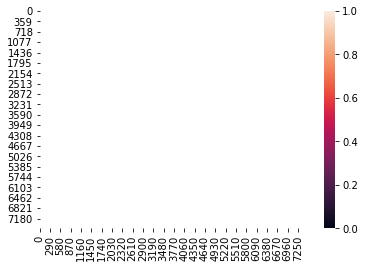

In [64]:
sns.heatmap(output.todense())

### Sequence only

In [13]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               #'text_features': text_features,
                'sequence_features':sequence_features
               }

In [14]:
lgbm_seq_features = Model(**model_params)
lgbm_seq_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming t

In [15]:
%%time
lgbm_seq_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.698737	validation_set's auc: 0.685084
[20]	training_set's auc: 0.703103	validation_set's auc: 0.687313
[30]	training_set's auc: 0.706388	validation_set's auc: 0.691914
[40]	training_set's auc: 0.70877	validation_set's auc: 0.691781
[50]	training_set's auc: 0.710889	validation_set's auc: 0.693131
[60]	training_set's auc: 0.71294	validation_set's auc: 0.694717
[70]	training_set's auc: 0.714299	validation_set's auc: 0.695125
[80]	training_set's auc: 0.715544	validation_set's auc: 0.695703
[90]	training_set's auc: 0.717026	validation_set's auc: 0.696903
[100]	training_set's auc: 0.718395	validation_set's auc: 0.697441
CPU times: user 23.5 s, sys: 546 ms, total: 24 s
Wall time: 21.7 s


In [16]:
lgbm_seq_features.get_performance_metrics()

training AUC ROC score:  0.7184077204909911
validation AUC ROC score:  0.6974411267364911
relative over-fitting:  0.029184811293746355


In [17]:
len(lgbm_seq_features.model_features)

4348

In [18]:
lgbm_seq_features.classifier.get_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 7,
 'learning_rate': 0.1,
 'num_iterations': 100,
 'feature_names': ['17_beta_estradiol',
  '17_hidroxiprogesterona',
  '2__eql_',
  '2__eql__acido_lactico_en_sangre',
  '2__eql__albumina_en_sangre',
  '2__eql__bilirrubinemia_total_y_directa',
  '2__eql__c3_complemento',
  '2__eql__calcemia_total',
  '2__eql__calcio_ionico',
  '2__eql__chagas__elisa_',
  '2__eql__chagas__hemoaglutinacion_',
  '2__eql__chagas__ifi_',
  '2__eql__citomegalovirus_igg',
  '2__eql__coagulograma_basico',
  '2__eql__colesterol_en_sangre',
  '2__eql__complemento_total',
  '2__eql__cpk',
  '2__eql__eritrosedimentacion',
  '2__eql__ferremia',
  '2__eql__gases_arteriales',
  '2__eql__glucosa_en_sangre',
  '2__eql__hemoglobina_glicosilada__hba1c___',
  '2__eql__hemograma',
  '2__eql__hepatitis_b_ac_de_superficie__eql_',
  '2__eql__hepatitis_b_ag_de_superficie__eql_',
  '2__eql__hepatitis_b_ag_de_superficie__eql___',
  '2__eql__hepatitis_

### Sequence + text

In [19]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features,
                'sequence_features':sequence_features
               }

In [20]:
lgbm_comb_text_features = Model(**model_params)
lgbm_comb_text_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 

In [21]:
%%time
lgbm_comb_text_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.748973	validation_set's auc: 0.7349
[20]	training_set's auc: 0.760099	validation_set's auc: 0.743994
[30]	training_set's auc: 0.770171	validation_set's auc: 0.752315
[40]	training_set's auc: 0.776503	validation_set's auc: 0.756726
[50]	training_set's auc: 0.781776	validation_set's auc: 0.760996
[60]	training_set's auc: 0.78584	validation_set's auc: 0.763652
[70]	training_set's auc: 0.789711	validation_set's auc: 0.765862
[80]	training_set's auc: 0.793097	validation_set's auc: 0.767502
[90]	training_set's auc: 0.795726	validation_set's auc: 0.768358
[100]	training_set's auc: 0.798595	validation_set's auc: 0.770209
CPU times: user 52 s, sys: 993 ms, total: 53 s
Wall time: 44.8 s


In [36]:
len(lgbm_comb_text_features.model_features)

21069

In [24]:
lgbm_comb_text_features.get_performance_metrics()

training AUC ROC score:  0.7977861907808528
validation AUC ROC score:  0.7677415920016991
relative over-fitting:  0.037659963441767245


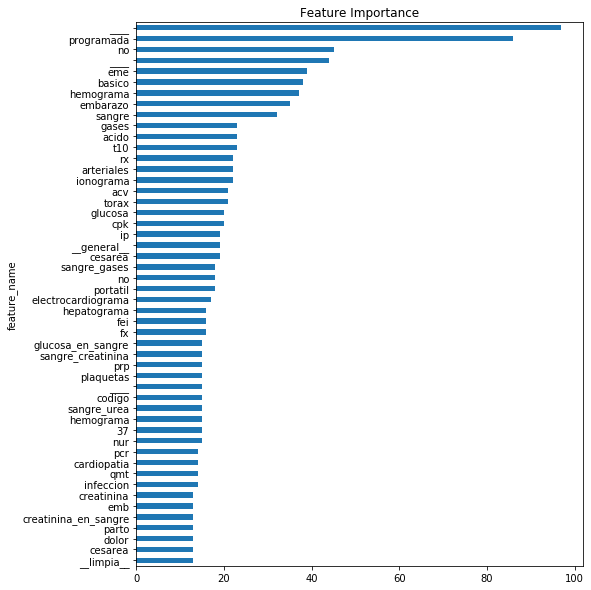

In [25]:
lgbm_comb_text_features.plot_feature_importance(50)

In [16]:
lgbm_param_grid = {'max_depth': [3,7,10],
                  'learning_rate': [0.1,0.01,0.001,0.0001],
                  'num_iterations': [50,100,150,200,250]}

In [ ]:
lgbm_text_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,n_iter=5,
                                         search_type='grid')

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
exp_results = lgbm_text_features.get_model_selection_results()

In [ ]:
exp_results.to_csv('experiments/lgb_text_features_grid_search_results.csv')

In [ ]:
best_params = lgbm_text_features.model_selection.best_params_
best_params

In [ ]:
lgbm_text_features.fit_best_classifier()

In [ ]:
lgbm_text_features.get_performance_metrics()